***
# Supervised Learning : Exploring Classification Models for Predicting Categorical Responses

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
        * [1.4.1 Data Cleaning](#1.4.1)
        * [1.4.2 Missing Data Imputation](#1.4.2)
        * [1.4.3 Outlier Treatment](#1.4.3)
        * [1.4.4 Collinearity](#1.4.4)
        * [1.4.5 Shape Transformation](#1.4.5)
        * [1.4.6 Centering and Scaling](#1.4.6)
        * [1.4.7 Data Encoding](#1.4.7)
        * [1.4.8 Preprocessed Data Description](#1.4.8)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
        * [1.5.2 Hypothesis Testing](#1.5.2)
    * [1.6 Model Development With Hyperparameter Tuning](#1.6)
        * [1.6.1 Premodelling Data Description](#1.6.1)
        * [1.6.2 Logistic Regression](#1.6.2)
        * [1.6.3 Decision Trees](#1.6.3)
        * [1.6.4 Random Forest](#1.6.4)
        * [1.6.5 Support Vector Machine](#1.6.5)
    * [1.7 Model Development With Class Weights](#1.7)
        * [1.7.1 Premodelling Data Description](#1.7.1)
        * [1.7.2 Logistic Regression](#1.7.2)
        * [1.7.3 Decision Trees](#1.7.3)
        * [1.7.4 Random Forest](#1.7.4)
        * [1.7.5 Support Vector Machine](#1.7.5)
    * [1.8 Model Development With SMOTE Upsampling](#1.8)
        * [1.8.1 Premodelling Data Description](#1.8.1)
        * [1.8.2 Logistic Regression](#1.8.2)
        * [1.8.3 Decision Trees](#1.8.3)
        * [1.8.4 Random Forest](#1.8.4)
        * [1.8.5 Support Vector Machine](#1.8.5)
    * [1.9 Model Development With CNN Downsampling](#1.9)
        * [1.9.1 Premodelling Data Description](#1.9.1)
        * [1.9.2 Logistic Regression](#1.9.2)
        * [1.9.3 Decision Trees](#1.9.3)
        * [1.9.4 Random Forest](#1.9.4)
        * [1.9.5 Support Vector Machine](#1.9.5)
    * [1.10 Model Development With Stacking Ensemble Learning](#1.10)
        * [1.10.1 Premodelling Data Description](#1.10.1)
        * [1.10.2 Logistic Regression](#1.10.2)
    * [1.11 Consolidated Findings](#1.7) 
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***

# 1. Table of Contents <a class="anchor" id="TOC"></a>

This project implements different predictive modelling procedures for dichotomous categorical responses using various helpful packages in <mark style="background-color: #CCECFF"><b>Python</b></mark>. Models applied in the analysis to predict dichotomous categorical responses included the **Logistic Regression**, **Decision Trees**, **Random Forest** and **Support Vector Machine** algorithms. Remedial procedures on addressing class imbalance including **Class Weighting**, **Synthetic Minority Oversampling Technique** and **Condensed Nearest Neighbors** were similarly considered, as applicable. Ensemble learning using **Stacking** which consolidate many different models types on the same data and using another model to learn how to best combine the predictions was also explored. All results were consolidated in a [<span style="color: #FF0000"><b>Summary</b></span>](#Summary) presented at the end of the document.

[Binary classification learning](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) refers to a predictive modelling problem where only two class labels are predicted for a given sample of input data. These models use the training data set and calculate how to best map instances of input data to the specific class labels. Typically, binary classification tasks involve one class that is the normal state (assigned the class label 0) and another class that is the abnormal state (assigned the class label 1). It is common to structure a binary classification task with a model that predicts a Bernoulli probability distribution for each instance. The Bernoulli distribution is a discrete probability distribution that covers a case where an event will have a binary outcome as either a 0 or 1. For a binary classification, this means that the model predicts a probability of an instance belonging to class 1, or the abnormal state. The algorithms applied in this study attempt to categorize the input data and form dichotomous groups based on their similarities.

## 1.1. Data Background <a class="anchor" id="1.1"></a>

Datasets used for the analysis were separately gathered and consolidated from various sources including: 
1. Cancer Rates from [World Population Review](https://worldpopulationreview.com/country-rankings/cancer-rates-by-country)
2. Social Protection and Labor Indicator from [World Bank](https://data.worldbank.org/topic/social-protection-and-labor?view=chart)
3. Education Indicator from [World Bank](https://data.worldbank.org/topic/education?view=chart)
4. Economy and Growth Indicator from [World Bank](https://data.worldbank.org/topic/economy-and-growth?view=chart)
5. Environment Indicator from [World Bank](https://data.worldbank.org/topic/environment?view=chart)
6. Climate Change Indicator from [World Bank](https://data.worldbank.org/topic/climate-change?view=chart)
7. Agricultural and Rural Development Indicator from [World Bank](https://data.worldbank.org/topic/agriculture-and-rural-development?view=chart)
8. Social Development Indicator from [World Bank](https://data.worldbank.org/topic/social-development?view=chart)
9. Health Indicator from [World Bank](https://data.worldbank.org/topic/health?view=chart)
10. Science and Technology Indicator from [World Bank](https://data.worldbank.org/topic/science-and-technology?view=chart)
11. Urban Development Indicator from [World Bank](https://data.worldbank.org/topic/urban-development?view=chart)
12. Human Development Indices from [Human Development Reports](https://hdr.undp.org/data-center/human-development-index#/indicies/HDI)
13. Environmental Performance Indices from [Yale Center for Environmental Law and Policy](https://epi.yale.edu/epi-results/2022/component/epi)

This study hypothesized that various global development indicators and indices influence cancer rates across countries.

The target variable for the study is:
* <span style="color: #FF0000">CANRAT</span> - Dichotomized category based on age-standardized cancer rates, per 100K population (2022)

The predictor variables for the study are:
* <span style="color: #FF0000">GDPPER</span> - GDP per person employed, current US Dollars (2020)
* <span style="color: #FF0000">URBPOP</span> - Urban population, % of total population (2020)
* <span style="color: #FF0000">PATRES</span> - Patent applications by residents, total count (2020)
* <span style="color: #FF0000">RNDGDP</span> - Research and development expenditure, % of GDP (2020)
* <span style="color: #FF0000">POPGRO</span> - Population growth, annual % (2020)
* <span style="color: #FF0000">LIFEXP</span> - Life expectancy at birth, total in years (2020)
* <span style="color: #FF0000">TUBINC</span> - Incidence of tuberculosis, per 100K population (2020)
* <span style="color: #FF0000">DTHCMD</span> - Cause of death by communicable diseases and maternal, prenatal and nutrition conditions,  % of total (2019)
* <span style="color: #FF0000">AGRLND</span> - Agricultural land,  % of land area (2020)
* <span style="color: #FF0000">GHGEMI</span> - Total greenhouse gas emissions, kt of CO2 equivalent (2020)
* <span style="color: #FF0000">RELOUT</span> - Renewable electricity output, % of total electricity output (2015)
* <span style="color: #FF0000">METEMI</span> - Methane emissions, kt of CO2 equivalent (2020)
* <span style="color: #FF0000">FORARE</span> - Forest area, % of land area (2020)
* <span style="color: #FF0000">CO2EMI</span> - CO2 emissions, metric tons per capita (2020)
* <span style="color: #FF0000">PM2EXP</span> - PM2.5 air pollution, population exposed to levels exceeding WHO guideline value,  % of total (2017)
* <span style="color: #FF0000">POPDEN</span> - Population density, people per sq. km of land area (2020)
* <span style="color: #FF0000">GDPCAP</span> - GDP per capita, current US Dollars (2020)
* <span style="color: #FF0000">ENRTER</span> - Tertiary school enrollment, % gross (2020)
* <span style="color: #FF0000">HDICAT</span> - Human development index, ordered category (2020)
* <span style="color: #FF0000">EPISCO</span> - Environment performance index , score (2022)


## 1.2. Data Description <a class="anchor" id="1.2"></a>

1. The dataset is comprised of:
    * **177 rows** (observations)
    * **22 columns** (variables)
        * **1/22 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/22 target** (categorical)
             * <span style="color: #FF0000">CANRAT</span>
        * **19/22 predictor** (numeric)
             * <span style="color: #FF0000">GDPPER</span>
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">PATRES</span>
             * <span style="color: #FF0000">RNDGDP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">RELOUT</span>
             * <span style="color: #FF0000">METEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">PM2EXP</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">ENRTER</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/22 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [7]:
##################################
# Setting up compatibility issues
# between the scikit-learn and imblearn packages
##################################
# !pip uninstall scikit-learn --yes
# !pip uninstall imblearn --yes
# !pip install scikit-learn==1.2.2
# !pip install imblearn

In [42]:
##################################
# Loading Python Libraries
##################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
import warnings

from operator import add,mul,truediv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.ensemble import StackingClassifier

In [9]:
!pip install pandas profiling

  Using cached profiling-0.1.3.tar.gz (36 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached valuedispatch-0.0.1-py3-none-any.whl
  Using cached click_default_group-1.2.4-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached urwid-2.6.15-py3-none-any.whl.metadata (11 kB)
Using cached click_default_group-1.2.4-py2.py3-none-any.whl (4.1 kB)
Using cached urwid-2.6.15-py3-none-any.whl (297 kB)
  Running setup.py clean for profiling
Failed to build profiling


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [42 lines of output]
      C:\Python39\lib\site-packages\setuptools_scm\_integration\setuptools.py:31: RuntimeWarning:
      ERROR: setuptools==56.0.0 is used in combination with setuptools_scm>=8.x
      
      Your build configuration is incomplete and previously worked by accident!
      setuptools_scm requires setuptools>=61
      
      Suggested workaround if applicable:
       - migrating from the deprecated setup_requires mechanism to pep517/518
         and using a pyproject.toml to declare build dependencies
         which are reliably pre-installed before running the build tools
      
        warnings.warn(
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.9
      creating build\lib.win-amd64-3.9\profiling
      copying profiling\profiler.py -> build\lib.win-amd64-3.9\profiling


In [10]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVuSans'


In [44]:
# read dataset
cancer_rate = pd.read_csv('CategoricalCancerRates.csv')

In [45]:
cancer_rate.nunique()

COUNTRY    177
CANRAT       2
GDPPER     165
URBPOP     173
PATRES      97
RNDGDP      74
POPGRO     174
LIFEXP     174
TUBINC     131
DTHCMD     170
AGRLND     174
GHGEMI     170
RELOUT     151
METEMI     170
FORARE     173
CO2EMI     170
PM2EXP      61
POPDEN     174
ENRTER     116
GDPCAP     170
HDICAT       4
EPISCO     137
dtype: int64

In [46]:
plt.boxplot(POPGRO)

NameError: name 'POPGRO' is not defined

In [12]:
# profile = ProfileReport(cancer_rate)
# profile.to_file("report.html")

In [13]:
# import pandas as pd
# from ydata_profiling import ProfileReport
# import matplotlib.pyplot as plt

# # Set the font to avoid the error
# plt.rcParams['font.family'] = 'DejaVuSans'


# # Generate the profile report
# profile = ProfileReport(cancer_rate)
# profile.to_file("report.html")


In [14]:
# from autoviz.AutoViz_Class import AutoViz_Class

# # Create an instance of AutoViz
# AV = AutoViz_Class()

# # Perform AutoViz analysis
# df_report = AV.AutoViz(
#     filename="",  # Leave this as an empty string if you're passing a DataFrame directly
#     dfte=cancer_rate,  # Your DataFrame
#     depVar="",  # Specify your target variable for analysis (leave empty for unsupervised EDA)
#     verbose=2,  # Verbosity level: 0 (minimal), 1 (important info), 2 (all information)
#     lowess=False,  # Apply LOWESS smoothing for trend detection
#     chart_format='svg',  # Use 'svg' or 'png' for charts
#     max_rows_analyzed=150000,  # Maximum number of rows to analyze
#     max_cols_analyzed=30  # Maximum number of columns to analyze
# )

array([[<AxesSubplot:title={'center':'GDPPER'}>,
        <AxesSubplot:title={'center':'URBPOP'}>,
        <AxesSubplot:title={'center':'PATRES'}>,
        <AxesSubplot:title={'center':'RNDGDP'}>],
       [<AxesSubplot:title={'center':'POPGRO'}>,
        <AxesSubplot:title={'center':'LIFEXP'}>,
        <AxesSubplot:title={'center':'TUBINC'}>,
        <AxesSubplot:title={'center':'DTHCMD'}>],
       [<AxesSubplot:title={'center':'AGRLND'}>,
        <AxesSubplot:title={'center':'GHGEMI'}>,
        <AxesSubplot:title={'center':'RELOUT'}>,
        <AxesSubplot:title={'center':'METEMI'}>],
       [<AxesSubplot:title={'center':'FORARE'}>,
        <AxesSubplot:title={'center':'CO2EMI'}>,
        <AxesSubplot:title={'center':'PM2EXP'}>,
        <AxesSubplot:title={'center':'POPDEN'}>],
       [<AxesSubplot:title={'center':'ENRTER'}>,
        <AxesSubplot:title={'center':'GDPCAP'}>,
        <AxesSubplot:title={'center':'EPISCO'}>, <AxesSubplot:>]],
      dtype=object)

findfont: Font family ['DejaVuSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVuSans'] not found. Falling back to DejaVu Sans.


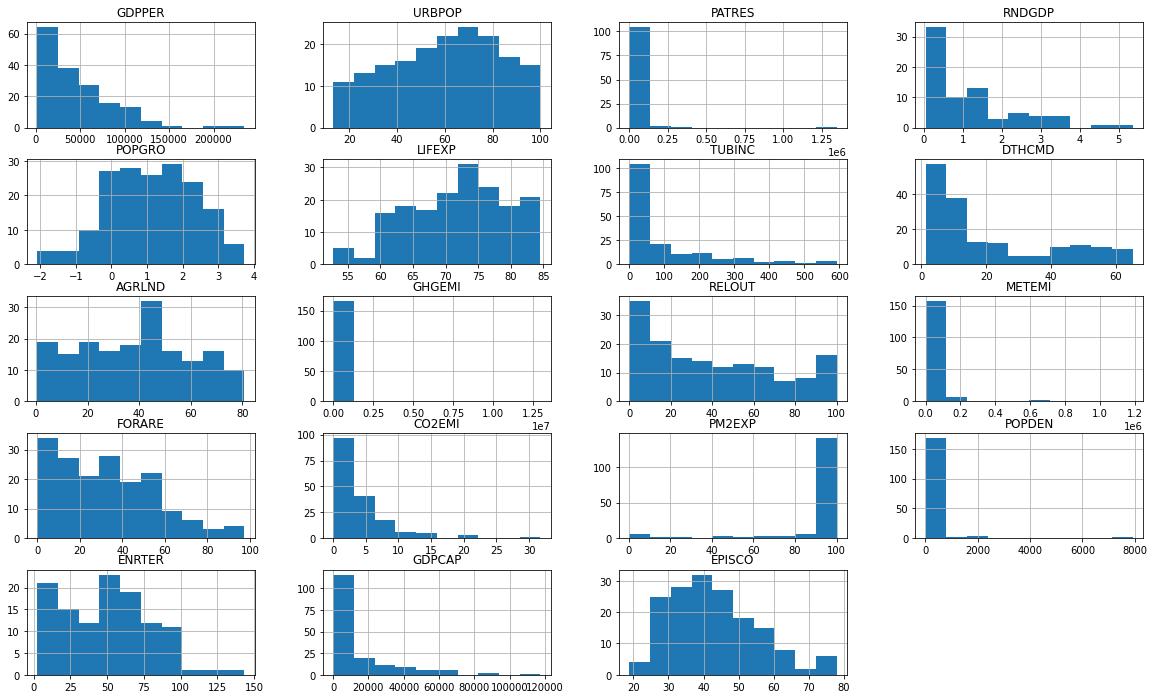

In [15]:
cancer_rate.hist(figsize=(20,12))

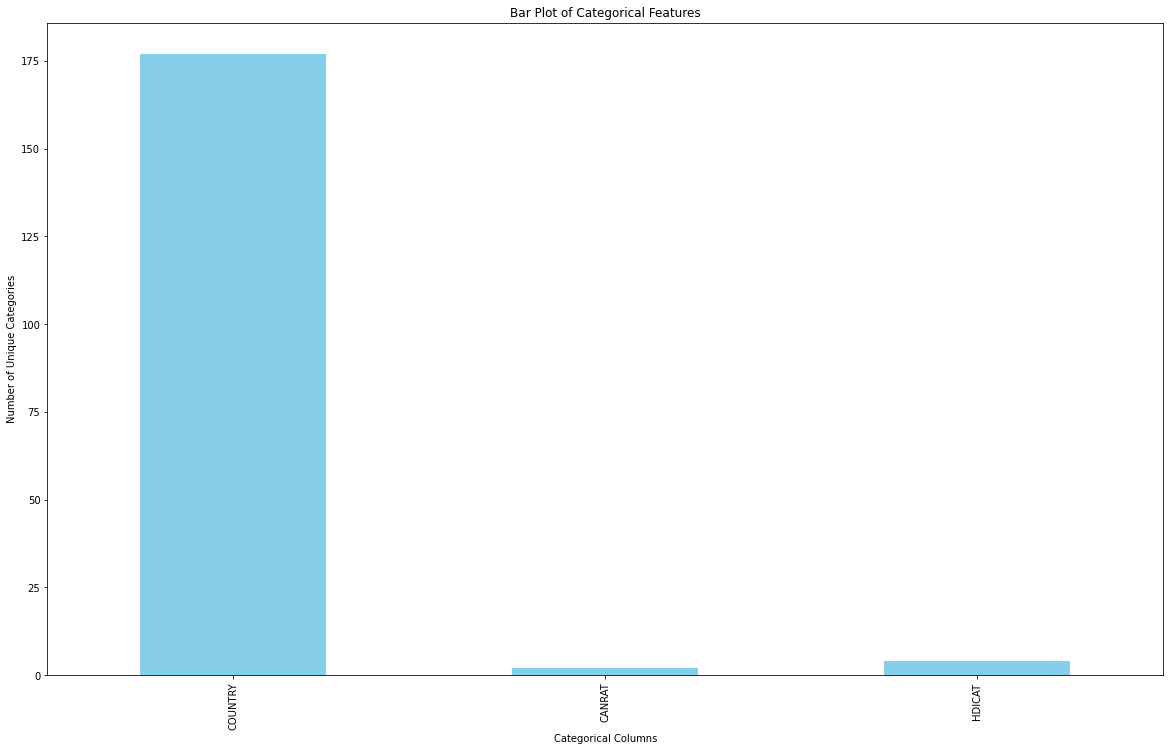

In [16]:
import matplotlib.pyplot as plt

# Select object-type columns
categorical_columns = cancer_rate.select_dtypes(include=['object'])

# Plot bar charts for each categorical column
categorical_columns.nunique().plot(kind='bar', figsize=(20, 12), color='skyblue')
plt.title('Bar Plot of Categorical Features')
plt.xlabel('Categorical Columns')
plt.ylabel('Number of Unique Categories')
plt.show()


In [17]:
# Performing a general exploration of the dataset
cancer_rate.shape
# print('Dataset Dimensions: ')
# display(cancer_rate.shape)

(177, 22)

In [18]:
# Listing the column names and data types
cancer_rate.dtypes
# print('Column Names and Data Types:')
# display(cancer_rate.dtypes)

COUNTRY     object
CANRAT      object
GDPPER     float64
URBPOP     float64
PATRES     float64
RNDGDP     float64
POPGRO     float64
LIFEXP     float64
TUBINC     float64
DTHCMD     float64
AGRLND     float64
GHGEMI     float64
RELOUT     float64
METEMI     float64
FORARE     float64
CO2EMI     float64
PM2EXP     float64
POPDEN     float64
ENRTER     float64
GDPCAP     float64
HDICAT      object
EPISCO     float64
dtype: object

In [19]:
cancer_rate.head(2)

,COUNTRY,CANRAT,GDPPER,URBPOP,PATRES,RNDGDP,POPGRO,LIFEXP,TUBINC,DTHCMD,...,RELOUT,METEMI,FORARE,CO2EMI,PM2EXP,POPDEN,ENRTER,GDPCAP,HDICAT,EPISCO
0,Australia,High,98380.63601,86.241,2368.0,NaN,1.235701,83.200000,7.2,4.941054,...,13.637841,131484.7632,17.421315,14.772658,24.893584,3.335312,110.139221,51722.06900,VH,60.1
1,New Zealand,High,77541.76438,86.699,348.0,NaN,2.204789,82.256098,7.2,4.354730,...,80.081439,32241.9370,37.570126,6.160799,NaN,19.331586,75.734833,41760.59478,VH,56.7


In [20]:
cancer_rate.CANRAT.value_counts()

CANRAT
Low     132
High     45
Name: count, dtype: int64

In [21]:
cancer_rate.HDICAT.value_counts()

HDICAT
VH    59
H     39
M     37
L     32
Name: count, dtype: int64

In [22]:
# Setting the levels of the categorical variables for the object datatypes (exc COUNTRY)
cancer_rate['CANRAT'] = cancer_rate['CANRAT'].astype('category')
cancer_rate['CANRAT'] = cancer_rate['CANRAT'].cat.set_categories(['Low', 'High'], ordered=True)
cancer_rate['HDICAT'] = cancer_rate['HDICAT'].astype('category')
cancer_rate['HDICAT'] = cancer_rate['HDICAT'].cat.set_categories(['L', 'M', 'H', 'VH'], ordered=True)

In [23]:
cancer_rate.dtypes

COUNTRY      object
CANRAT     category
GDPPER      float64
URBPOP      float64
PATRES      float64
RNDGDP      float64
POPGRO      float64
LIFEXP      float64
TUBINC      float64
DTHCMD      float64
AGRLND      float64
GHGEMI      float64
RELOUT      float64
METEMI      float64
FORARE      float64
CO2EMI      float64
PM2EXP      float64
POPDEN      float64
ENRTER      float64
GDPCAP      float64
HDICAT     category
EPISCO      float64
dtype: object

In [24]:
# Performing a general exploration of the numeric variables
cancer_rate.describe().transpose()
# print('Numeric Variable Summary:')
# display(cancer_rate.describe(include='number').transpose())

,count,mean,std,min,25%,50%,75%,max
GDPPER,165.0,45284.424283,3.941794e+04,1718.804896,13545.254510,34024.900890,66778.416050,2.346469e+05
URBPOP,174.0,59.788121,2.280640e+01,13.345000,42.432750,61.701500,79.186500,1.000000e+02
PATRES,108.0,20607.388889,1.340683e+05,1.000000,35.250000,244.500000,1297.750000,1.344817e+06
RNDGDP,74.0,1.197474,1.189956e+00,0.039770,0.256372,0.873660,1.608842,5.354510e+00
POPGRO,174.0,1.127028,1.197718e+00,-2.079337,0.236900,1.179959,2.031154,3.727101e+00
LIFEXP,174.0,71.746113,7.606209e+00,52.777000,65.907500,72.464610,77.523500,8.456000e+01
TUBINC,174.0,105.005862,1.367229e+02,0.770000,12.000000,44.500000,147.750000,5.920000e+02
DTHCMD,170.0,21.260521,1.927333e+01,1.283611,6.078009,12.456279,36.980457,6.520789e+01
AGRLND,174.0,38.793456,2.171551e+01,0.512821,20.130276,40.386649,54.013754,8.084112e+01
GHGEMI,170.0,259582.709895,1.118550e+06,179.725150,12527.487367,41009.275980,116482.578575,1.294287e+07


In [25]:
print('Numeric Variable Summary:')
display(cancer_rate.describe(include='number').transpose())

Numeric Variable Summary:


,count,mean,std,min,25%,50%,75%,max
GDPPER,165.0,45284.424283,3.941794e+04,1718.804896,13545.254510,34024.900890,66778.416050,2.346469e+05
URBPOP,174.0,59.788121,2.280640e+01,13.345000,42.432750,61.701500,79.186500,1.000000e+02
PATRES,108.0,20607.388889,1.340683e+05,1.000000,35.250000,244.500000,1297.750000,1.344817e+06
RNDGDP,74.0,1.197474,1.189956e+00,0.039770,0.256372,0.873660,1.608842,5.354510e+00
POPGRO,174.0,1.127028,1.197718e+00,-2.079337,0.236900,1.179959,2.031154,3.727101e+00
LIFEXP,174.0,71.746113,7.606209e+00,52.777000,65.907500,72.464610,77.523500,8.456000e+01
TUBINC,174.0,105.005862,1.367229e+02,0.770000,12.000000,44.500000,147.750000,5.920000e+02
DTHCMD,170.0,21.260521,1.927333e+01,1.283611,6.078009,12.456279,36.980457,6.520789e+01
AGRLND,174.0,38.793456,2.171551e+01,0.512821,20.130276,40.386649,54.013754,8.084112e+01
GHGEMI,170.0,259582.709895,1.118550e+06,179.725150,12527.487367,41009.275980,116482.578575,1.294287e+07


In [26]:
# Performing a general exploration of the object variable
cancer_rate.describe(include='object').transpose()
# print('Object Variable Summary:')
# display(cancer_rate.describe(include='object').transpose())

,count,unique,top,freq
COUNTRY,177,177,Australia,1


In [27]:
# Performing a general exploration of the categorical variables
cancer_rate.describe(include='category').transpose()
# print('Categorical Variable Summary:')
# display(cancer_rate.describe(include='category').transpose())

,count,unique,top,freq
CANRAT,177,2,Low,132
HDICAT,167,4,VH,59


In [28]:
# Performing a general exploration of the response variable
cancer_rate.CANRAT.value_counts(normalize = True)
# cancer_rate.CANRAT.value_counts()

CANRAT
Low     0.745763
High    0.254237
Name: proportion, dtype: float64

## 1.3. Data Quality Assessment <a class="anchor" id="1.3"></a>

Data quality findings based on assessment are as follows:
1. No duplicated rows observed.
2. Missing data noted for 20 variables with Null.Count>0 and Fill.Rate<1.0.
    * <span style="color: #FF0000">RNDGDP</span>: Null.Count = 103, Fill.Rate = 0.418
    * <span style="color: #FF0000">PATRES</span>: Null.Count = 69, Fill.Rate = 0.610
    * <span style="color: #FF0000">ENRTER</span>: Null.Count = 61, Fill.Rate = 0.655
    * <span style="color: #FF0000">RELOUT</span>: Null.Count = 24, Fill.Rate = 0.864
    * <span style="color: #FF0000">GDPPER</span>: Null.Count = 12, Fill.Rate = 0.932
    * <span style="color: #FF0000">EPISCO</span>: Null.Count = 12, Fill.Rate = 0.932
    * <span style="color: #FF0000">HDICAT</span>: Null.Count = 10, Fill.Rate = 0.943
    * <span style="color: #FF0000">PM2EXP</span>: Null.Count = 10, Fill.Rate = 0.943
    * <span style="color: #FF0000">DTHCMD</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">METEMI</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">CO2EMI</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">GDPCAP</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">GHGEMI</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">FORARE</span>: Null.Count = 4, Fill.Rate = 0.977
    * <span style="color: #FF0000">TUBINC</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">AGRLND</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">POPGRO</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">POPDEN</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">URBPOP</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">LIFEXP</span>: Null.Count = 3, Fill.Rate = 0.983
3. 120 observations noted with at least 1 missing data. From this number, 14 observations reported high Missing.Rate>0.2.
    * <span style="color: #FF0000">COUNTRY=Guadeloupe</span>: Missing.Rate= 0.909
    * <span style="color: #FF0000">COUNTRY=Martinique</span>: Missing.Rate= 0.909
    * <span style="color: #FF0000">COUNTRY=French Guiana</span>: Missing.Rate= 0.909
    * <span style="color: #FF0000">COUNTRY=New Caledonia</span>: Missing.Rate= 0.500
    * <span style="color: #FF0000">COUNTRY=French Polynesia</span>: Missing.Rate= 0.500
    * <span style="color: #FF0000">COUNTRY=Guam</span>: Missing.Rate= 0.500
    * <span style="color: #FF0000">COUNTRY=Puerto Rico</span>: Missing.Rate= 0.409
    * <span style="color: #FF0000">COUNTRY=North Korea</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Somalia</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=South Sudan</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Venezuela</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Libya</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Eritrea</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Yemen</span>: Missing.Rate= 0.227
4. Low variance observed for 1 variable with First.Second.Mode.Ratio>5.
    * <span style="color: #FF0000">PM2EXP</span>: First.Second.Mode.Ratio = 53.000
5. No low variance observed for any variable with Unique.Count.Ratio>10.
6. High skewness observed for 5 variables with Skewness>3 or Skewness<(-3).
    * <span style="color: #FF0000">POPDEN</span>: Skewness = +10.267
    * <span style="color: #FF0000">GHGEMI</span>: Skewness = +9.496
    * <span style="color: #FF0000">PATRES</span>: Skewness = +9.284
    * <span style="color: #FF0000">METEMI</span>: Skewness = +5.801
    * <span style="color: #FF0000">PM2EXP</span>: Skewness = -3.141

In [29]:
# Counting the number of duplicated rows
cancer_rate.duplicated().sum()

0

In [30]:
cancer_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   COUNTRY  177 non-null    object  
 1   CANRAT   177 non-null    category
 2   GDPPER   165 non-null    float64 
 3   URBPOP   174 non-null    float64 
 4   PATRES   108 non-null    float64 
 5   RNDGDP   74 non-null     float64 
 6   POPGRO   174 non-null    float64 
 7   LIFEXP   174 non-null    float64 
 8   TUBINC   174 non-null    float64 
 9   DTHCMD   170 non-null    float64 
 10  AGRLND   174 non-null    float64 
 11  GHGEMI   170 non-null    float64 
 12  RELOUT   153 non-null    float64 
 13  METEMI   170 non-null    float64 
 14  FORARE   173 non-null    float64 
 15  CO2EMI   170 non-null    float64 
 16  PM2EXP   167 non-null    float64 
 17  POPDEN   174 non-null    float64 
 18  ENRTER   116 non-null    float64 
 19  GDPCAP   170 non-null    float64 
 20  HDICAT   167 non-null    categor

In [31]:
# are there missing values?
cancer_rate.isna().sum()

COUNTRY      0
CANRAT       0
GDPPER      12
URBPOP       3
PATRES      69
RNDGDP     103
POPGRO       3
LIFEXP       3
TUBINC       3
DTHCMD       7
AGRLND       3
GHGEMI       7
RELOUT      24
METEMI       7
FORARE       4
CO2EMI       7
PM2EXP      10
POPDEN       3
ENRTER      61
GDPCAP       7
HDICAT      10
EPISCO      12
dtype: int64

In [32]:
missing_counts = cancer_rate.isna().sum()
missing_percentage = (missing_counts / len(cancer_rate)) * 100

# Combine counts and percentages into a DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentage
})

print(missing_summary)

         Missing Count  Missing Percentage
COUNTRY              0            0.000000
CANRAT               0            0.000000
GDPPER              12            6.779661
URBPOP               3            1.694915
PATRES              69           38.983051
RNDGDP             103           58.192090
POPGRO               3            1.694915
LIFEXP               3            1.694915
TUBINC               3            1.694915
DTHCMD               7            3.954802
AGRLND               3            1.694915
GHGEMI               7            3.954802
RELOUT              24           13.559322
METEMI               7            3.954802
FORARE               4            2.259887
CO2EMI               7            3.954802
PM2EXP              10            5.649718
POPDEN               3            1.694915
ENRTER              61           34.463277
GDPCAP               7            3.954802
HDICAT              10            5.649718
EPISCO              12            6.779661


In [33]:
# Drop scolumns with more than 10% missing rate
columns_to_drop = ['PATRES', 'RNDGDP', 'RELOUT', 'ENRTER']
cancer_rate = cancer_rate.drop(columns=columns_to_drop)

print(cancer_rate)

            COUNTRY CANRAT         GDPPER  URBPOP    POPGRO     LIFEXP  \
0         Australia   High   98380.636010  86.241  1.235701  83.200000   
1       New Zealand   High   77541.764380  86.699  2.204789  82.256098   
2           Ireland   High  198405.875000  63.653  1.029111  82.556098   
3     United States   High  130941.636900  82.664  0.964348  76.980488   
4           Denmark   High  113300.601100  88.116  0.291641  81.602439   
..              ...    ...            ...     ...       ...        ...   
172  Congo Republic    Low   11147.634200  67.829  2.332086  63.785000   
173          Bhutan    Low   23885.097490  42.316  0.655472  71.609000   
174           Nepal    Low   15557.109050  20.576  1.774268  69.246000   
175          Gambia    Low    6368.215708  62.582  2.562153  62.612000   
176           Niger    Low    3291.312150  16.626  3.727101  61.451000   

     TUBINC     DTHCMD     AGRLND        GHGEMI         METEMI     FORARE  \
0       7.2   4.941054  46.252480 

In [34]:
cancer_rate.info() # still have some missing values. need to impute them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   COUNTRY  177 non-null    object  
 1   CANRAT   177 non-null    category
 2   GDPPER   165 non-null    float64 
 3   URBPOP   174 non-null    float64 
 4   POPGRO   174 non-null    float64 
 5   LIFEXP   174 non-null    float64 
 6   TUBINC   174 non-null    float64 
 7   DTHCMD   170 non-null    float64 
 8   AGRLND   174 non-null    float64 
 9   GHGEMI   170 non-null    float64 
 10  METEMI   170 non-null    float64 
 11  FORARE   173 non-null    float64 
 12  CO2EMI   170 non-null    float64 
 13  PM2EXP   167 non-null    float64 
 14  POPDEN   174 non-null    float64 
 15  GDPCAP   170 non-null    float64 
 16  HDICAT   167 non-null    category
 17  EPISCO   165 non-null    float64 
dtypes: category(2), float64(15), object(1)
memory usage: 22.9+ KB


In [35]:
import pandas as pd

# Calculate missing values count and percentage
missing_summary = cancer_rate.isna().agg(['sum', lambda x: x.mean() * 100]).T
missing_summary.columns = ['Missing Count', 'Missing Percentage']

print(missing_summary)


         Missing Count  Missing Percentage
COUNTRY            0.0            0.000000
CANRAT             0.0            0.000000
GDPPER            12.0            6.779661
URBPOP             3.0            1.694915
POPGRO             3.0            1.694915
LIFEXP             3.0            1.694915
TUBINC             3.0            1.694915
DTHCMD             7.0            3.954802
AGRLND             3.0            1.694915
GHGEMI             7.0            3.954802
METEMI             7.0            3.954802
FORARE             4.0            2.259887
CO2EMI             7.0            3.954802
PM2EXP            10.0            5.649718
POPDEN             3.0            1.694915
GDPCAP             7.0            3.954802
HDICAT            10.0            5.649718
EPISCO            12.0            6.779661


In [38]:
from sklearn.impute import KNNImputer

# Select only the numerical columns from the DataFrame
numerical_cols = cancer_rate.select_dtypes(include=[np.number])

# Apply KNN imputer to those columns
imputer = KNNImputer(n_neighbors=5)
cancer_rate_imputed = pd.DataFrame(imputer.fit_transform(numerical_cols), columns=numerical_cols.columns)

# Replace the original numerical columns with the imputed data
cancer_rate[numerical_cols.columns] = cancer_rate_imputed

print(cancer_rate)

            COUNTRY CANRAT         GDPPER  URBPOP    POPGRO     LIFEXP  \
0         Australia   High   98380.636010  86.241  1.235701  83.200000   
1       New Zealand   High   77541.764380  86.699  2.204789  82.256098   
2           Ireland   High  198405.875000  63.653  1.029111  82.556098   
3     United States   High  130941.636900  82.664  0.964348  76.980488   
4           Denmark   High  113300.601100  88.116  0.291641  81.602439   
..              ...    ...            ...     ...       ...        ...   
172  Congo Republic    Low   11147.634200  67.829  2.332086  63.785000   
173          Bhutan    Low   23885.097490  42.316  0.655472  71.609000   
174           Nepal    Low   15557.109050  20.576  1.774268  69.246000   
175          Gambia    Low    6368.215708  62.582  2.562153  62.612000   
176           Niger    Low    3291.312150  16.626  3.727101  61.451000   

     TUBINC     DTHCMD     AGRLND        GHGEMI         METEMI     FORARE  \
0       7.2   4.941054  46.252480 

In [354]:
# Identify numerical columns
numerical_cols = cancer_rate.select_dtypes(include=[np.number]).columns

# Impute missing values using mean for numerical columns
cancer_rate[numerical_cols] = cancer_rate[numerical_cols].fillna(cancer_rate[numerical_cols].mean())

In [355]:
# check if the missing values have been succesfully imputed for numerical values
missing_summary = cancer_rate.isna().agg(['sum', lambda x: x.mean() * 100]).T
missing_summary.columns = ['Missing Count', 'Missing Percentage']

print(missing_summary)


         Missing Count  Missing Percentage
COUNTRY            0.0            0.000000
CANRAT             0.0            0.000000
GDPPER             0.0            0.000000
URBPOP             0.0            0.000000
POPGRO             0.0            0.000000
LIFEXP             0.0            0.000000
TUBINC             0.0            0.000000
DTHCMD             0.0            0.000000
AGRLND             0.0            0.000000
GHGEMI             0.0            0.000000
METEMI             0.0            0.000000
FORARE             0.0            0.000000
CO2EMI             0.0            0.000000
PM2EXP             0.0            0.000000
POPDEN             0.0            0.000000
GDPCAP             0.0            0.000000
HDICAT            10.0            5.649718
EPISCO             0.0            0.000000


In [356]:
cancer_rate.HDICAT.value_counts(normalize = True)
# cancer_rate.CANRAT.value_counts()

HDICAT
VH    0.353293
H     0.233533
M     0.221557
L     0.191617
Name: proportion, dtype: float64

In [357]:
from sklearn.impute import SimpleImputer

categorical_cols = cancer_rate.select_dtypes(include=['category']).columns

# Initialize SimpleImputer with strategy 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the categorical columns
cancer_rate[categorical_cols] = imputer.fit_transform(cancer_rate[categorical_cols])

In [358]:
# check again to see all missing values have been properly imputed
missing_summary = cancer_rate.isna().agg(['sum', lambda x: x.mean() * 100]).T
missing_summary.columns = ['Missing Count', 'Missing Percentage']

print(missing_summary)

         Missing Count  Missing Percentage
COUNTRY            0.0                 0.0
CANRAT             0.0                 0.0
GDPPER             0.0                 0.0
URBPOP             0.0                 0.0
POPGRO             0.0                 0.0
LIFEXP             0.0                 0.0
TUBINC             0.0                 0.0
DTHCMD             0.0                 0.0
AGRLND             0.0                 0.0
GHGEMI             0.0                 0.0
METEMI             0.0                 0.0
FORARE             0.0                 0.0
CO2EMI             0.0                 0.0
PM2EXP             0.0                 0.0
POPDEN             0.0                 0.0
GDPCAP             0.0                 0.0
HDICAT             0.0                 0.0
EPISCO             0.0                 0.0


In [ ]:
# # Gathering the data types for each column
# data_type_list = list(cancer_rate.dtypes)

In [ ]:
# Gathering the variable names for each column
# variable_name_list = list(cancer_rate.columns)

In [ ]:
# Gathering the number of observations for each column
# row_count_list = list([len(cancer_rate)] * len(cancer_rate.columns))

In [ ]:
# Gathering the number of missing data for each column
# null_count_list = list(cancer_rate.isna().sum(axis=0))

In [ ]:
# Gathering the number of non-missing data for each column
# non_null_count_list = list(cancer_rate.count())

In [ ]:
# Gathering the missing data percentage for each column
# fill_rate_list = map(truediv, non_null_count_list, row_count_list)

In [ ]:
# # Formulating the summary
# # for all columns

# all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
#                                               data_type_list,
#                                               row_count_list,
#                                               non_null_count_list,
#                                               null_count_list,
#                                               fill_rate_list), 
#                                         columns=['Column.Name',
#                                                  'Column.Type',
#                                                  'Row.Count',
#                                                  'Non.Null.Count',
#                                                  'Null.Count',                                                 
#                                                  'Fill.Rate'])
# display(all_column_quality_summary)

In [ ]:
# Counting the number of columns
# with Fill.Rate < 1.00

# len(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)])

In [ ]:
# Identifying the columns
# with Fill.Rate < 1.00

# display(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)].sort_values(by=['Fill.Rate'], ascending=True))

In [ ]:
# Identifying the rows
# with Fill.Rate < 0.90

# column_low_fill_rate = all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<0.90)]

In [ ]:
# Gathering the metadata labels for each observation

# row_metadata_list = cancer_rate["COUNTRY"].values.tolist()

In [ ]:
# Gathering the number of columns for each observation

# column_count_list = list([len(cancer_rate.columns)] * len(cancer_rate))

In [ ]:
# Gathering the number of missing data for each row

# null_row_list = list(cancer_rate.isna().sum(axis=1))

In [ ]:
# Gathering the missing data percentage for each column

# missing_rate_list = map(truediv, null_row_list, column_count_list)

In [ ]:
# # Identifying the rows
# # with missing data

# all_row_quality_summary = pd.DataFrame(zip(row_metadata_list,
#                                            column_count_list,
#                                            null_row_list,
#                                            missing_rate_list), 
#                                         columns=['Row.Name',
#                                                  'Column.Count',
#                                                  'Null.Count',                                                 
#                                                  'Missing.Rate'])
# display(all_row_quality_summary)

In [ ]:
# Counting the number of rows
# with Missing.Rate > 0.00
# len(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.00)])

In [ ]:
# Counting the number of rows
# with Missing.Rate > 0.20

# len(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.20)])

In [ ]:
# Identifying the rows
# with Missing.Rate > 0.20

# row_high_missing_rate = all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.20)]

In [ ]:
# Identifying the rows
# with Missing.Rate > 0.20

# display(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.20)].sort_values(by=['Missing.Rate'], ascending=False))

In [ ]:
# Formulating the dataset
# with numeric columns only
# cancer_rate_numeric = cancer_rate.select_dtypes(include='number')

In [ ]:
# Gathering the variable names for each numeric column
# numeric_variable_name_list = cancer_rate_numeric.columns

In [ ]:
# Gathering the minimum value for each numeric column
# numeric_minimum_list = cancer_rate_numeric.min()

In [ ]:
# Gathering the mean value for each numeric column
# numeric_mean_list = cancer_rate_numeric.mean()

In [ ]:
# Gathering the median value for each numeric column
# numeric_median_list = cancer_rate_numeric.median()

In [ ]:
# Gathering the maximum value for each numeric column
# numeric_maximum_list = cancer_rate_numeric.max()

In [ ]:
# Gathering the first mode values for each numeric column
# numeric_first_mode_list = [cancer_rate[x].value_counts(dropna=True).index.tolist()[0] for x in cancer_rate_numeric]

In [ ]:
# Gathering the second mode values for each numeric column
# numeric_second_mode_list = [cancer_rate[x].value_counts(dropna=True).index.tolist()[1] for x in cancer_rate_numeric]

In [ ]:
# Gathering the count of first mode values for each numeric column
# numeric_first_mode_count_list = [cancer_rate_numeric[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cancer_rate_numeric]

In [ ]:
# Gathering the count of second mode values for each numeric column
# numeric_second_mode_count_list = [cancer_rate_numeric[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cancer_rate_numeric]

In [ ]:
# Gathering the first mode to second mode ratio for each numeric column
# numeric_first_second_mode_ratio_list = map(truediv, numeric_first_mode_count_list, numeric_second_mode_count_list)

In [ ]:
# Gathering the count of unique values for each numeric column
# numeric_unique_count_list = cancer_rate_numeric.nunique(dropna=True)

In [ ]:
# Gathering the number of observations for each numeric column
# numeric_row_count_list = list([len(cancer_rate_numeric)] * len(cancer_rate_numeric.columns))

In [ ]:
# Gathering the unique to count ratio for each numeric column
# numeric_unique_count_ratio_list = map(truediv, numeric_unique_count_list, numeric_row_count_list)

In [ ]:
# Gathering the skewness value for each numeric column
# numeric_skewness_list = cancer_rate_numeric.skew()

In [ ]:
# Gathering the kurtosis value for each numeric column
# numeric_kurtosis_list = cancer_rate_numeric.kurtosis()

In [ ]:
# numeric_column_quality_summary = pd.DataFrame(zip(numeric_variable_name_list,
#                                                 numeric_minimum_list,
#                                                 numeric_mean_list,
#                                                 numeric_median_list,
#                                                 numeric_maximum_list,
#                                                 numeric_first_mode_list,
#                                                 numeric_second_mode_list,
#                                                 numeric_first_mode_count_list,
#                                                 numeric_second_mode_count_list,
#                                                 numeric_first_second_mode_ratio_list,
#                                                 numeric_unique_count_list,
#                                                 numeric_row_count_list,
#                                                 numeric_unique_count_ratio_list,
#                                                 numeric_skewness_list,
#                                                 numeric_kurtosis_list), 
#                                         columns=['Numeric.Column.Name',
#                                                  'Minimum',
#                                                  'Mean',
#                                                  'Median',
#                                                  'Maximum',
#                                                  'First.Mode',
#                                                  'Second.Mode',
#                                                  'First.Mode.Count',
#                                                  'Second.Mode.Count',
#                                                  'First.Second.Mode.Ratio',
#                                                  'Unique.Count',
#                                                  'Row.Count',
#                                                  'Unique.Count.Ratio',
#                                                  'Skewness',
#                                                  'Kurtosis'])
# display(numeric_column_quality_summary)

In [ ]:
# Counting the number of numeric columns
# with First.Second.Mode.Ratio > 5.00

# len(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)])

In [ ]:
# Identifying the numeric columns
# with First.Second.Mode.Ratio > 5.00

# display(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)].sort_values(by=['First.Second.Mode.Ratio'], ascending=False))

In [ ]:

# Counting the number of numeric columns
# with Unique.Count.Ratio > 10.00

# len(numeric_column_quality_summary[(numeric_column_quality_summary['Unique.Count.Ratio']>10)])

In [ ]:
# Counting the number of numeric columns
# with Skewness > 3.00 or Skewness < -3.00
# len(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))])

In [ ]:
# Identifying the numeric columns
# with Skewness > 3.00 or Skewness < -3.00

# display(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))].sort_values(by=['Skewness'], ascending=False))

In [ ]:
# Formulating the dataset
# with object column only

# cancer_rate_object = cancer_rate.select_dtypes(include='object')

In [ ]:
# Gathering the variable names for the object column
# object_variable_name_list = cancer_rate_object.columns

In [ ]:
# Gathering the first mode values for the object column
# object_first_mode_list = [cancer_rate[x].value_counts().index.tolist()[0] for x in cancer_rate_object]

In [ ]:
# Gathering the second mode values for each object column
# object_second_mode_list = [cancer_rate[x].value_counts().index.tolist()[1] for x in cancer_rate_object]

In [ ]:
# Gathering the count of first mode values for each object column
# object_first_mode_count_list = [cancer_rate_object[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cancer_rate_object]

In [ ]:
# Gathering the count of second mode values for each object column
# object_second_mode_count_list = [cancer_rate_object[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cancer_rate_object]

In [ ]:
# Gathering the first mode to second mode ratio for each object column
# object_first_second_mode_ratio_list = map(truediv, object_first_mode_count_list, object_second_mode_count_list)

In [ ]:
# Gathering the count of unique values for each object column
# object_unique_count_list = cancer_rate_object.nunique(dropna=True)

In [ ]:
##################################
# Gathering the number of observations for each object column
##################################
# object_row_count_list = list([len(cancer_rate_object)] * len(cancer_rate_object.columns))

In [ ]:
##################################
# Gathering the unique to count ratio for each object column
##################################
# object_unique_count_ratio_list = map(truediv, object_unique_count_list, object_row_count_list)

In [ ]:
# object_column_quality_summary = pd.DataFrame(zip(object_variable_name_list,
#                                                  object_first_mode_list,
#                                                  object_second_mode_list,
#                                                  object_first_mode_count_list,
#                                                  object_second_mode_count_list,
#                                                  object_first_second_mode_ratio_list,
#                                                  object_unique_count_list,
#                                                  object_row_count_list,
#                                                  object_unique_count_ratio_list), 
#                                         columns=['Object.Column.Name',
#                                                  'First.Mode',
#                                                  'Second.Mode',
#                                                  'First.Mode.Count',
#                                                  'Second.Mode.Count',
#                                                  'First.Second.Mode.Ratio',
#                                                  'Unique.Count',
#                                                  'Row.Count',
#                                                  'Unique.Count.Ratio'])
# display(object_column_quality_summary)

In [ ]:
##################################
# Counting the number of object columns
# with First.Second.Mode.Ratio > 5.00
##################################
# len(object_column_quality_summary[(object_column_quality_summary['First.Second.Mode.Ratio']>5)])

In [ ]:
##################################
# Counting the number of object columns
# with Unique.Count.Ratio > 10.00
##################################
# len(object_column_quality_summary[(object_column_quality_summary['Unique.Count.Ratio']>10)])

In [ ]:
##################################
# Formulating the dataset
# with categorical columns only
##################################
# cancer_rate_categorical = cancer_rate.select_dtypes(include='category')

In [ ]:
##################################
# Gathering the variable names for the categorical column
##################################
# categorical_variable_name_list = cancer_rate_categorical.columns

In [ ]:
##################################
# Gathering the first mode values for each categorical column
##################################
# categorical_first_mode_list = [cancer_rate[x].value_counts().index.tolist()[0] for x in cancer_rate_categorical]

In [ ]:
##################################
# Gathering the second mode values for each categorical column
##################################
# categorical_second_mode_list = [cancer_rate[x].value_counts().index.tolist()[1] for x in cancer_rate_categorical]

In [ ]:
##################################
# Gathering the count of first mode values for each categorical column
##################################
# categorical_first_mode_count_list = [cancer_rate_categorical[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cancer_rate_categorical]

In [ ]:
##################################
# Gathering the count of second mode values for each categorical column
##################################
# categorical_second_mode_count_list = [cancer_rate_categorical[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cancer_rate_categorical]

In [ ]:
##################################
# Gathering the first mode to second mode ratio for each categorical column
##################################
# categorical_first_second_mode_ratio_list = map(truediv, categorical_first_mode_count_list, categorical_second_mode_count_list)

In [ ]:
##################################
# Gathering the count of unique values for each categorical column
##################################
# categorical_unique_count_list = cancer_rate_categorical.nunique(dropna=True)

In [ ]:
##################################
# Gathering the number of observations for each categorical column
##################################
# categorical_row_count_list = list([len(cancer_rate_categorical)] * len(cancer_rate_categorical.columns))

In [ ]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
# categorical_unique_count_ratio_list = map(truediv, categorical_unique_count_list, categorical_row_count_list)

In [ ]:
# categorical_column_quality_summary = pd.DataFrame(zip(categorical_variable_name_list,
#                                                     categorical_first_mode_list,
#                                                     categorical_second_mode_list,
#                                                     categorical_first_mode_count_list,
#                                                     categorical_second_mode_count_list,
#                                                     categorical_first_second_mode_ratio_list,
#                                                     categorical_unique_count_list,
#                                                     categorical_row_count_list,
#                                                     categorical_unique_count_ratio_list), 
#                                         columns=['Categorical.Column.Name',
#                                                  'First.Mode',
#                                                  'Second.Mode',
#                                                  'First.Mode.Count',
#                                                  'Second.Mode.Count',
#                                                  'First.Second.Mode.Ratio',
#                                                  'Unique.Count',
#                                                  'Row.Count',
#                                                  'Unique.Count.Ratio'])
# display(categorical_column_quality_summary)

In [ ]:
##################################
# Counting the number of categorical columns
# with First.Second.Mode.Ratio > 5.00
##################################
# len(categorical_column_quality_summary[(categorical_column_quality_summary['First.Second.Mode.Ratio']>5)])

In [ ]:
##################################
# Counting the number of categorical columns
# with Unique.Count.Ratio > 10.00
##################################
# len(categorical_column_quality_summary[(categorical_column_quality_summary['Unique.Count.Ratio']>10)])

## 1.4. Data Preprocessing <a class="anchor" id="1.4"></a>


### 1.4.1 Data Cleaning <a class="anchor" id="1.4.1"></a>

1. Subsets of rows and columns with high rates of missing data were removed from the dataset:
    * 4 variables with Fill.Rate<0.9 were excluded for subsequent analysis.
        * <span style="color: #FF0000">RNDGDP</span>: Null.Count = 103, Fill.Rate = 0.418
        * <span style="color: #FF0000">PATRES</span>: Null.Count = 69, Fill.Rate = 0.610
        * <span style="color: #FF0000">ENRTER</span>: Null.Count = 61, Fill.Rate = 0.655
        * <span style="color: #FF0000">RELOUT</span>: Null.Count = 24, Fill.Rate = 0.864
    * 14 rows with Missing.Rate>0.2 were exluded for subsequent analysis.
        * <span style="color: #FF0000">COUNTRY=Guadeloupe</span>: Missing.Rate= 0.909
        * <span style="color: #FF0000">COUNTRY=Martinique</span>: Missing.Rate= 0.909
        * <span style="color: #FF0000">COUNTRY=French Guiana</span>: Missing.Rate= 0.909
        * <span style="color: #FF0000">COUNTRY=New Caledonia</span>: Missing.Rate= 0.500
        * <span style="color: #FF0000">COUNTRY=French Polynesia</span>: Missing.Rate= 0.500
        * <span style="color: #FF0000">COUNTRY=Guam</span>: Missing.Rate= 0.500
        * <span style="color: #FF0000">COUNTRY=Puerto Rico</span>: Missing.Rate= 0.409
        * <span style="color: #FF0000">COUNTRY=North Korea</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Somalia</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=South Sudan</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Venezuela</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Libya</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Eritrea</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Yemen</span>: Missing.Rate= 0.227  
2. No variables were removed due to zero or near-zero variance.
3. The cleaned dataset is comprised of:
    * **163 rows** (observations)
    * **18 columns** (variables)
        * **1/18 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/18 target** (categorical)
             * <span style="color: #FF0000">CANRAT</span>
        * **15/18 predictor** (numeric)
             * <span style="color: #FF0000">GDPPER</span>
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">METEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">PM2EXP</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/18 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [359]:
cancer_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COUNTRY  177 non-null    object 
 1   CANRAT   177 non-null    object 
 2   GDPPER   177 non-null    float64
 3   URBPOP   177 non-null    float64
 4   POPGRO   177 non-null    float64
 5   LIFEXP   177 non-null    float64
 6   TUBINC   177 non-null    float64
 7   DTHCMD   177 non-null    float64
 8   AGRLND   177 non-null    float64
 9   GHGEMI   177 non-null    float64
 10  METEMI   177 non-null    float64
 11  FORARE   177 non-null    float64
 12  CO2EMI   177 non-null    float64
 13  PM2EXP   177 non-null    float64
 14  POPDEN   177 non-null    float64
 15  GDPCAP   177 non-null    float64
 16  HDICAT   177 non-null    object 
 17  EPISCO   177 non-null    float64
dtypes: float64(15), object(3)
memory usage: 25.0+ KB


In [ ]:
# # Performing a general exploration of the original dataset
# print('Dataset Dimensions: ')
# display(cancer_rate.shape)

In [ ]:
##################################
# Filtering out the rows with
# with Missing.Rate > 0.20
##################################
# cancer_rate_filtered_row = cancer_rate.drop(cancer_rate[cancer_rate.COUNTRY.isin(row_high_missing_rate['Row.Name'].values.tolist())].index)

In [ ]:
##################################
# Performing a general exploration of the filtered dataset
##################################
# print('Dataset Dimensions: ')
# display(cancer_rate_filtered_row.shape)

In [ ]:
##################################
# Filtering out the columns with
# with Fill.Rate < 0.90
##################################
# cancer_rate_filtered_row_column = cancer_rate_filtered_row.drop(column_low_fill_rate['Column.Name'].values.tolist(), axis=1)

In [ ]:
##################################
# Formulating a new dataset object
# for the cleaned data
##################################
# cancer_rate_cleaned = cancer_rate_filtered_row_column

In [ ]:
##################################
# Performing a general exploration of the filtered dataset
##################################
# print('Dataset Dimensions: ')
# display(cancer_rate_cleaned.shape)

### 1.4.2 Missing Data Imputation <a class="anchor" id="1.4.2"></a>

[Iterative Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html) is based on the [Multivariate Imputation by Chained Equations](https://journals.sagepub.com/doi/10.1177/0962280206074463) (MICE) algorithm - an imputation method based on fully conditional specification, where each incomplete variable is imputed by a separate model. As a sequential regression imputation technique, the algorithm imputes an incomplete column (target column) by generating plausible synthetic values given other columns in the data. Each incomplete column must act as a target column, and has its own specific set of predictors. For predictors that are incomplete themselves, the most recently generated imputations are used to complete the predictors prior to prior to imputation of the target columns.

[Linear Regression](https://link.springer.com/book/10.1007/978-1-4757-3462-1) explores the linear relationship between a scalar response and one or more covariates by having the conditional mean of the dependent variable be an affine function of the independent variables. The relationship is modeled through a disturbance term which represents an unobserved random variable that adds noise. The algorithm is typically formulated from the data using the least squares method which seeks to estimate the coefficients by minimizing the squared residual function. The linear equation assigns one scale factor represented by a coefficient to each covariate and an additional coefficient called the intercept or the bias coefficient which gives the line an additional degree of freedom allowing to move up and down a two-dimensional plot.

1. Missing data for numeric variables were imputed using the iterative imputer algorithm with a  linear regression estimator.
    * <span style="color: #FF0000">GDPPER</span>: Null.Count = 1
    * <span style="color: #FF0000">FORARE</span>: Null.Count = 1
    * <span style="color: #FF0000">PM2EXP</span>: Null.Count = 5
2. Missing data for categorical variables were imputed using the most frequent value.
    * <span style="color: #FF0000">HDICAP</span>: Null.Count = 1

In [ ]:
##################################
# Formulating the summary
# for all cleaned columns
##################################
cleaned_column_quality_summary = pd.DataFrame(zip(list(cancer_rate_cleaned.columns),
                                                  list(cancer_rate_cleaned.dtypes),
                                                  list([len(cancer_rate_cleaned)] * len(cancer_rate_cleaned.columns)),
                                                  list(cancer_rate_cleaned.count()),
                                                  list(cancer_rate_cleaned.isna().sum(axis=0))), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count'])
display(cleaned_column_quality_summary)

In [ ]:
##################################
# Formulating the cleaned dataset
# with categorical columns only
##################################
cancer_rate_cleaned_categorical = cancer_rate_cleaned.select_dtypes(include='object')

In [ ]:
##################################
# Formulating the cleaned dataset
# with numeric columns only
##################################
cancer_rate_cleaned_numeric = cancer_rate_cleaned.select_dtypes(include='number')

In [ ]:
##################################
# Taking a snapshot of the cleaned dataset
##################################
cancer_rate_cleaned_numeric.head()

In [ ]:
##################################
# Defining the estimator to be used
# at each step of the round-robin imputation
##################################
lr = LinearRegression()

In [ ]:
##################################
# Defining the parameter of the
# iterative imputer which will estimate 
# the columns with missing values
# as a function of the other columns
# in a round-robin fashion
##################################
iterative_imputer = IterativeImputer(
    estimator = lr,
    max_iter = 10,
    tol = 1e-10,
    imputation_order = 'ascending',
    random_state=88888888
)

In [ ]:
##################################
# Implementing the iterative imputer 
##################################
cancer_rate_imputed_numeric_array = iterative_imputer.fit_transform(cancer_rate_cleaned_numeric)

In [ ]:
##################################
# Transforming the imputed data
# from an array to a dataframe
##################################
cancer_rate_imputed_numeric = pd.DataFrame(cancer_rate_imputed_numeric_array, 
                                           columns = cancer_rate_cleaned_numeric.columns)

In [ ]:
##################################
# Taking a snapshot of the imputed dataset
##################################
cancer_rate_imputed_numeric.head()

In [ ]:
##################################
# Formulating the cleaned dataset
# with categorical columns only
##################################
cancer_rate_cleaned_categorical = cancer_rate_cleaned.select_dtypes(include='category')

In [ ]:
##################################
# Imputing the missing data
# for categorical columns with
# the most frequent category
##################################
cancer_rate_cleaned_categorical['HDICAT'].fillna(cancer_rate_cleaned_categorical['HDICAT'].mode()[0], inplace=True)
cancer_rate_imputed_categorical = cancer_rate_cleaned_categorical.reset_index(drop=True)

In [ ]:
##################################
# Formulating the imputed dataset
##################################
cancer_rate_imputed = pd.concat([cancer_rate_imputed_numeric,cancer_rate_imputed_categorical], axis=1, join='inner')  

In [ ]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(cancer_rate_imputed.dtypes)

In [ ]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(cancer_rate_imputed.columns)

In [ ]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(cancer_rate_imputed)] * len(cancer_rate_imputed.columns))

In [ ]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(cancer_rate_imputed.isna().sum(axis=0))

In [ ]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(cancer_rate_imputed.count())

In [ ]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)

In [ ]:
##################################
# Formulating the summary
# for all imputed columns
##################################
imputed_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                                  data_type_list,
                                                  row_count_list,
                                                  non_null_count_list,
                                                  null_count_list,
                                                  fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(imputed_column_quality_summary)

### 1.4.3 Outlier Detection <a class="anchor" id="1.4.3"></a>

1. High number of outliers observed for 5 numeric variables with Outlier.Ratio>0.10 and marginal to high Skewness.
    * <span style="color: #FF0000">PM2EXP</span>: Outlier.Count = 37, Outlier.Ratio = 0.226, Skewness=-3.061
    * <span style="color: #FF0000">GHGEMI</span>: Outlier.Count = 27, Outlier.Ratio = 0.165, Skewness=+9.299
    * <span style="color: #FF0000">GDPCAP</span>: Outlier.Count = 22, Outlier.Ratio = 0.134, Skewness=+2.311
    * <span style="color: #FF0000">POPDEN</span>: Outlier.Count = 20, Outlier.Ratio = 0.122, Skewness=+9.972
    * <span style="color: #FF0000">METEMI</span>: Outlier.Count = 20, Outlier.Ratio = 0.122, Skewness=+5.688
2. Minimal number of outliers observed for 5 numeric variables with Outlier.Ratio<0.10 and normal Skewness.
    * <span style="color: #FF0000">TUBINC</span>: Outlier.Count = 12, Outlier.Ratio = 0.073, Skewness=+1.747
    * <span style="color: #FF0000">CO2EMI</span>: Outlier.Count = 11, Outlier.Ratio = 0.067, Skewness=+2.693
    * <span style="color: #FF0000">GDPPER</span>: Outlier.Count = 3, Outlier.Ratio = 0.018, Skewness=+1.554
    * <span style="color: #FF0000">EPISCO</span>: Outlier.Count = 3, Outlier.Ratio = 0.018, Skewness=+0.635
    * <span style="color: #FF0000">CANRAT</span>: Outlier.Count = 2, Outlier.Ratio = 0.012, Skewness=+0.910

In [360]:
##################################
# Formulating the imputed dataset
# with numeric columns only
##################################
cancer_rate_numeric = cancer_rate.select_dtypes(include='number')

In [361]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = list(cancer_rate_numeric.columns)

In [362]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = cancer_rate_numeric.skew()

In [363]:
##################################
# Computing the interquartile range
# for all columns
##################################
cancer_rate_numeric_q1 = cancer_rate_numeric.quantile(0.25)
cancer_rate_numeric_q3 = cancer_rate_numeric.quantile(0.75)
cancer_rate_numeric_iqr = cancer_rate_numeric_q3 - cancer_rate_numeric_q1

In [364]:
##################################
# Gathering the outlier count for each numeric column
# based on the interquartile range criterion
##################################
numeric_outlier_count_list = ((cancer_rate_numeric < (cancer_rate_numeric_q1 - 1.5 * cancer_rate_numeric_iqr)) | (cancer_rate_numeric > (cancer_rate_numeric_q3 + 1.5 * cancer_rate_numeric_iqr))).sum()

In [365]:
##################################
# Gathering the number of observations for each column
##################################
numeric_row_count_list = list([len(cancer_rate_numeric)] * len(cancer_rate_numeric.columns))

In [366]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
numeric_outlier_ratio_list = map(truediv, numeric_outlier_count_list, numeric_row_count_list)

In [367]:
##################################
# Formulating the outlier summary
# for all numeric columns
##################################
numeric_column_outlier_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                  numeric_skewness_list,
                                                  numeric_outlier_count_list,
                                                  numeric_row_count_list,
                                                  numeric_outlier_ratio_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Skewness',
                                                 'Outlier.Count',
                                                 'Row.Count',
                                                 'Outlier.Ratio'])
display(numeric_column_outlier_summary)

,Numeric.Column.Name,Skewness,Outlier.Count,Row.Count,Outlier.Ratio
0,GDPPER,1.517574,3,177,0.016949
1,URBPOP,-0.210702,0,177,0.000000
2,PATRES,9.284436,16,177,0.090395
3,RNDGDP,1.396742,2,177,0.011299
4,POPGRO,-0.195161,0,177,0.000000
5,LIFEXP,-0.357965,0,177,0.000000
6,TUBINC,1.746333,13,177,0.073446
7,DTHCMD,0.900509,0,177,0.000000
8,AGRLND,0.074000,0,177,0.000000
9,GHGEMI,9.496120,27,177,0.152542


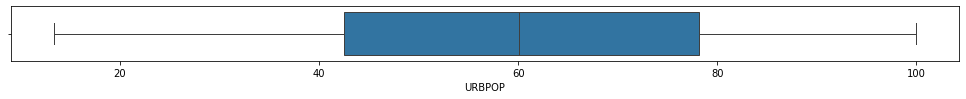

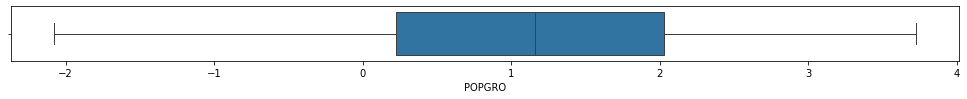

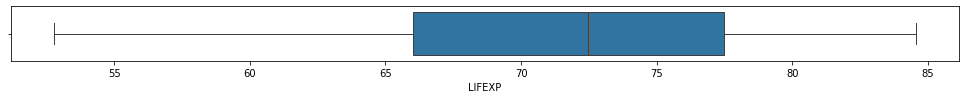

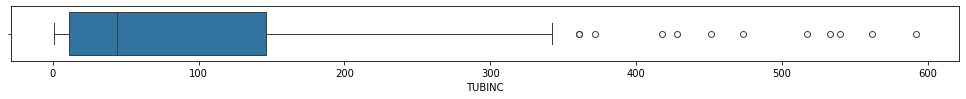

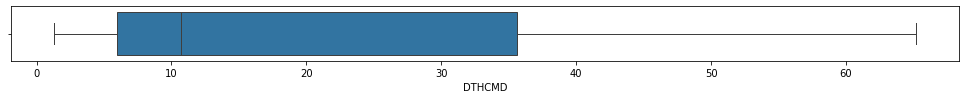

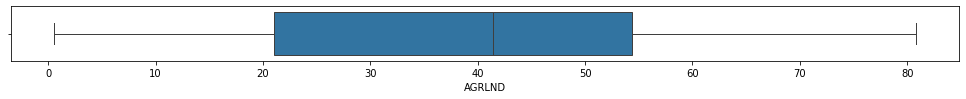

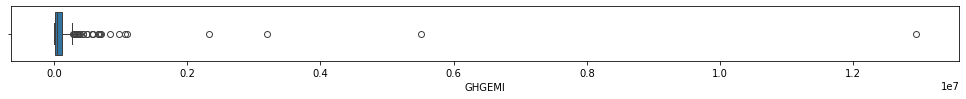

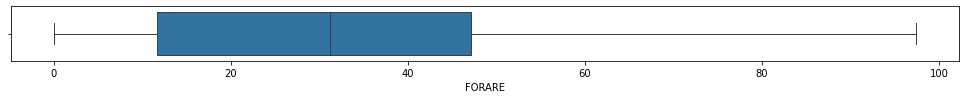

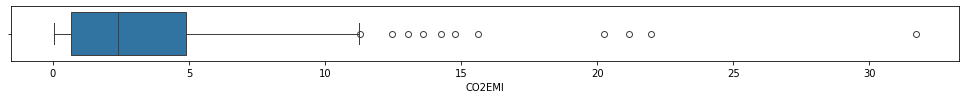

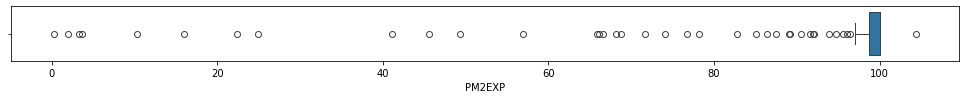

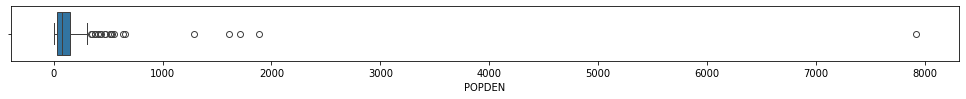

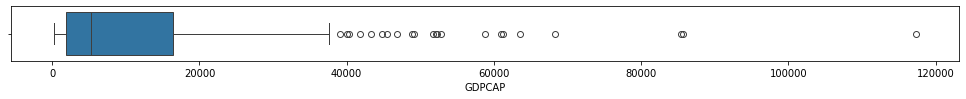

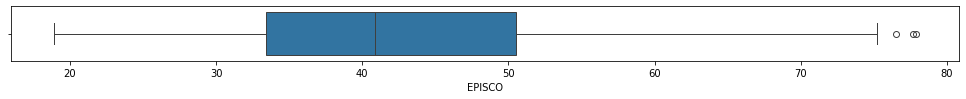

In [368]:
##################################
# Formulating the individual boxplots
# for all numeric columns
##################################
for column in cancer_rate_imputed_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cancer_rate_imputed_numeric, x=column)

### 1.4.4 Collinearity <a class="anchor" id="1.4.4"></a>

[Pearson’s Correlation Coefficient](https://royalsocietypublishing.org/doi/10.1098/rsta.1896.0007) is a parametric measure of the linear correlation for a pair of features by calculating the ratio between their covariance and the product of their standard deviations. The presence of high absolute correlation values indicate the univariate association between the numeric predictors and the numeric response.

1. Majority of the numeric variables reported moderate to high correlation which were statistically significant.
2. Among pairwise combinations of numeric variables, high Pearson.Correlation.Coefficient values were noted for:
    * <span style="color: #FF0000">GDPPER</span> and <span style="color: #FF0000">GDPCAP</span>: Pearson.Correlation.Coefficient = +0.921
    * <span style="color: #FF0000">GHGEMI</span> and <span style="color: #FF0000">METEMI</span>: Pearson.Correlation.Coefficient = +0.905
3. Among the highly correlated pairs, variables with the lowest correlation against the target variable were removed.
    * <span style="color: #FF0000">GDPPER</span>: Pearson.Correlation.Coefficient = +0.690
    * <span style="color: #FF0000">METEMI</span>: Pearson.Correlation.Coefficient = +0.062
4. The cleaned dataset is comprised of:
    * **163 rows** (observations)
    * **16 columns** (variables)
        * **1/16 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/16 target** (categorical)
             * <span style="color: #FF0000">CANRAT</span>
        * **13/16 predictor** (numeric)
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">PM2EXP</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/16 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [369]:
##################################
# Formulating a function 
# to plot the correlation matrix
# for all pairwise combinations
# of numeric columns
##################################
def plot_correlation_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, 
                ax=ax,
                mask=mask,
                annot=True, 
                vmin=-1, 
                vmax=1, 
                center=0,
                cmap='coolwarm', 
                linewidths=1, 
                linecolor='gray', 
                cbar_kws={'orientation': 'horizontal'})  

In [370]:
##################################
# Computing the correlation coefficients
# and correlation p-values
# among pairs of numeric columns
##################################
cancer_rate_imputed_numeric_correlation_pairs = {}
cancer_rate_imputed_numeric_columns = cancer_rate_imputed_numeric.columns.tolist()
for numeric_column_a, numeric_column_b in itertools.combinations(cancer_rate_imputed_numeric_columns, 2):
    cancer_rate_imputed_numeric_correlation_pairs[numeric_column_a + '_' + numeric_column_b] = stats.pearsonr(
        cancer_rate_imputed_numeric.loc[:, numeric_column_a], 
        cancer_rate_imputed_numeric.loc[:, numeric_column_b])

In [371]:
##################################
# Formulating the pairwise correlation summary
# for all numeric columns
##################################
cancer_rate_imputed_numeric_summary = cancer_rate_imputed_numeric.from_dict(cancer_rate_imputed_numeric_correlation_pairs, orient='index')
cancer_rate_imputed_numeric_summary.columns = ['Pearson.Correlation.Coefficient', 'Correlation.PValue']
display(cancer_rate_imputed_numeric_summary.sort_values(by=['Pearson.Correlation.Coefficient'], ascending=False).head(20))

,Pearson.Correlation.Coefficient,Correlation.PValue
POPGRO_DTHCMD,0.759470,7.124695e-32
GDPCAP_EPISCO,0.696707,5.312642e-25
LIFEXP_GDPCAP,0.683834,8.321371e-24
TUBINC_DTHCMD,0.643615,1.936081e-20
URBPOP_LIFEXP,0.623997,5.669778e-19
LIFEXP_EPISCO,0.620271,1.048393e-18
URBPOP_GDPCAP,0.559181,8.624533e-15
CO2EMI_GDPCAP,0.550221,2.782997e-14
URBPOP_CO2EMI,0.550046,2.846393e-14
LIFEXP_CO2EMI,0.531305,2.951829e-13


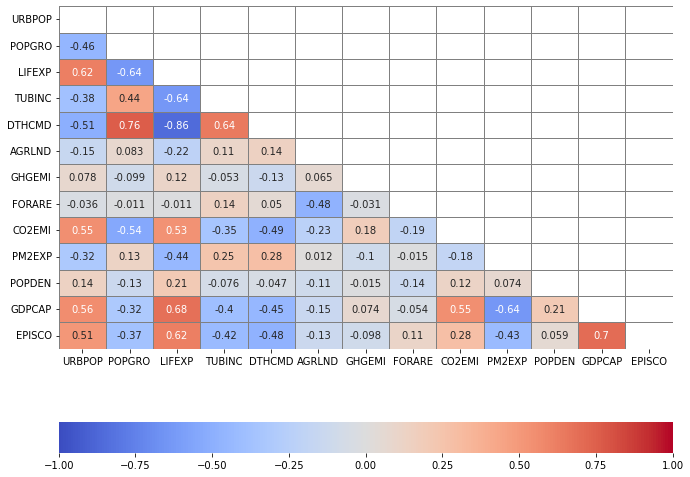

In [372]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric columns
##################################
cancer_rate_imputed_numeric_correlation = cancer_rate_imputed_numeric.corr()
mask = np.triu(cancer_rate_imputed_numeric_correlation)
plot_correlation_matrix(cancer_rate_imputed_numeric_correlation,mask)
plt.show()

In [374]:
##################################
# Formulating a function 
# to plot the correlation matrix
# for all pairwise combinations
# of numeric columns
# with significant p-values only
##################################
def correlation_significance(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

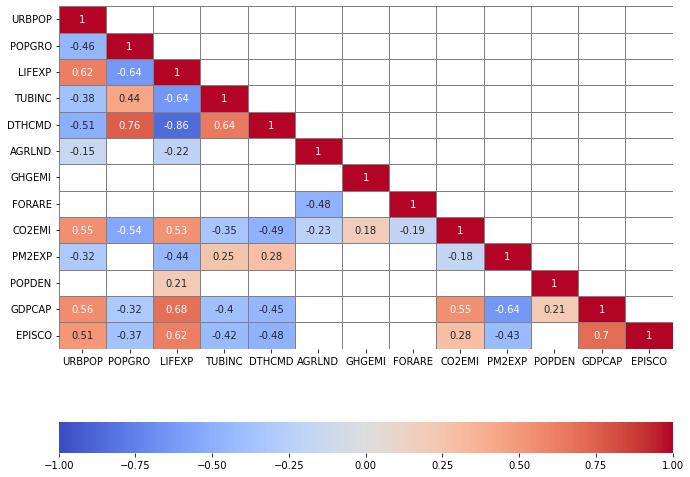

In [375]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric columns
# with significant p-values only
##################################
cancer_rate_imputed_numeric_correlation_p_values = correlation_significance(cancer_rate_imputed_numeric)                     
mask = np.invert(np.tril(cancer_rate_imputed_numeric_correlation_p_values<0.05)) 
plot_correlation_matrix(cancer_rate_imputed_numeric_correlation,mask)  

In [377]:
cancer_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDPPER  177 non-null    float64
 1   URBPOP  177 non-null    float64
 2   POPGRO  177 non-null    float64
 3   LIFEXP  177 non-null    float64
 4   TUBINC  177 non-null    float64
 5   DTHCMD  177 non-null    float64
 6   AGRLND  177 non-null    float64
 7   GHGEMI  177 non-null    float64
 8   METEMI  177 non-null    float64
 9   FORARE  177 non-null    float64
 10  CO2EMI  177 non-null    float64
 11  PM2EXP  177 non-null    float64
 12  POPDEN  177 non-null    float64
 13  GDPCAP  177 non-null    float64
 14  EPISCO  177 non-null    float64
dtypes: float64(15)
memory usage: 20.9 KB


In [378]:
##################################
# Filtering out one among the 
# highly correlated variable pairs with
# lesser Pearson.Correlation.Coefficient
# when compared to the target variable
##################################
cancer_rate_numeric.drop(['GDPPER','METEMI'], inplace=True, axis=1)

In [379]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_numeric.shape)

Dataset Dimensions: 


(177, 17)

### 1.4.5 Shape Transformation <a class="anchor" id="1.4.5"></a>

[Yeo-Johnson Transformation](https://academic.oup.com/biomet/article-abstract/87/4/954/232908?redirectedFrom=fulltext&login=false) applies a new family of distributions that can be used without restrictions, extending many of the good properties of the Box-Cox power family. Similar to the Box-Cox transformation, the method also estimates the optimal value of lambda but has the ability to transform both positive and negative values by inflating low variance data and deflating high variance data to create a more uniform data set. While there are no restrictions in terms of the applicable values, the interpretability of the transformed values is more diminished as compared to the other methods.

1. A Yeo-Johnson transformation was applied to all numeric variables to improve distributional shape.
2. Most variables achieved symmetrical distributions with minimal outliers after transformation.
3. One variable which remained skewed even after applying shape transformation was removed.
    * <span style="color: #FF0000">PM2EXP</span> 
4. The transformed dataset is comprised of:
    * **163 rows** (observations)
    * **15 columns** (variables)
        * **1/15 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/15 target** (categorical)
             * <span style="color: #FF0000">CANRAT</span>
        * **12/15 predictor** (numeric)
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/15 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import PowerTransformer


In [ ]:
# # Example of ensuring data is numeric
# cancer_rate_imputed_numeric = cancer_rate_imputed_numeric.astype(float)


In [ ]:
# ##################################
# # Conducting a Yeo-Johnson Transformation
# # to address the distributional
# # shape of the variables
# ##################################
# yeo_johnson_transformer = PowerTransformer(method='yeo-johnson',
#                                           standardize=False)
# cancer_rate_imputed_numeric_array = yeo_johnson_transformer.fit_transform(cancer_rate_imputed_numeric)

In [ ]:
# ##################################
# # Formulating a new dataset object
# # for the transformed data
# ##################################
# cancer_rate_transformed_numeric = pd.DataFrame(cancer_rate_imputed_numeric_array,
#                                                columns=cancer_rate_imputed_numeric.columns)

In [ ]:
# ##################################
# # Formulating the individual boxplots
# # for all transformed numeric columns
# ##################################
# for column in cancer_rate_transformed_numeric:
#         plt.figure(figsize=(17,1))
#         sns.boxplot(data=cancer_rate_transformed_numeric, x=column)

In [ ]:
##################################
# Filtering out the column
# which remained skewed even
# after applying shape transformation
##################################
# cancer_rate_transformed_numeric.drop(['PM2EXP'], inplace=True, axis=1)

In [ ]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
# display(cancer_rate_transformed_numeric.shape)

### 1.4.6 Centering and Scaling <a class="anchor" id="1.4.6"></a>

1. All numeric variables were transformed using the standardization method to achieve a comparable scale between values.
4. The scaled dataset is comprised of:
    * **163 rows** (observations)
    * **15 columns** (variables)
        * **1/15 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/15 target** (categorical)
             * <span style="color: #FF0000">CANRAT</span>
        * **12/15 predictor** (numeric)
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/15 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [382]:
##################################
# Conducting standardization
# to transform the values of the 
# variables into comparable scale
##################################
standardization_scaler = StandardScaler()
cancer_rate_transformed_numeric_array = standardization_scaler.fit_transform(cancer_rate_numeric)

In [383]:
##################################
# Formulating a new dataset object
# for the scaled data
##################################
cancer_rate_scaled_numeric = pd.DataFrame(cancer_rate_transformed_numeric_array,
                                          columns=cancer_rate_numeric.columns)

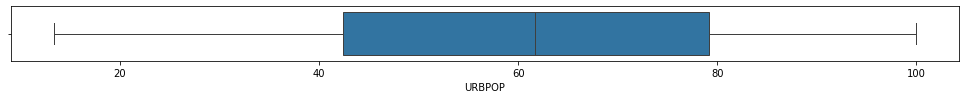

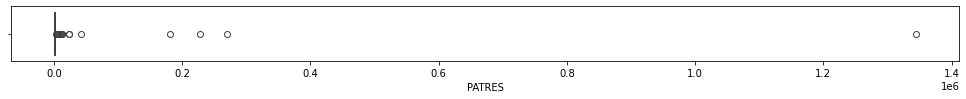

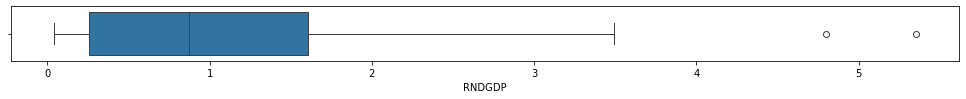

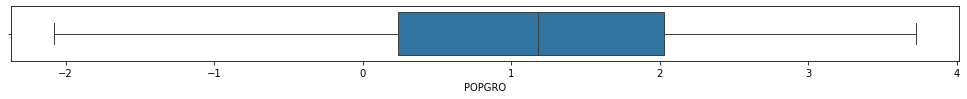

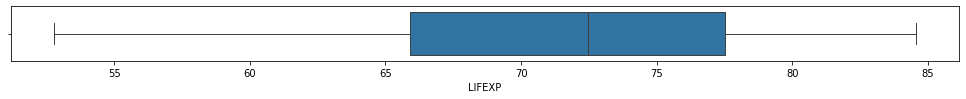

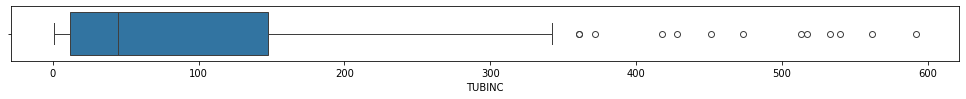

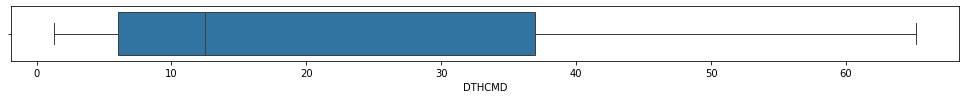

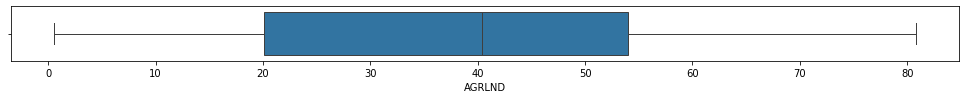

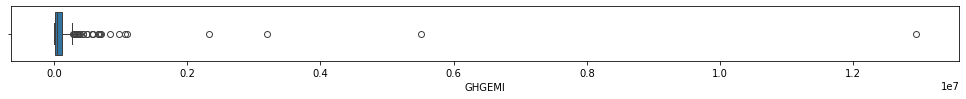

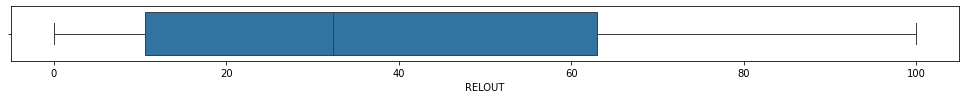

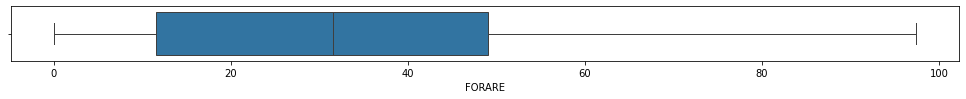

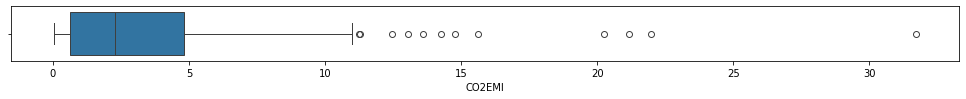

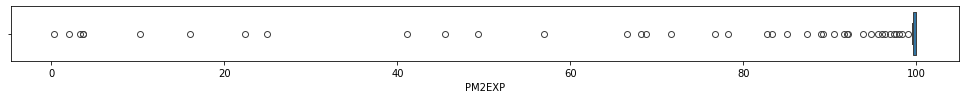

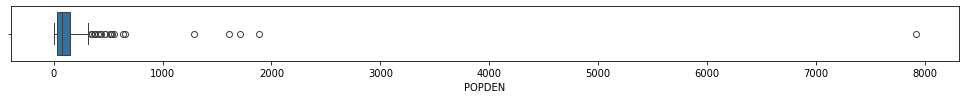

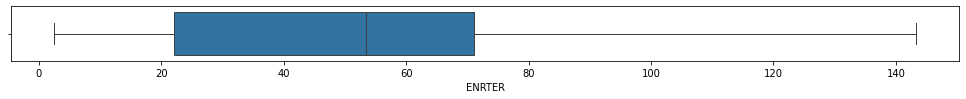

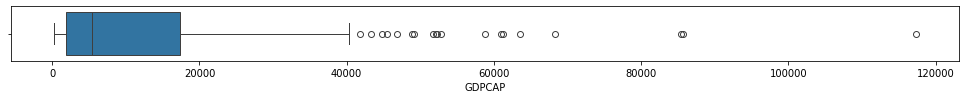

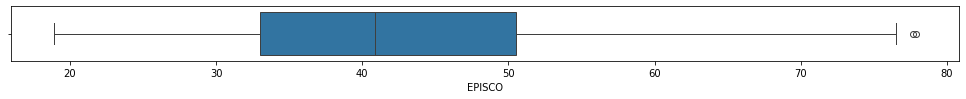

In [384]:
##################################
# Formulating the individual boxplots
# for all transformed numeric columns
##################################
for column in cancer_rate_scaled_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cancer_rate_numeric, x=column)

### 1.4.7 Data Encoding <a class="anchor" id="1.4.7"></a>

1. One-hot encoding was applied to the <span style="color: #FF0000">HDICAP_VH</span> variable resulting to 4 additional columns in the dataset:
    * <span style="color: #FF0000">HDICAP_L</span>
    * <span style="color: #FF0000">HDICAP_M</span>
    * <span style="color: #FF0000">HDICAP_H</span>
    * <span style="color: #FF0000">HDICAP_VH</span>

In [385]:
##################################
# Formulating the categorical column
# for encoding transformation
##################################
cancer_rate_categorical_encoded = pd.DataFrame(cancer_rate_cleaned_categorical.loc[:, 'HDICAT'].to_list(),
                                               columns=['HDICAT'])

In [386]:
##################################
# Applying a one-hot encoding transformation
# for the categorical column
##################################
cancer_rate_categorical_encoded = pd.get_dummies(cancer_rate_categorical_encoded, columns=['HDICAT'])

### 1.4.8 Preprocessed Data Description <a class="anchor" id="1.4.8"></a>

1. The preprocessed dataset is comprised of:
    * **163 rows** (observations)
    * **18 columns** (variables)
        * **1/18 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/18 target** (categorical)
             * <span style="color: #FF0000">CANRAT</span>
        * **12/18 predictor** (numeric)
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **4/18 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT_L</span>
             * <span style="color: #FF0000">HDICAT_M</span>
             * <span style="color: #FF0000">HDICAT_H</span>
             * <span style="color: #FF0000">HDICAT_VH</span>

In [387]:
##################################
# Consolidating both numeric columns
# and encoded categorical columns
##################################
cancer_rate_preprocessed = pd.concat([cancer_rate_scaled_numeric,cancer_rate_categorical_encoded], axis=1, join='inner')  

In [388]:
##################################
# Performing a general exploration of the consolidated dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_preprocessed.shape)

Dataset Dimensions: 


(163, 21)

## 1.5. Data Exploration <a class="anchor" id="1.5"></a>

### 1.5.1 Exploratory Data Analysis <a class="anchor" id="1.5.1"></a>

1. Bivariate analysis identified individual predictors with generally positive association to the target variable based on visual inspection.
2. Higher values or higher proportions for the following predictors are associated with the <span style="color: #FF0000">CANRAT</span> HIGH category: 
    * <span style="color: #FF0000">URBPOP</span>
    * <span style="color: #FF0000">LIFEXP</span>    
    * <span style="color: #FF0000">CO2EMI</span>    
    * <span style="color: #FF0000">GDPCAP</span>    
    * <span style="color: #FF0000">EPISCO</span>    
    * <span style="color: #FF0000">HDICAP_VH=1</span>
3. Decreasing values or smaller proportions for the following predictors are associated with the <span style="color: #FF0000">CANRAT</span> LOW category: 
    * <span style="color: #FF0000">POPGRO</span>
    * <span style="color: #FF0000">TUBINC</span>    
    * <span style="color: #FF0000">DTHCMD</span> 
    * <span style="color: #FF0000">HDICAP_L=0</span>
    * <span style="color: #FF0000">HDICAP_M=0</span>
    * <span style="color: #FF0000">HDICAP_H=0</span>
4. Values for the following predictors are not associated with the <span style="color: #FF0000">CANRAT</span>  HIGH or LOW categories: 
    * <span style="color: #FF0000">AGRLND</span>
    * <span style="color: #FF0000">GHGEMI</span>    
    * <span style="color: #FF0000">FORARE</span> 
    * <span style="color: #FF0000">POPDEN</span> 

In [389]:
##################################
# Segregating the target
# and predictor variable lists
##################################
cancer_rate_preprocessed_target = cancer_rate_filtered_row['CANRAT'].to_frame()
cancer_rate_preprocessed_target.reset_index(inplace=True, drop=True)
cancer_rate_preprocessed_categorical = cancer_rate_preprocessed[cancer_rate_categorical_encoded.columns]
cancer_rate_preprocessed_categorical_combined = cancer_rate_preprocessed_categorical.join(cancer_rate_preprocessed_target)
cancer_rate_preprocessed = cancer_rate_preprocessed.drop(cancer_rate_categorical_encoded.columns, axis=1) 
cancer_rate_preprocessed_predictors = cancer_rate_preprocessed.columns
cancer_rate_preprocessed_combined = cancer_rate_preprocessed.join(cancer_rate_preprocessed_target)
cancer_rate_preprocessed_all = cancer_rate_preprocessed_combined.join(cancer_rate_categorical_encoded)

In [390]:
##################################
# Segregating the target
# and predictor variable names
##################################
y_variable = 'CANRAT'
x_variables = cancer_rate_preprocessed_predictors

In [391]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 6
num_cols = 2

C:\Users\User\AppData\Local\Temp\ipykernel_9556\3632850337.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax.boxplot([group[x_variable] for name, group in cancer_rate_preprocessed_combined.groupby(y_variable)])
C:\Users\User\AppData\Local\Temp\ipykernel_9556\3632850337.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax.boxplot([group[x_variable] for name, group in cancer_rate_preprocessed_combined.groupby(y_variable)])
C:\Users\User\AppData\Local\Temp\ipykernel_9556\3632850337.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas

IndexError: index 12 is out of bounds for axis 0 with size 12

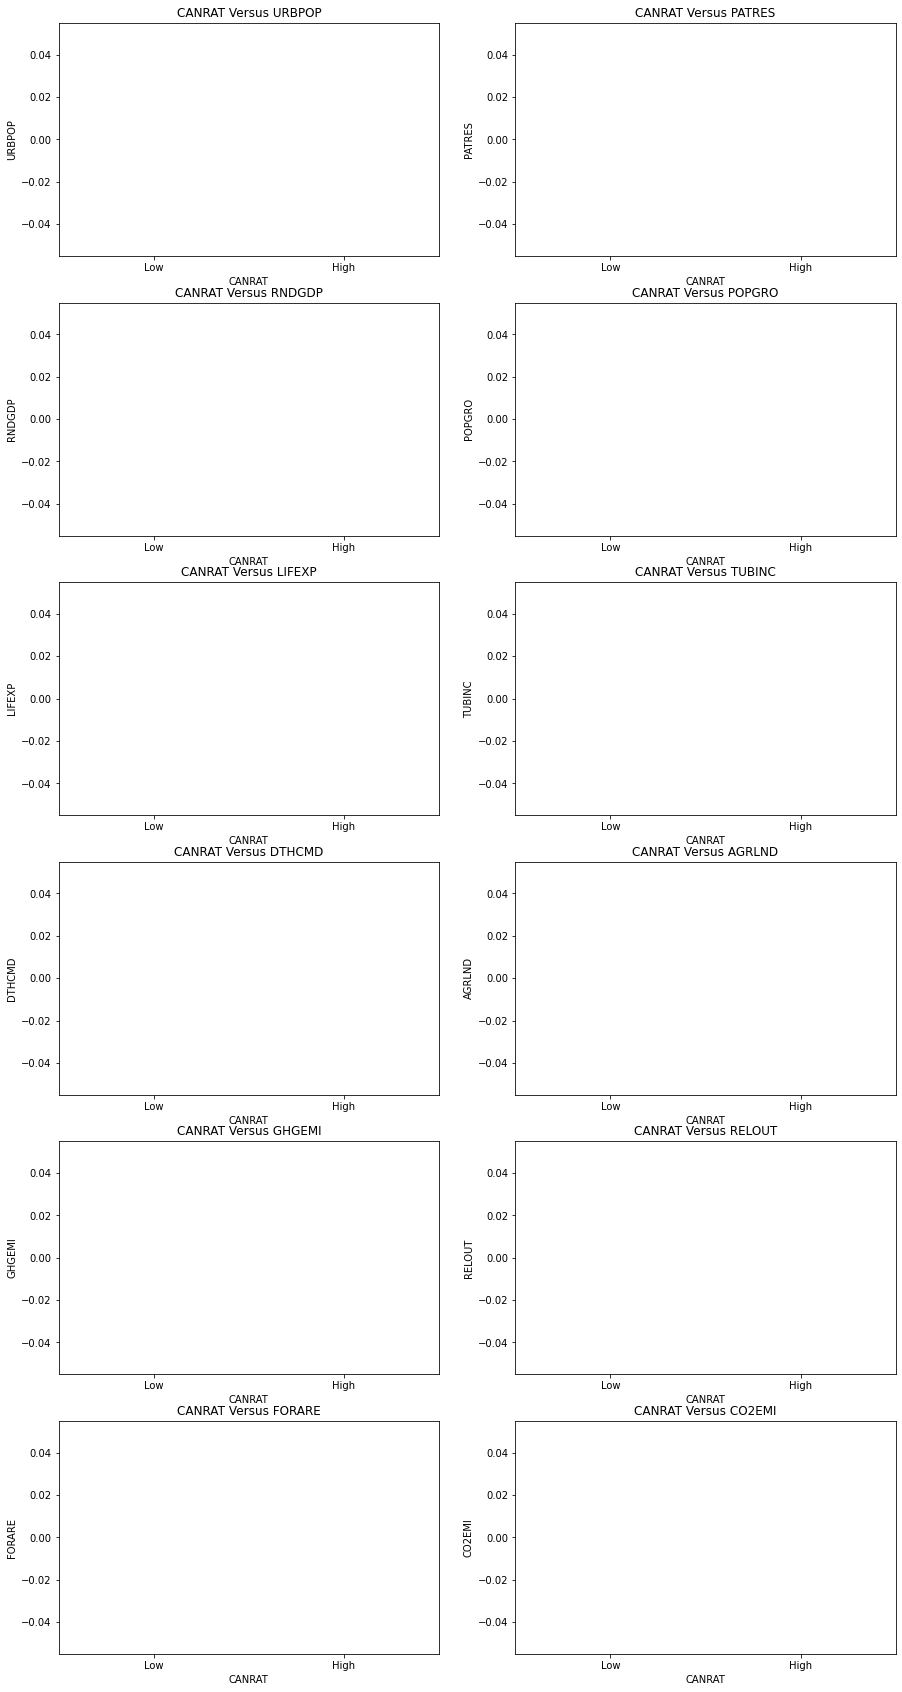

In [392]:
##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual boxplots
# for all scaled numeric columns
##################################
for i, x_variable in enumerate(x_variables):
    ax = axes[i]
    ax.boxplot([group[x_variable] for name, group in cancer_rate_preprocessed_combined.groupby(y_variable)])
    ax.set_title(f'{y_variable} Versus {x_variable}')
    ax.set_xlabel(y_variable)
    ax.set_ylabel(x_variable)
    ax.set_xticks(range(1, len(cancer_rate_preprocessed_combined[y_variable].unique()) + 1), ['Low', 'High'])

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()

In [ ]:
##################################
# Segregating the target
# and predictor variable names
##################################
y_variables = cancer_rate_preprocessed_categorical.columns
x_variable = 'CANRAT'

##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 2
num_cols = 2

##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual stacked column plots
# for all categorical columns
##################################
for i, y_variable in enumerate(y_variables):
    ax = axes[i]
    category_counts = cancer_rate_preprocessed_categorical_combined.groupby([x_variable, y_variable]).size().unstack(fill_value=0)
    category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0)
    category_proportions.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{x_variable} Versus {y_variable}')
    ax.set_xlabel(x_variable)
    ax.set_ylabel('Proportions')

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()

### 1.5.2 Hypothesis Testing <a class="anchor" id="1.5.2"></a>

1. The relationship between the numeric predictors to the <span style="color: #FF0000">CANRAT</span> target variable was statistically evaluated using the following hypotheses:
    * **Null**: Difference in the means between groups LOW and HIGH is equal to zero  
    * **Alternative**: Difference in the means between groups LOW and HIGH is not equal to zero   
2. There is sufficient evidence to conclude of a statistically significant difference between the means of the numeric measurements obtained from LOW and HIGH groups of the <span style="color: #FF0000">CANRAT</span> target variable in 9 of the 12 numeric predictors given their high t-test statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">GDPCAP</span>: T.Test.Statistic=-11.937, T.Test.PValue=0.000
    * <span style="color: #FF0000">EPISCO</span>: T.Test.Statistic=-11.789, T.Test.PValue=0.000 
    * <span style="color: #FF0000">LIFEXP</span>: T.Test.Statistic=-10.979, T.Test.PValue=0.000  
    * <span style="color: #FF0000">TUBINC</span>: T.Test.Statistic=+9.609, T.Test.PValue=0.000 
    * <span style="color: #FF0000">DTHCMD</span>: T.Test.Statistic=+8.376, T.Test.PValue=0.000 
    * <span style="color: #FF0000">CO2EMI</span>: T.Test.Statistic=-7.031, T.Test.PValue=0.000  
    * <span style="color: #FF0000">URBPOP</span>: T.Test.Statistic=-6.541, T.Test.PValue=0.000   
    * <span style="color: #FF0000">POPGRO</span>: T.Test.Statistic=+4.905, T.Test.PValue=0.000
    * <span style="color: #FF0000">GHGEMI</span>: T.Test.Statistic=-2.243, T.Test.PValue=0.026
3. The relationship between the categorical predictors to the <span style="color: #FF0000">CANRAT</span> target variable was statistically evaluated using the following hypotheses:
    * **Null**: The categorical predictor is independent of the categorical target variable 
    * **Alternative**: The categorical predictor is dependent of the categorical target variable    
2. There is sufficient evidence to conclude of a statistically significant relationship difference between the categories of the categorical predictors and the LOW and HIGH groups of the <span style="color: #FF0000">CANRAT</span> target variable in all 4 categorical predictors given their high chisquare statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">HDICAT_VH</span>: ChiSquare.Test.Statistic=76.764, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">HDICAT_H</span>: ChiSquare.Test.Statistic=13.860, ChiSquare.Test.PValue=0.000   
    * <span style="color: #FF0000">HDICAT_M</span>: ChiSquare.Test.Statistic=10.286, ChiSquare.Test.PValue=0.001 
    * <span style="color: #FF0000">HDICAT_L</span>: ChiSquare.Test.Statistic=9.081, ChiSquare.Test.PValue=0.002

In [ ]:
##################################
# Computing the t-test 
# statistic and p-values
# between the target variable
# and numeric predictor columns
##################################
cancer_rate_preprocessed_numeric_ttest_target = {}
cancer_rate_preprocessed_numeric = cancer_rate_preprocessed_combined
cancer_rate_preprocessed_numeric_columns = cancer_rate_preprocessed_predictors
for numeric_column in cancer_rate_preprocessed_numeric_columns:
    group_0 = cancer_rate_preprocessed_numeric[cancer_rate_preprocessed_numeric.loc[:,'CANRAT']=='Low']
    group_1 = cancer_rate_preprocessed_numeric[cancer_rate_preprocessed_numeric.loc[:,'CANRAT']=='High']
    cancer_rate_preprocessed_numeric_ttest_target['CANRAT_' + numeric_column] = stats.ttest_ind(
        group_0[numeric_column], 
        group_1[numeric_column], 
        equal_var=True)

In [ ]:
##################################
# Formulating the pairwise ttest summary
# between the target variable
# and numeric predictor columns
##################################
cancer_rate_preprocessed_numeric_summary = cancer_rate_preprocessed_numeric.from_dict(cancer_rate_preprocessed_numeric_ttest_target, orient='index')
cancer_rate_preprocessed_numeric_summary.columns = ['T.Test.Statistic', 'T.Test.PValue']
display(cancer_rate_preprocessed_numeric_summary.sort_values(by=['T.Test.PValue'], ascending=True).head(12))

In [ ]:
##################################
# Computing the chisquare
# statistic and p-values
# between the target variable
# and categorical predictor columns
##################################
cancer_rate_preprocessed_categorical_chisquare_target = {}
cancer_rate_preprocessed_categorical = cancer_rate_preprocessed_categorical_combined
cancer_rate_preprocessed_categorical_columns = ['HDICAT_L','HDICAT_M','HDICAT_H','HDICAT_VH']
for categorical_column in cancer_rate_preprocessed_categorical_columns:
    contingency_table = pd.crosstab(cancer_rate_preprocessed_categorical[categorical_column], 
                                    cancer_rate_preprocessed_categorical['CANRAT'])
    cancer_rate_preprocessed_categorical_chisquare_target['CANRAT_' + categorical_column] = stats.chi2_contingency(
        contingency_table)[0:2]

In [ ]:
##################################
# Formulating the pairwise chisquare summary
# between the target variable
# and categorical predictor columns
##################################
cancer_rate_preprocessed_categorical_summary = cancer_rate_preprocessed_categorical.from_dict(cancer_rate_preprocessed_categorical_chisquare_target, orient='index')
cancer_rate_preprocessed_categorical_summary.columns = ['ChiSquare.Test.Statistic', 'ChiSquare.Test.PValue']
display(cancer_rate_preprocessed_categorical_summary.sort_values(by=['ChiSquare.Test.PValue'], ascending=True).head(4))

## 1.6. Model Development With Hyperparameter Tuning <a class="anchor" id="1.6"></a>

[Hyperparameter tuning](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) is an iterative process that involves experimenting with different hyperparameter combinations, evaluating the model's performance, and refining the hyperparameter values to achieve the best possible performance on new, unseen data - aimed at building effective and well-generalizing machine learning models. A model's performance depends not only on the learned parameters (weights) during training but also on hyperparameters, which are external configuration settings that cannot be learned from the data. 


### 1.6.1 Premodelling Data Description <a class="anchor" id="1.6.1"></a>

1. Among the 9 numeric variables determined to have a statistically significant difference between the means of the numeric measurements obtained from LOW and HIGH groups of the <span style="color: #FF0000">CANRAT</span> target variable, only 7 were retained with absolute T-Test statistics greater than 5. 
    * <span style="color: #FF0000">GDPCAP</span>: T.Test.Statistic=-11.937, T.Test.PValue=0.000
    * <span style="color: #FF0000">EPISCO</span>: T.Test.Statistic=-11.789, T.Test.PValue=0.000 
    * <span style="color: #FF0000">LIFEXP</span>: T.Test.Statistic=-10.979, T.Test.PValue=0.000  
    * <span style="color: #FF0000">TUBINC</span>: T.Test.Statistic=+9.609, T.Test.PValue=0.000 
    * <span style="color: #FF0000">DTHCMD</span>: T.Test.Statistic=+8.376, T.Test.PValue=0.000 
    * <span style="color: #FF0000">CO2EMI</span>: T.Test.Statistic=-7.031, T.Test.PValue=0.000  
    * <span style="color: #FF0000">URBPOP</span>: T.Test.Statistic=-6.541, T.Test.PValue=0.000   
2. Among the 4 categorical predictors determined to have a statistically significant relationship difference between the categories of the categorical predictors and the LOW and HIGH groups of the <span style="color: #FF0000">CANRAT</span> target variable, only 1 was retained with absolute Chi-Square statistics greater than 15.
    * <span style="color: #FF0000">HDICAT_VH</span>: ChiSquare.Test.Statistic=76.764, ChiSquare.Test.PValue=0.000
3. The original data which reflect a 3:1 class imbalance between the LOW and HIGH <span style="color: #FF0000">CANRAT</span> categories was used for model training and testing.

In [ ]:
##################################
# Consolidating relevant numeric columns
# and encoded categorical columns
# after hypothesis testing
##################################
cancer_rate_premodelling = cancer_rate_preprocessed_all.drop(['AGRLND','POPDEN','GHGEMI','POPGRO','FORARE','HDICAT_H','HDICAT_M','HDICAT_L'], axis=1)

In [ ]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_premodelling.shape)

In [ ]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(cancer_rate_premodelling.dtypes)

In [ ]:
##################################
# Gathering the pairplot for all variables
##################################
sns.pairplot(cancer_rate_premodelling,
             kind='reg',
             hue='CANRAT');
plt.show()

In [ ]:
##################################
# Separating the target 
# and predictor columns
##################################
X = cancer_rate_premodelling.drop('CANRAT', axis = 1)
y = cancer_rate_premodelling['CANRAT'].cat.codes

In [ ]:
##################################
# Formulating the train and test data
# using a 70-30 ratio
##################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 88888888, stratify=y)

In [ ]:
##################################
# Performing a general exploration of the train dataset
##################################
print('Dataset Dimensions: ')
display(X_train.shape)

In [ ]:
##################################
# Validating the class distribution of the train dataset
##################################
y_train.value_counts(normalize = True)

In [ ]:
##################################
# Performing a general exploration of the test dataset
##################################
print('Dataset Dimensions: ')
display(X_test.shape)

In [ ]:
##################################
# Validating the class distribution of the test dataset
##################################
y_test.value_counts(normalize = True)

In [ ]:
##################################
# Defining a function to compute
# model performance
##################################
def model_performance_evaluation(y_true, y_pred):
    metric_name = ['Accuracy','Precision','Recall','F1','AUROC']
    metric_value = [accuracy_score(y_true, y_pred),
                   precision_score(y_true, y_pred),
                   recall_score(y_true, y_pred),
                   f1_score(y_true, y_pred),
                   roc_auc_score(y_true, y_pred)]    
    metric_summary = pd.DataFrame(zip(metric_name, metric_value),
                                  columns=['metric_name','metric_value']) 
    return(metric_summary)

### 1.6.2 Logistic Regression <a class="anchor" id="1.6.2"></a>

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

1. The [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from the <mark style="background-color: #CCECFF"><b>sklearn.linear_model</b></mark> Python library API was implemented. 
2. The model contains 5 hyperparameters:
    * <span style="color: #FF0000">C</span> = inverse of regularization strength held constant at a value of 1
    * <span style="color: #FF0000">penalty</span> = penalty norm made to vary between L1 and L2
    * <span style="color: #FF0000">solver</span> = algorithm used in the optimization problem made to vary between Saga and Liblinear
    * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value of None
    * <span style="color: #FF0000">max_iter</span> = maximum number of iterations taken for the solvers to converge held constant at a value of 500
3. The original data which reflect a 3:1 class imbalance between the LOW and HIGH <span style="color: #FF0000">CANRAT</span> categories was used for model training and testing.
4. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">C</span> = 1
    * <span style="color: #FF0000">penalty</span> = L1 norm
    * <span style="color: #FF0000">solver</span> = Liblinear
    * <span style="color: #FF0000">class_weight</span> = None
    * <span style="color: #FF0000">max_iter</span> = 500
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9473
    * **Precision** = 0.8709
    * **Recall** = 0.9310
    * **F1 Score** = 0.9000
    * **AUROC** = 0.9419
6. The independent test model performance of the final model is summarized as follows:
    * **Accuracy** = 0.8979
    * **Precision** = 0.8889
    * **Recall** = 0.6667
    * **F1 Score** = 0.7619
    * **AUROC** = 0.8198
7. High difference in the apparent and independent test model performance observed, indicative of the presence of excessive model overfitting.

In [ ]:
##################################
# Creating an instance of the 
# Logistic Regression model
##################################
logistic_regression = LogisticRegression()

##################################
# Defining the hyperparameters for the
# Logistic Regression model
##################################
hyperparameter_grid = {
    'C': [1.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','saga'],
    'class_weight': [None],
    'max_iter': [500],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Logistic Regression model
##################################
optimal_logistic_regression = GridSearchCV(estimator = logistic_regression, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the optimal Logistic Regression model
##################################
optimal_logistic_regression.fit(X_train, y_train)

##################################
# Determining the optimal hyperparameter
# for the Logistic Regression model
##################################
optimal_logistic_regression.best_score_ 
optimal_logistic_regression.best_params_

In [ ]:
##################################
# Evaluating the optimal Logistic Regression model
# on the train set
##################################
optimal_logistic_regression_y_hat_train = optimal_logistic_regression.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
optimal_logistic_regression_performance_train = model_performance_evaluation(y_train, optimal_logistic_regression_y_hat_train)
optimal_logistic_regression_performance_train['model'] = ['optimal_logistic_regression'] * 5
optimal_logistic_regression_performance_train['set'] = ['train'] * 5
print('Optimal Logistic Regression Model Performance on Train Data: ')
display(optimal_logistic_regression_performance_train)

In [ ]:
##################################
# Evaluating the optimal Logistic Regression model
# on the test set
##################################
optimal_logistic_regression_y_hat_test = optimal_logistic_regression.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
optimal_logistic_regression_performance_test = model_performance_evaluation(y_test, optimal_logistic_regression_y_hat_test)
optimal_logistic_regression_performance_test['model'] = ['optimal_logistic_regression'] * 5
optimal_logistic_regression_performance_test['set'] = ['test'] * 5
print('Optimal Logistic Regression Model Performance on Test Data: ')
display(optimal_logistic_regression_performance_test)

### 1.6.3 Decision Trees <a class="anchor" id="1.6.3"></a>

[Decision trees](https://www.semanticscholar.org/paper/Classification-and-Regression-Trees-Breiman-Friedman/8017699564136f93af21575810d557dba1ee6fc6) create a model that predicts the class label of a sample based on input features. A decision tree consists of nodes that represent decisions or choices, edges which connect nodes and represent the possible outcomes of a decision and leaf (or terminal) nodes which represent the final decision or the predicted class label. The decision-making process involves feature selection (at each internal node, the algorithm decides which feature to split on based on a certain criterion including gini impurity or entropy), splitting criteria (the splitting criteria aim to find the feature and its corresponding threshold that best separates the data into different classes. The goal is to increase homogeneity within each resulting subset), recursive splitting (the process of feature selection and splitting continues recursively, creating a tree structure. The dataset is partitioned at each internal node based on the chosen feature, and the process repeats for each subset) and stopping criteria (the recursion stops when a certain condition is met, known as a stopping criterion. Common stopping criteria include a maximum depth for the tree, a minimum number of samples required to split a node, or a minimum number of samples in a leaf node.)

1. The [decision tree model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) from the <mark style="background-color: #CCECFF"><b>sklearn.tree</b></mark> Python library API was implemented. 
2. The model contains 5 hyperparameters:
    * <span style="color: #FF0000">criterion</span> = function to measure the quality of a split made to vary between Gini, Entropy and Log-Loss
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3, 5 and 7
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to split an internal node made to vary between 3, 5 and 10
    * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value of None
3. The original data which reflect a 3:1 class imbalance between the LOW and HIGH <span style="color: #FF0000">CANRAT</span> categories was used for model training and testing.
4. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">criterion</span> = Entropy
    * <span style="color: #FF0000">max_depth</span> = 5
    * <span style="color: #FF0000">min_samples_leaf</span> = 3
    * <span style="color: #FF0000">class_weight</span> = None
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9736
    * **Precision** = 1.0000
    * **Recall** = 0.8965
    * **F1 Score** = 0.9454
    * **AUROC** = 0.9482
6. The independent test model performance of the final model is summarized as follows:
    * **Accuracy** = 0.8571
    * **Precision** = 0.8571
    * **Recall** = 0.5000
    * **F1 Score** = 0.6315
    * **AUROC** = 0.7364
7. High difference in the apparent and independent test model performance observed, indicative of the presence of excessive model overfitting.

In [ ]:
##################################
# Creating an instance of the 
# Decision Tree model
##################################
decision_tree = DecisionTreeClassifier()

##################################
# Defining the hyperparameters for the
# Decision Tree model
##################################
hyperparameter_grid = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [3,5,7],
    'min_samples_leaf': [3,5,10],
    'class_weight': [None],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Decision Tree model
##################################
optimal_decision_tree = GridSearchCV(estimator = decision_tree, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the optimal Decision Tree model
##################################
optimal_decision_tree.fit(X_train, y_train)

##################################
# Determining the optimal hyperparameter
# for the Decision Tree model
##################################
optimal_decision_tree.best_score_ 
optimal_decision_tree.best_params_

In [ ]:
##################################
# Evaluating the optimal decision tree model
# on the train set
##################################
optimal_decision_tree_y_hat_train = optimal_decision_tree.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
optimal_decision_tree_performance_train = model_performance_evaluation(y_train, optimal_decision_tree_y_hat_train)
optimal_decision_tree_performance_train['model'] = ['optimal_decision_tree'] * 5
optimal_decision_tree_performance_train['set'] = ['train'] * 5
print('Optimal Decision Tree Model Performance on Train Data: ')
display(optimal_decision_tree_performance_train)

In [ ]:
##################################
# Evaluating the optimal decision tree model
# on the test set
##################################
optimal_decision_tree_y_hat_test = optimal_decision_tree.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
optimal_decision_tree_performance_test = model_performance_evaluation(y_test, optimal_decision_tree_y_hat_test)
optimal_decision_tree_performance_test['model'] = ['optimal_decision_tree'] * 5
optimal_decision_tree_performance_test['set'] = ['test'] * 5
print('Optimal Decision Tree Model Performance on Test Data: ')
display(optimal_decision_tree_performance_test)

### 1.6.4 Random Forest <a class="anchor" id="1.6.4"></a>

[Random Forest](https://link.springer.com/article/10.1023/A:1010933404324) is an ensemble learning method made up of a large set of small decision trees called estimators, with each producing its own prediction. The random forest model aggregates the predictions of the estimators to produce a more accurate prediction. The algorithm involves bootstrap aggregating (where smaller subsets of the training data are repeatedly subsampled with replacement), random subspacing (where a subset of features are sampled and used to train each individual estimator), estimator training (where unpruned decision trees are formulated for each estimator) and inference by aggregating the predictions of all estimators.

1. The [random forest model](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#) from the <mark style="background-color: #CCECFF"><b>sklearn.ensemble</b></mark> Python library API was implemented. 
2. The model contains 5 hyperparameters:
    * <span style="color: #FF0000">criterion</span> = function to measure the quality of a split made to vary between Gini, Entropy and Log-Loss
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3, 5 and 7
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to split an internal node made to vary between 3, 5 and 10
    * <span style="color: #FF0000">n_estimators</span> = number of trees in the forest made to vary between 100, 150 and 200
    * <span style="color: #FF0000">max_features</span> = number of features to consider when looking for the best split made to vary between Sqrt and Log2 of n_estimators
    * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value of None
3. The original data which reflect a 3:1 class imbalance between the LOW and HIGH <span style="color: #FF0000">CANRAT</span> categories was used for model training and testing.
4. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">criterion</span> = Gini
    * <span style="color: #FF0000">max_depth</span> = 3
    * <span style="color: #FF0000">min_samples_leaf</span> = 3
    * <span style="color: #FF0000">n_estimators</span> = 100
    * <span style="color: #FF0000">max_features</span> = Sqrt n_estimators
    * <span style="color: #FF0000">class_weight</span> = None
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9561
    * **Precision** = 0.9285
    * **Recall** = 0.8965
    * **F1 Score** = 0.9122
    * **AUROC** = 0.9365
6. The independent test model performance of the final model is summarized as follows:
    * **Accuracy** = 0.8775
    * **Precision** = 0.8750
    * **Recall** = 0.5833
    * **F1 Score** = 0.7000
    * **AUROC** = 0.7781
7. High difference in the apparent and independent test model performance observed, indicative of the presence of excessive model overfitting.

In [ ]:
##################################
# Creating an instance of the 
# Random Forest model
##################################
random_forest = RandomForestClassifier()

##################################
# Defining the hyperparameters for the
# Random Forest model
##################################
hyperparameter_grid = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [3,5,7],
    'min_samples_leaf': [3,5,10],
    'n_estimators': [100,150,200],
    'max_features':['sqrt', 'log2'],
    'class_weight': [None],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Random Forest model
##################################
optimal_random_forest = GridSearchCV(estimator = random_forest, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the optimal Random Forest model
##################################
optimal_random_forest.fit(X_train, y_train)

##################################
# Determining the optimal hyperparameter
# for the Random Forest model
##################################
optimal_random_forest.best_score_ 
optimal_random_forest.best_params_

In [ ]:
##################################
# Evaluating the optimal Random Forest model
# on the train set
##################################
optimal_random_forest_y_hat_train = optimal_random_forest.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
optimal_random_forest_performance_train = model_performance_evaluation(y_train, optimal_random_forest_y_hat_train)
optimal_random_forest_performance_train['model'] = ['optimal_random_forest'] * 5
optimal_random_forest_performance_train['set'] = ['train'] * 5
print('Optimal Random Forest Model Performance on Train Data: ')
display(optimal_random_forest_performance_train)

In [ ]:
##################################
# Evaluating the optimal Random Forest model
# on the test set
##################################
optimal_random_forest_y_hat_test = optimal_random_forest.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
optimal_random_forest_performance_test = model_performance_evaluation(y_test, optimal_random_forest_y_hat_test)
optimal_random_forest_performance_test['model'] = ['optimal_random_forest'] * 5
optimal_random_forest_performance_test['set'] = ['test'] * 5
print('Optimal Random Forest Model Performance on Test Data: ')
display(optimal_random_forest_performance_test)

### 1.6.5 Support Vector Machine <a class="anchor" id="1.6.6"></a>

[Support Vector Machine](https://dl.acm.org/doi/10.1145/130385.130401) plots each observation in an N-dimensional space corresponding to the number of features in the data set and finds a hyperplane that maximally separates the different classes by a maximally large margin (which is defined as the distance between the hyperplane and the closest data points from each class). The algorithm applies kernel transformation by mapping non-linearly separable data using the similarities between the points in a high-dimensional feature space for improved discrimination.

1. The [support vector machine model](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) from the <mark style="background-color: #CCECFF"><b>sklearn.svm</b></mark> Python library API was implemented. 
2. The model contains 5 hyperparameters:
    * <span style="color: #FF0000">C</span> = inverse of regularization strength held constant at a value of 1
    * <span style="color: #FF0000">kernel</span> = kernel type to be used in the algorithm made to vary between Linear, Poly, RBF and Sigmoid
    * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value of None
3. The original data which reflect a 3:1 class imbalance between the LOW and HIGH <span style="color: #FF0000">CANRAT</span> categories was used for model training and testing.
4. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">C</span> = 1
    * <span style="color: #FF0000">kernel</span> = Poly
    * <span style="color: #FF0000">class_weight</span> = None
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9473
    * **Precision** = 0.9600
    * **Recall** = 0.8275
    * **F1 Score** = 0.8888
    * **AUROC** = 0.9079
6. The independent test model performance of the final model is summarized as follows:
    * **Accuracy** = 0.8571
    * **Precision** = 0.8571
    * **Recall** = 0.5000
    * **F1 Score** = 0.6315
    * **AUROC** = 0.7364
7. High difference in the apparent and independent test model performance observed, indicative of the presence of excessive model overfitting.

In [ ]:
##################################
# Creating an instance of the 
# Support Vector Machine model
##################################
support_vector_machine = SVC()

##################################
# Defining the hyperparameters for the
# Support Vector Machine model
##################################
hyperparameter_grid = {
    'C': [1.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight': [None],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Support Vector Machine model
##################################
optimal_support_vector_machine = GridSearchCV(estimator = support_vector_machine, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the optimal Support Vector Machine model
##################################
optimal_support_vector_machine.fit(X_train, y_train)

##################################
# Determining the optimal hyperparameter
# for the Support Vector Machine model
##################################
optimal_support_vector_machine.best_score_ 
optimal_support_vector_machine.best_params_

In [ ]:
##################################
# Evaluating the optimal Support Vector Machine model
# on the train set
##################################
optimal_support_vector_machine_y_hat_train = optimal_support_vector_machine.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
optimal_support_vector_machine_performance_train = model_performance_evaluation(y_train, optimal_support_vector_machine_y_hat_train)
optimal_support_vector_machine_performance_train['model'] = ['optimal_support_vector_machine'] * 5
optimal_support_vector_machine_performance_train['set'] = ['train'] * 5
print('Optimal Support Vector Machine Model Performance on Train Data: ')
display(optimal_support_vector_machine_performance_train)

In [ ]:
##################################
# Evaluating the optimal Support Vector Machine model
# on the test set
##################################
optimal_support_vector_machine_y_hat_test = optimal_support_vector_machine.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
optimal_support_vector_machine_performance_test = model_performance_evaluation(y_test, optimal_support_vector_machine_y_hat_test)
optimal_support_vector_machine_performance_test['model'] = ['optimal_support_vector_machine'] * 5
optimal_support_vector_machine_performance_test['set'] = ['test'] * 5
print('Optimal Support Vector Machine Model Performance on Test Data: ')
display(optimal_support_vector_machine_performance_test)

## 1.7. Model Development With Class Weights <a class="anchor" id="1.7"></a>

[Class weights](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) are used to assign different levels of importance to different classes when the distribution of instances across different classes in a classification problem is not equal. By assigning higher weights to the minority class, the model is encouraged to give more attention to correctly predicting instances from the minority class. Class weights are incorporated into the loss function during training. The loss for each instance is multiplied by its corresponding class weight. This means that misclassifying an instance from the minority class will have a greater impact on the overall loss than misclassifying an instance from the majority class. The use of class weights helps balance the influence of each class during training, mitigating the impact of class imbalance. It provides a way to focus the learning process on the classes that are underrepresented in the training data.

### 1.7.1 Premodelling Data Description <a class="anchor" id="1.7.1"></a>

1. Among the 9 numeric variables determined to have a statistically significant difference between the means of the numeric measurements obtained from LOW and HIGH groups of the <span style="color: #FF0000">CANRAT</span> target variable, only 7 were retained with absolute T-Test statistics greater than 5. 
    * <span style="color: #FF0000">GDPCAP</span>: T.Test.Statistic=-11.937, T.Test.PValue=0.000
    * <span style="color: #FF0000">EPISCO</span>: T.Test.Statistic=-11.789, T.Test.PValue=0.000 
    * <span style="color: #FF0000">LIFEXP</span>: T.Test.Statistic=-10.979, T.Test.PValue=0.000  
    * <span style="color: #FF0000">TUBINC</span>: T.Test.Statistic=+9.609, T.Test.PValue=0.000 
    * <span style="color: #FF0000">DTHCMD</span>: T.Test.Statistic=+8.376, T.Test.PValue=0.000 
    * <span style="color: #FF0000">CO2EMI</span>: T.Test.Statistic=-7.031, T.Test.PValue=0.000  
    * <span style="color: #FF0000">URBPOP</span>: T.Test.Statistic=-6.541, T.Test.PValue=0.000     
2. Among the 4 categorical predictors determined to have a statistically significant relationship difference between the categories of the categorical predictors and the LOW and HIGH groups of the <span style="color: #FF0000">CANRAT</span> target variable, only 1 was retained with absolute Chi-Square statistics greater than 15.
    * <span style="color: #FF0000">HDICAT_VH</span>: ChiSquare.Test.Statistic=76.764, ChiSquare.Test.PValue=0.000
3. The original data which reflect a 3:1 class imbalance between the LOW and HIGH <span style="color: #FF0000">CANRAT</span> categories was used for model training and testing.

In [ ]:
##################################
# Consolidating relevant numeric columns
# and encoded categorical columns
# after hypothesis testing
##################################
cancer_rate_premodelling = cancer_rate_preprocessed_all.drop(['AGRLND','POPDEN','GHGEMI','POPGRO','FORARE','HDICAT_H','HDICAT_M','HDICAT_L'], axis=1)

In [ ]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_premodelling.shape)

In [ ]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(cancer_rate_premodelling.dtypes)

In [ ]:
##################################
# Gathering the pairplot for all variables
##################################
sns.pairplot(cancer_rate_premodelling,
             kind='reg',
             hue='CANRAT');
plt.show()

In [ ]:
##################################
# Separating the target 
# and predictor columns
##################################
X = cancer_rate_premodelling.drop('CANRAT', axis = 1)
y = cancer_rate_premodelling['CANRAT'].cat.codes

In [ ]:
##################################
# Formulating the train and test data
# using a 70-30 ratio
##################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 88888888, stratify=y)

In [ ]:
##################################
# Performing a general exploration of the train dataset
##################################
print('Dataset Dimensions: ')
display(X_train.shape)

In [ ]:
##################################
# Validating the class distribution of the train dataset
##################################
y_train.value_counts(normalize = True)

In [ ]:
##################################
# Performing a general exploration of the test dataset
##################################
print('Dataset Dimensions: ')
display(X_test.shape)

In [ ]:
##################################
# Validating the class distribution of the test dataset
##################################
y_test.value_counts(normalize = True)

In [ ]:
##################################
# Defining a function to compute
# model performance
##################################
def model_performance_evaluation(y_true, y_pred):
    metric_name = ['Accuracy','Precision','Recall','F1','AUROC']
    metric_value = [accuracy_score(y_true, y_pred),
                   precision_score(y_true, y_pred),
                   recall_score(y_true, y_pred),
                   f1_score(y_true, y_pred),
                   roc_auc_score(y_true, y_pred)]    
    metric_summary = pd.DataFrame(zip(metric_name, metric_value),
                                  columns=['metric_name','metric_value']) 
    return(metric_summary)

### 1.7.2 Logistic Regression <a class="anchor" id="1.7.2"></a>

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

1. The [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from the <mark style="background-color: #CCECFF"><b>sklearn.linear_model</b></mark> Python library API was implemented. 
2. The model contains 5 hyperparameters:
    * <span style="color: #FF0000">C</span> = inverse of regularization strength held constant at a value of 1
    * <span style="color: #FF0000">penalty</span> = penalty norm made to vary between L1 and L2
    * <span style="color: #FF0000">solver</span> = algorithm used in the optimization problem made to vary between Saga and Liblinear
    * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value of 25-75 between classes 0 and 1
    * <span style="color: #FF0000">max_iter</span> = maximum number of iterations taken for the solvers to converge held constant at a value of 500
3. The original data reflecting a 3:1 class imbalance between the LOW and HIGH <span style="color: #FF0000">CANRAT</span> categories was used for model training and testing.
4. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">C</span> = 1
    * <span style="color: #FF0000">penalty</span> = L1 norm
    * <span style="color: #FF0000">solver</span> = Liblinear
    * <span style="color: #FF0000">class_weight</span> = 25-75 between classes 0 and 1
    * <span style="color: #FF0000">max_iter</span> = 500
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.8947
    * **Precision** = 0.7073
    * **Recall** = 1.0000
    * **F1 Score** = 0.8285
    * **AUROC** = 0.9294
6. The independent test model performance of the final model is summarized as follows:
    * **Accuracy** = 0.9387
    * **Precision** = 0.8461
    * **Recall** = 0.9167
    * **F1 Score** = 0.8800
    * **AUROC** = 0.9313
7. Considerable difference in the apparent and independent test model performance observed, indicative of the presence of moderate model overfitting.

In [ ]:
##################################
# Creating an instance of the 
# Logistic Regression model
##################################
logistic_regression = LogisticRegression()

##################################
# Defining the hyperparameters for the
# Logistic Regression model
##################################
hyperparameter_grid = {
    'C': [1.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','saga'],
    'class_weight': [{0:0.25, 1:0.75}],
    'max_iter': [500],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Logistic Regression model
##################################
weighted_logistic_regression = GridSearchCV(estimator = logistic_regression, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the weighted Logistic Regression model
##################################
weighted_logistic_regression.fit(X_train, y_train)

##################################
# Determining the optimal hyperparameter
# for the Logistic Regression model
##################################
weighted_logistic_regression.best_score_ 
weighted_logistic_regression.best_params_

In [ ]:
##################################
# Evaluating the weighted Logistic Regression model
# on the train set
##################################
weighted_logistic_regression_y_hat_train = weighted_logistic_regression.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
weighted_logistic_regression_performance_train = model_performance_evaluation(y_train, weighted_logistic_regression_y_hat_train)
weighted_logistic_regression_performance_train['model'] = ['weighted_logistic_regression'] * 5
weighted_logistic_regression_performance_train['set'] = ['train'] * 5
print('Weighted Logistic Regression Model Performance on Train Data: ')
display(weighted_logistic_regression_performance_train)

In [ ]:
##################################
# Evaluating the weighted Logistic Regression model
# on the test set
##################################
weighted_logistic_regression_y_hat_test = weighted_logistic_regression.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
weighted_logistic_regression_performance_test = model_performance_evaluation(y_test, weighted_logistic_regression_y_hat_test)
weighted_logistic_regression_performance_test['model'] = ['weighted_logistic_regression'] * 5
weighted_logistic_regression_performance_test['set'] = ['test'] * 5
print('Weighted Logistic Regression Model Performance on Test Data: ')
display(weighted_logistic_regression_performance_test)

### 1.7.3 Decision Trees <a class="anchor" id="1.7.3"></a>

[Decision trees](https://www.semanticscholar.org/paper/Classification-and-Regression-Trees-Breiman-Friedman/8017699564136f93af21575810d557dba1ee6fc6) create a model that predicts the class label of a sample based on input features. A decision tree consists of nodes that represent decisions or choices, edges which connect nodes and represent the possible outcomes of a decision and leaf (or terminal) nodes which represent the final decision or the predicted class label. The decision-making process involves feature selection (at each internal node, the algorithm decides which feature to split on based on a certain criterion including gini impurity or entropy), splitting criteria (the splitting criteria aim to find the feature and its corresponding threshold that best separates the data into different classes. The goal is to increase homogeneity within each resulting subset), recursive splitting (the process of feature selection and splitting continues recursively, creating a tree structure. The dataset is partitioned at each internal node based on the chosen feature, and the process repeats for each subset) and stopping criteria (the recursion stops when a certain condition is met, known as a stopping criterion. Common stopping criteria include a maximum depth for the tree, a minimum number of samples required to split a node, or a minimum number of samples in a leaf node.)

1. The [decision tree model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) from the <mark style="background-color: #CCECFF"><b>sklearn.tree</b></mark> Python library API was implemented. 
2. The model contains 5 hyperparameters:
    * <span style="color: #FF0000">criterion</span> = function to measure the quality of a split made to vary between Gini, Entropy and Log-Loss
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3, 5 and 7
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to split an internal node made to vary between 3, 5 and 10
    * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value of 25-75 between classes 0 and 1
3. The original data which reflect a 3:1 class imbalance between the LOW and HIGH <span style="color: #FF0000">CANRAT</span> categories was used for model training and testing.
4. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">criterion</span> = Gini
    * <span style="color: #FF0000">max_depth</span> = 3
    * <span style="color: #FF0000">min_samples_leaf</span> = 3
    * <span style="color: #FF0000">class_weight</span> = 25-75 between classes 0 and 1
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9736
    * **Precision** = 1.0000
    * **Recall** = 0.8965
    * **F1 Score** = 0.9454
    * **AUROC** = 0.9482
6. The independent test model performance of the final model is summarized as follows:
    * **Accuracy** = 0.8571
    * **Precision** = 0.8571
    * **Recall** = 0.5000
    * **F1 Score** = 0.6315
    * **AUROC** = 0.7364
7. High difference in the apparent and independent test model performance observed, indicative of the presence of excessive model overfitting.

In [ ]:
##################################
# Creating an instance of the 
# Decision Tree model
##################################
decision_tree = DecisionTreeClassifier()

##################################
# Defining the hyperparameters for the
# Decision Tree model
##################################
hyperparameter_grid = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [3,5,7],
    'min_samples_leaf': [3,5,10],
    'class_weight': [{0:0.25, 1:0.75}],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Decision Tree model
##################################
weighted_decision_tree = GridSearchCV(estimator = decision_tree, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the weighted Decision Tree model
##################################
weighted_decision_tree.fit(X_train, y_train)

##################################
# Determining the optimal hyperparameter
# for the Decision Tree model
##################################
weighted_decision_tree.best_score_ 
weighted_decision_tree.best_params_

In [ ]:
##################################
# Evaluating the weighted decision tree model
# on the train set
##################################
weighted_decision_tree_y_hat_train = weighted_decision_tree.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
weighted_decision_tree_performance_train = model_performance_evaluation(y_train, weighted_decision_tree_y_hat_train)
weighted_decision_tree_performance_train['model'] = ['weighted_decision_tree'] * 5
weighted_decision_tree_performance_train['set'] = ['train'] * 5
print('Weighted Decision Tree Model Performance on Train Data: ')
display(weighted_decision_tree_performance_train)

In [ ]:
##################################
# Evaluating the weighted decision tree model
# on the test set
##################################
weighted_decision_tree_y_hat_test = weighted_decision_tree.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
weighted_decision_tree_performance_test = model_performance_evaluation(y_test, weighted_decision_tree_y_hat_test)
weighted_decision_tree_performance_test['model'] = ['weighted_decision_tree'] * 5
weighted_decision_tree_performance_test['set'] = ['test'] * 5
print('Weighted Decision Tree Model Performance on Test Data: ')
display(weighted_decision_tree_performance_test)

### 1.7.4 Random Forest <a class="anchor" id="1.7.4"></a>

[Random Forest](https://link.springer.com/article/10.1023/A:1010933404324) is an ensemble learning method made up of a large set of small decision trees called estimators, with each producing its own prediction. The random forest model aggregates the predictions of the estimators to produce a more accurate prediction. The algorithm involves bootstrap aggregating (where smaller subsets of the training data are repeatedly subsampled with replacement), random subspacing (where a subset of features are sampled and used to train each individual estimator), estimator training (where unpruned decision trees are formulated for each estimator) and inference by aggregating the predictions of all estimators.

1. The [random forest model](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#) from the <mark style="background-color: #CCECFF"><b>sklearn.ensemble</b></mark> Python library API was implemented. 
2. The model contains 5 hyperparameters:
    * <span style="color: #FF0000">criterion</span> = function to measure the quality of a split made to vary between Gini, Entropy and Log-Loss
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3, 5 and 7
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to split an internal node made to vary between 3, 5 and 10
    * <span style="color: #FF0000">n_estimators</span> = number of trees in the forest made to vary between 100, 150 and 200
    * <span style="color: #FF0000">max_features</span> = number of features to consider when looking for the best split made to vary between Sqrt and Log2 of n_estimators
    * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value of 25-75 between classes 0 and 1
3. The original data which reflect a 3:1 class imbalance between the LOW and HIGH <span style="color: #FF0000">CANRAT</span> categories was used for model training and testing.
4. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">criterion</span> = Gini
    * <span style="color: #FF0000">max_depth</span> = 5
    * <span style="color: #FF0000">min_samples_leaf</span> = 3
    * <span style="color: #FF0000">n_estimators</span> = 100
    * <span style="color: #FF0000">max_features</span> = Sqrt n_estimators
    * <span style="color: #FF0000">class_weight</span> = 25-75 between classes 0 and 1
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9736
    * **Precision** = 0.9062
    * **Recall** = 1.0000
    * **F1 Score** = 0.9508
    * **AUROC** = 0.9823
6. The independent test model performance of the final model is summarized as follows:
    * **Accuracy** = 0.8979
    * **Precision** = 0.8888
    * **Recall** = 0.6666
    * **F1 Score** = 0.7619
    * **AUROC** = 0.8198
7. High difference in the apparent and independent test model performance observed, indicative of the presence of excessive model overfitting.

In [ ]:
##################################
# Creating an instance of the 
# Random Forest model
##################################
random_forest = RandomForestClassifier()

##################################
# Defining the hyperparameters for the
# Random Forest model
##################################
hyperparameter_grid = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [3,5,7],
    'min_samples_leaf': [3,5,10],
    'n_estimators': [100,150,200],
    'max_features':['sqrt', 'log2'],
    'class_weight': [{0:0.25, 1:0.75}],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Random Forest model
##################################
weighted_random_forest = GridSearchCV(estimator = random_forest, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the weighted Random Forest model
##################################
weighted_random_forest.fit(X_train, y_train)

##################################
# Determining the optimal hyperparameter
# for the Random Forest model
##################################
weighted_random_forest.best_score_ 
weighted_random_forest.best_params_

In [ ]:
##################################
# Evaluating the weighted Random Forest model
# on the train set
##################################
weighted_random_forest_y_hat_train = weighted_random_forest.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
weighted_random_forest_performance_train = model_performance_evaluation(y_train, weighted_random_forest_y_hat_train)
weighted_random_forest_performance_train['model'] = ['weighted_random_forest'] * 5
weighted_random_forest_performance_train['set'] = ['train'] * 5
print('Weighted Random Forest Model Performance on Train Data: ')
display(weighted_random_forest_performance_train)

In [ ]:
##################################
# Evaluating the weighted Random Forest model
# on the test set
##################################
weighted_random_forest_y_hat_test = weighted_random_forest.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
weighted_random_forest_performance_test = model_performance_evaluation(y_test, weighted_random_forest_y_hat_test)
weighted_random_forest_performance_test['model'] = ['weighted_random_forest'] * 5
weighted_random_forest_performance_test['set'] = ['test'] * 5
print('Weighted Random Forest Model Performance on Test Data: ')
display(weighted_random_forest_performance_test)

### 1.7.5 Support Vector Machine <a class="anchor" id="1.7.6"></a>

[Support Vector Machine](https://dl.acm.org/doi/10.1145/130385.130401) plots each observation in an N-dimensional space corresponding to the number of features in the data set and finds a hyperplane that maximally separates the different classes by a maximally large margin (which is defined as the distance between the hyperplane and the closest data points from each class). The algorithm applies kernel transformation by mapping non-linearly separable data using the similarities between the points in a high-dimensional feature space for improved discrimination.

1. The [support vector machine model](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) from the <mark style="background-color: #CCECFF"><b>sklearn.svm</b></mark> Python library API was implemented. 
2. The model contains 5 hyperparameters:
    * <span style="color: #FF0000">C</span> = inverse of regularization strength held constant at a value of 1
    * <span style="color: #FF0000">kernel</span> = kernel type to be used in the algorithm made to vary between Linear, Poly, RBF and Sigmoid
    * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value of 25-75 between classes 0 and 1
3. The original data which reflect a 3:1 class imbalance between the LOW and HIGH <span style="color: #FF0000">CANRAT</span> categories was used for model training and testing.
4. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">C</span> = 1
    * <span style="color: #FF0000">kernel</span> = Poly
    * <span style="color: #FF0000">class_weight</span> = 25-75 between classes 0 and 1
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9649
    * **Precision** = 0.9629
    * **Recall** = 0.8965
    * **F1 Score** = 0.9285
    * **AUROC** = 0.9423
6. The independent test model performance of the final model is summarized as follows:
    * **Accuracy** = 0.8775
    * **Precision** = 0.8750
    * **Recall** = 0.5833
    * **F1 Score** = 0.7000
    * **AUROC** = 0.7781
7. High difference in the apparent and independent test model performance observed, indicative of the presence of excessive model overfitting.

In [ ]:
##################################
# Creating an instance of the 
# Support Vector Machine model
##################################
support_vector_machine = SVC()

##################################
# Defining the hyperparameters for the
# Support Vector Machine model
##################################
hyperparameter_grid = {
    'C': [1.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight': [{0:0.25, 1:0.75}],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Support Vector Machine model
##################################
weighted_support_vector_machine = GridSearchCV(estimator = support_vector_machine, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the weighted Support Vector Machine model
##################################
weighted_support_vector_machine.fit(X_train, y_train)

##################################
# Determining the optimal hyperparameter
# for the Support Vector Machine model
##################################
weighted_support_vector_machine.best_score_ 
weighted_support_vector_machine.best_params_

In [ ]:
##################################
# Evaluating the weighted Support Vector Machine model
# on the train set
##################################
weighted_support_vector_machine_y_hat_train = weighted_support_vector_machine.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
weighted_support_vector_machine_performance_train = model_performance_evaluation(y_train, weighted_support_vector_machine_y_hat_train)
weighted_support_vector_machine_performance_train['model'] = ['weighted_support_vector_machine'] * 5
weighted_support_vector_machine_performance_train['set'] = ['train'] * 5
print('Weighted Support Vector Machine Model Performance on Train Data: ')
display(weighted_support_vector_machine_performance_train)

In [ ]:
##################################
# Evaluating the weighted Support Vector Machine model
# on the test set
##################################
weighted_support_vector_machine_y_hat_test = weighted_support_vector_machine.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
weighted_support_vector_machine_performance_test = model_performance_evaluation(y_test, weighted_support_vector_machine_y_hat_test)
weighted_support_vector_machine_performance_test['model'] = ['weighted_support_vector_machine'] * 5
weighted_support_vector_machine_performance_test['set'] = ['test'] * 5
print('Weighted Support Vector Machine Model Performance on Test Data: ')
display(weighted_support_vector_machine_performance_test)

## 1.8. Model Development With SMOTE Upsampling <a class="anchor" id="1.8"></a>

[Synthetic Minority Oversampling Technique](https://dl.acm.org/doi/10.5555/1622407.1622416) is specifically designed to increase the representation of the minority class by generating new minority instances between existing instances. The new instances created are not just the copy of existing minority cases, instead for each minority class instance, the algorithm generates synthetic examples by creating linear combinations of the feature vectors between that instance and its k nearest neighbors. The synthetic samples are placed along the line segments connecting the original instance to its neighbors.

### 1.8.1 Premodelling Data Description <a class="anchor" id="1.8.1"></a>

1. Among the 9 numeric variables determined to have a statistically significant difference between the means of the numeric measurements obtained from LOW and HIGH groups of the <span style="color: #FF0000">CANRAT</span> target variable, only 7 were retained with absolute T-Test statistics greater than 5. 
    * <span style="color: #FF0000">GDPCAP</span>: T.Test.Statistic=-11.937, T.Test.PValue=0.000
    * <span style="color: #FF0000">EPISCO</span>: T.Test.Statistic=-11.789, T.Test.PValue=0.000 
    * <span style="color: #FF0000">LIFEXP</span>: T.Test.Statistic=-10.979, T.Test.PValue=0.000  
    * <span style="color: #FF0000">TUBINC</span>: T.Test.Statistic=+9.609, T.Test.PValue=0.000 
    * <span style="color: #FF0000">DTHCMD</span>: T.Test.Statistic=+8.376, T.Test.PValue=0.000 
    * <span style="color: #FF0000">CO2EMI</span>: T.Test.Statistic=-7.031, T.Test.PValue=0.000  
    * <span style="color: #FF0000">URBPOP</span>: T.Test.Statistic=-6.541, T.Test.PValue=0.000   
2. Among the 4 categorical predictors determined to have a statistically significant relationship difference between the categories of the categorical predictors and the LOW and HIGH groups of the <span style="color: #FF0000">CANRAT</span> target variable, only 1 was retained with absolute Chi-Square statistics greater than 15.
    * <span style="color: #FF0000">HDICAT_VH</span>: ChiSquare.Test.Statistic=76.764, ChiSquare.Test.PValue=0.000
3. The [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) algorithm from the <mark style="background-color: #CCECFF"><b>imblearn.over_sampling</b></mark> Python library API was implemented. The extended model training data by upsampling the minority HIGH <span style="color: #FF0000">CANRAT</span> category applying SMOTE was used. 

In [ ]:
##################################
# Consolidating relevant numeric columns
# and encoded categorical columns
# after hypothesis testing
##################################
cancer_rate_premodelling = cancer_rate_preprocessed_all.drop(['AGRLND','POPDEN','GHGEMI','POPGRO','FORARE','HDICAT_H','HDICAT_M','HDICAT_L'], axis=1)

In [ ]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_premodelling.shape)

In [ ]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(cancer_rate_premodelling.dtypes)

In [ ]:
##################################
# Gathering the pairplot for all variables
##################################
sns.pairplot(cancer_rate_premodelling,
             kind='reg',
             hue='CANRAT');
plt.show()

In [ ]:
##################################
# Separating the target 
# and predictor columns
##################################
X = cancer_rate_premodelling.drop('CANRAT', axis = 1)
y = cancer_rate_premodelling['CANRAT'].cat.codes

In [ ]:
##################################
# Formulating the train and test data
# using a 70-30 ratio
##################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 88888888, stratify=y)

In [ ]:
##################################
# Performing a general exploration of the train dataset
##################################
print('Dataset Dimensions: ')
display(X_train.shape)

In [ ]:
##################################
# Validating the class distribution of the train dataset
##################################
y_train.value_counts(normalize = True)

In [ ]:
##################################
# Initiating an oversampling instance
# on the train data using
# Synthetic Minority Oversampling Technique
##################################
smote = SMOTE(random_state = 88888888)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [ ]:
##################################
# Performing a general exploration of the overampled train dataset
##################################
print('Dataset Dimensions: ')
display(X_train_smote.shape)

In [ ]:
##################################
# Validating the class distribution of the overampled train dataset
##################################
y_train_smote.value_counts(normalize = True)

In [ ]:
##################################
# Performing a general exploration of the test dataset
##################################
print('Dataset Dimensions: ')
display(X_test.shape)

In [ ]:
##################################
# Validating the class distribution of the test dataset
##################################
y_test.value_counts(normalize = True)

In [ ]:
##################################
# Defining a function to compute
# model performance
##################################
def model_performance_evaluation(y_true, y_pred):
    metric_name = ['Accuracy','Precision','Recall','F1','AUROC']
    metric_value = [accuracy_score(y_true, y_pred),
                   precision_score(y_true, y_pred),
                   recall_score(y_true, y_pred),
                   f1_score(y_true, y_pred),
                   roc_auc_score(y_true, y_pred)]    
    metric_summary = pd.DataFrame(zip(metric_name, metric_value),
                                  columns=['metric_name','metric_value']) 
    return(metric_summary)

### 1.8.2 Logistic Regression <a class="anchor" id="1.8.2"></a>

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

1. The [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from the <mark style="background-color: #CCECFF"><b>sklearn.linear_model</b></mark> Python library API was implemented. 
2. The model contains 5 hyperparameters:
    * <span style="color: #FF0000">C</span> = inverse of regularization strength held constant at a value of 1
    * <span style="color: #FF0000">penalty</span> = penalty norm made to vary between L1 and L2
    * <span style="color: #FF0000">solver</span> = algorithm used in the optimization problem made to vary between Saga and Liblinear
    * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value of None
    * <span style="color: #FF0000">max_iter</span> = maximum number of iterations taken for the solvers to converge held constant at a value of 500
3. The extended model training data by upsampling the minority HIGH <span style="color: #FF0000">CANRAT</span> category was used. 
4. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">C</span> = 1
    * <span style="color: #FF0000">penalty</span> = L1 norm
    * <span style="color: #FF0000">solver</span> = Saga
    * <span style="color: #FF0000">class_weight</span> = None
    * <span style="color: #FF0000">max_iter</span> = 500
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9649
    * **Precision** = 0.9032
    * **Recall** = 0.9655
    * **F1 Score** = 0.9333
    * **AUROC** = 0.9651
6. The independent test model performance of the final model is summarized as follows:
    * **Accuracy** = 0.9183
    * **Precision** = 0.9000
    * **Recall** = 0.7500
    * **F1 Score** = 0.8181
    * **AUROC** = 0.8614
7. High difference in the apparent and independent test model performance observed, indicative of the presence of excessive model overfitting.

In [ ]:
##################################
# Creating an instance of the 
# Logistic Regression model
##################################
logistic_regression = LogisticRegression()

##################################
# Defining the hyperparameters for the
# Logistic Regression model
##################################
hyperparameter_grid = {
    'C': [1.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','saga'],
    'class_weight': [None],
    'max_iter': [500],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Logistic Regression model
##################################
upsampled_logistic_regression = GridSearchCV(estimator = logistic_regression, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the upsampled Logistic Regression model
##################################
upsampled_logistic_regression.fit(X_train_smote, y_train_smote)

##################################
# Determining the optimal hyperparameter
# for the Logistic Regression model
##################################
upsampled_logistic_regression.best_score_ 
upsampled_logistic_regression.best_params_

In [ ]:
##################################
# Evaluating the upsampled Logistic Regression model
# on the train set
##################################
upsampled_logistic_regression_y_hat_train = upsampled_logistic_regression.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
upsampled_logistic_regression_performance_train = model_performance_evaluation(y_train, upsampled_logistic_regression_y_hat_train)
upsampled_logistic_regression_performance_train['model'] = ['upsampled_logistic_regression'] * 5
upsampled_logistic_regression_performance_train['set'] = ['train'] * 5
print('Upsampled Logistic Regression Model Performance on Train Data: ')
display(upsampled_logistic_regression_performance_train)

In [ ]:
##################################
# Evaluating the upsampled Logistic Regression model
# on the test set
##################################
upsampled_logistic_regression_y_hat_test = upsampled_logistic_regression.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
upsampled_logistic_regression_performance_test = model_performance_evaluation(y_test, upsampled_logistic_regression_y_hat_test)
upsampled_logistic_regression_performance_test['model'] = ['upsampled_logistic_regression'] * 5
upsampled_logistic_regression_performance_test['set'] = ['test'] * 5
print('Upsampled Logistic Regression Model Performance on Test Data: ')
display(upsampled_logistic_regression_performance_test)

### 1.8.3 Decision Trees <a class="anchor" id="1.8.3"></a>

[Decision trees](https://www.semanticscholar.org/paper/Classification-and-Regression-Trees-Breiman-Friedman/8017699564136f93af21575810d557dba1ee6fc6) create a model that predicts the class label of a sample based on input features. A decision tree consists of nodes that represent decisions or choices, edges which connect nodes and represent the possible outcomes of a decision and leaf (or terminal) nodes which represent the final decision or the predicted class label. The decision-making process involves feature selection (at each internal node, the algorithm decides which feature to split on based on a certain criterion including gini impurity or entropy), splitting criteria (the splitting criteria aim to find the feature and its corresponding threshold that best separates the data into different classes. The goal is to increase homogeneity within each resulting subset), recursive splitting (the process of feature selection and splitting continues recursively, creating a tree structure. The dataset is partitioned at each internal node based on the chosen feature, and the process repeats for each subset) and stopping criteria (the recursion stops when a certain condition is met, known as a stopping criterion. Common stopping criteria include a maximum depth for the tree, a minimum number of samples required to split a node, or a minimum number of samples in a leaf node.)

1. The [decision tree model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) from the <mark style="background-color: #CCECFF"><b>sklearn.tree</b></mark> Python library API was implemented. 
2. The model contains 5 hyperparameters:
    * <span style="color: #FF0000">criterion</span> = function to measure the quality of a split made to vary between Gini, Entropy and Log-Loss
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3, 5 and 7
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to split an internal node made to vary between 3, 5 and 10
    * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value of None
3. The extended model training data by upsampling the minority HIGH <span style="color: #FF0000">CANRAT</span> category was used. 
4. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">criterion</span> = Entropy
    * <span style="color: #FF0000">max_depth</span> = 3
    * <span style="color: #FF0000">min_samples_leaf</span> = 5
    * <span style="color: #FF0000">class_weight</span> = None
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9210
    * **Precision** = 0.7631
    * **Recall** = 1.0000
    * **F1 Score** = 0.8656
    * **AUROC** = 0.9470
6. The independent test model performance of the final model is summarized as follows:
    * **Accuracy** = 0.8979
    * **Precision** = 0.7692
    * **Recall** = 0.8333
    * **F1 Score** = 0.8000
    * **AUROC** = 0.8761
7. Considerable difference in the apparent and independent test model performance observed, indicative of the presence of moderate model overfitting.

In [ ]:
##################################
# Creating an instance of the 
# Decision Tree model
##################################
decision_tree = DecisionTreeClassifier()

##################################
# Defining the hyperparameters for the
# Decision Tree model
##################################
hyperparameter_grid = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [3,5,7],
    'min_samples_leaf': [3,5,10],
    'class_weight': [None],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Decision Tree model
##################################
upsampled_decision_tree = GridSearchCV(estimator = decision_tree, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the upsampled Decision Tree model
##################################
upsampled_decision_tree.fit(X_train_smote, y_train_smote)

##################################
# Determining the optimal hyperparameter
# for the Decision Tree model
##################################
upsampled_decision_tree.best_score_ 
upsampled_decision_tree.best_params_

In [ ]:
##################################
# Evaluating the upsampled Decision Tree model
# on the train set
##################################
upsampled_decision_tree_y_hat_train = upsampled_decision_tree.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
upsampled_decision_tree_performance_train = model_performance_evaluation(y_train, upsampled_decision_tree_y_hat_train)
upsampled_decision_tree_performance_train['model'] = ['upsampled_decision_tree'] * 5
upsampled_decision_tree_performance_train['set'] = ['train'] * 5
print('Upsampled Decision Tree Model Performance on Train Data: ')
display(upsampled_decision_tree_performance_train)

In [ ]:
##################################
# Evaluating the upsampled Decision Tree model
# on the test set
##################################
upsampled_decision_tree_y_hat_test = upsampled_decision_tree.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
upsampled_decision_tree_performance_test = model_performance_evaluation(y_test, upsampled_decision_tree_y_hat_test)
upsampled_decision_tree_performance_test['model'] = ['upsampled_decision_tree'] * 5
upsampled_decision_tree_performance_test['set'] = ['test'] * 5
print('Upsampled Decision Tree Model Performance on Test Data: ')
display(upsampled_decision_tree_performance_test)

### 1.8.4 Random Forest <a class="anchor" id="1.8.4"></a>

[Random Forest](https://link.springer.com/article/10.1023/A:1010933404324) is an ensemble learning method made up of a large set of small decision trees called estimators, with each producing its own prediction. The random forest model aggregates the predictions of the estimators to produce a more accurate prediction. The algorithm involves bootstrap aggregating (where smaller subsets of the training data are repeatedly subsampled with replacement), random subspacing (where a subset of features are sampled and used to train each individual estimator), estimator training (where unpruned decision trees are formulated for each estimator) and inference by aggregating the predictions of all estimators.

1. The [random forest model](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#) from the <mark style="background-color: #CCECFF"><b>sklearn.ensemble</b></mark> Python library API was implemented. 
2. The model contains 5 hyperparameters:
    * <span style="color: #FF0000">criterion</span> = function to measure the quality of a split made to vary between Gini, Entropy and Log-Loss
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3, 5 and 7
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to split an internal node made to vary between 3, 5 and 10
    * <span style="color: #FF0000">n_estimators</span> = number of trees in the forest made to vary between 100, 150 and 200
    * <span style="color: #FF0000">max_features</span> = number of features to consider when looking for the best split made to vary between Sqrt and Log2 of n_estimators
    * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value of None
3. The extended model training data by upsampling the minority HIGH <span style="color: #FF0000">CANRAT</span> category was used. 
4. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">criterion</span> = Entropy
    * <span style="color: #FF0000">max_depth</span> = 7
    * <span style="color: #FF0000">min_samples_leaf</span> = 3
    * <span style="color: #FF0000">n_estimators</span> = 100
    * <span style="color: #FF0000">max_features</span> = Sqrt n_estimators
    * <span style="color: #FF0000">class_weight</span> = None
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9912
    * **Precision** = 0.9666
    * **Recall** = 1.0000
    * **F1 Score** = 0.9830
    * **AUROC** = 0.9941
6. The independent test model performance of the final model is summarized as follows:
    * **Accuracy** = 0.9183
    * **Precision** = 0.9000
    * **Recall** = 0.7500
    * **F1 Score** = 0.8181
    * **AUROC** = 0.8614
7. High difference in the apparent and independent test model performance observed, indicative of the presence of excessive model overfitting.

In [ ]:
##################################
# Creating an instance of the 
# Random Forest model
##################################
random_forest = RandomForestClassifier()

##################################
# Defining the hyperparameters for the
# Random Forest model
##################################
hyperparameter_grid = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [3,5,7],
    'min_samples_leaf': [3,5,10],
    'n_estimators': [100,150,200],
    'max_features':['sqrt', 'log2'],
    'class_weight': [None],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Random Forest model
##################################
upsampled_random_forest = GridSearchCV(estimator = random_forest, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the upsampled Random Forest model
##################################
upsampled_random_forest.fit(X_train_smote, y_train_smote)

##################################
# Determining the optimal hyperparameter
# for the Random Forest model
##################################
upsampled_random_forest.best_score_ 
upsampled_random_forest.best_params_

In [ ]:
##################################
# Evaluating the upsampled Random Forest model
# on the train set
##################################
upsampled_random_forest_y_hat_train = upsampled_random_forest.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
upsampled_random_forest_performance_train = model_performance_evaluation(y_train, upsampled_random_forest_y_hat_train)
upsampled_random_forest_performance_train['model'] = ['upsampled_random_forest'] * 5
upsampled_random_forest_performance_train['set'] = ['train'] * 5
print('Upsampled Random Forest Model Performance on Train Data: ')
display(upsampled_random_forest_performance_train)

In [ ]:
##################################
# Evaluating the upsampled Random Forest model
# on the test set
##################################
upsampled_random_forest_y_hat_test = upsampled_random_forest.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
upsampled_random_forest_performance_test = model_performance_evaluation(y_test, upsampled_random_forest_y_hat_test)
upsampled_random_forest_performance_test['model'] = ['upsampled_random_forest'] * 5
upsampled_random_forest_performance_test['set'] = ['test'] * 5
print('Upsampled Random Forest Model Performance on Test Data: ')
display(upsampled_random_forest_performance_test)

### 1.8.5 Support Vector Machine <a class="anchor" id="1.8.6"></a>

[Support Vector Machine](https://dl.acm.org/doi/10.1145/130385.130401) plots each observation in an N-dimensional space corresponding to the number of features in the data set and finds a hyperplane that maximally separates the different classes by a maximally large margin (which is defined as the distance between the hyperplane and the closest data points from each class). The algorithm applies kernel transformation by mapping non-linearly separable data using the similarities between the points in a high-dimensional feature space for improved discrimination.

1. The [support vector machine model](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) from the <mark style="background-color: #CCECFF"><b>sklearn.svm</b></mark> Python library API was implemented. 
2. The model contains 5 hyperparameters:
    * <span style="color: #FF0000">C</span> = inverse of regularization strength held constant at a value of 1
    * <span style="color: #FF0000">kernel</span> = kernel type to be used in the algorithm made to vary between Linear, Poly, RBF and Sigmoid
    * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value of None
3. The extended model training data by upsampling the minority HIGH <span style="color: #FF0000">CANRAT</span> category was used. 
4. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">C</span> = 1
    * <span style="color: #FF0000">kernel</span> = Linear
    * <span style="color: #FF0000">class_weight</span> = None
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9736
    * **Precision** = 0.9062
    * **Recall** = 1.0000
    * **F1 Score** = 0.9508
    * **AUROC** = 0.9823
6. The independent test model performance of the final model is summarized as follows:
    * **Accuracy** = 0.8979
    * **Precision** = 0.8181
    * **Recall** = 0.7500
    * **F1 Score** = 0.7826
    * **AUROC** = 0.8479
7. High difference in the apparent and independent test model performance observed, indicative of the presence of excessive model overfitting.

In [ ]:
##################################
# Creating an instance of the 
# Support Vector Machine model
##################################
support_vector_machine = SVC()

##################################
# Defining the hyperparameters for the
# Support Vector Machine model
##################################
hyperparameter_grid = {
    'C': [1.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight': [None],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Support Vector Machine model
##################################
upsampled_support_vector_machine = GridSearchCV(estimator = support_vector_machine, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the upsampled Support Vector Machine model
##################################
upsampled_support_vector_machine.fit(X_train_smote, y_train_smote)

##################################
# Determining the optimal hyperparameter
# for the Support Vector Machine model
##################################
upsampled_support_vector_machine.best_score_ 
upsampled_support_vector_machine.best_params_

In [ ]:
##################################
# Evaluating the upsampled Support Vector Machine model
# on the train set
##################################
upsampled_support_vector_machine_y_hat_train = upsampled_support_vector_machine.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
upsampled_support_vector_machine_performance_train = model_performance_evaluation(y_train, upsampled_support_vector_machine_y_hat_train)
upsampled_support_vector_machine_performance_train['model'] = ['upsampled_support_vector_machine'] * 5
upsampled_support_vector_machine_performance_train['set'] = ['train'] * 5
print('Upsampled Support Vector Machine Model Performance on Train Data: ')
display(upsampled_support_vector_machine_performance_train)

In [ ]:
##################################
# Evaluating the upsampled Support Vector Machine model
# on the test set
##################################
upsampled_support_vector_machine_y_hat_test = upsampled_support_vector_machine.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
upsampled_support_vector_machine_performance_test = model_performance_evaluation(y_test, upsampled_support_vector_machine_y_hat_test)
upsampled_support_vector_machine_performance_test['model'] = ['upsampled_support_vector_machine'] * 5
upsampled_support_vector_machine_performance_test['set'] = ['test'] * 5
print('Upsampled Support Vector Machine Model Performance on Test Data: ')
display(upsampled_support_vector_machine_performance_test)

## 1.9. Model Development With CNN Downsampling <a class="anchor" id="1.9"></a>

[Condensed Nearest Neighbors](https://ieeexplore.ieee.org/document/1054155) is a prototype selection algorithm that aims to select a subset of instances from the original dataset, discarding redundant and less informative instances. The algorithm works by iteratively adding instances to the subset, starting with an empty set. At each iteration, an instance is added if it is not correctly classified by the current subset. The decision to add or discard an instance is based on its performance on a k-nearest neighbors classifier. If an instance is misclassified by the current subset's k-nearest neighbors, it is added to the subset. The process is repeated until no new instances are added to the subset. The resulting subset is a condensed representation of the dataset that retains the essential information needed for classification.

### 1.9.1 Premodelling Data Description <a class="anchor" id="1.9.1"></a>

1. Among the 9 numeric variables determined to have a statistically significant difference between the means of the numeric measurements obtained from LOW and HIGH groups of the <span style="color: #FF0000">CANRAT</span> target variable, only 7 were retained with absolute T-Test statistics greater than 5. 
    * <span style="color: #FF0000">GDPCAP</span>: T.Test.Statistic=-11.937, T.Test.PValue=0.000
    * <span style="color: #FF0000">EPISCO</span>: T.Test.Statistic=-11.789, T.Test.PValue=0.000 
    * <span style="color: #FF0000">LIFEXP</span>: T.Test.Statistic=-10.979, T.Test.PValue=0.000  
    * <span style="color: #FF0000">TUBINC</span>: T.Test.Statistic=+9.609, T.Test.PValue=0.000 
    * <span style="color: #FF0000">DTHCMD</span>: T.Test.Statistic=+8.376, T.Test.PValue=0.000 
    * <span style="color: #FF0000">CO2EMI</span>: T.Test.Statistic=-7.031, T.Test.PValue=0.000  
    * <span style="color: #FF0000">URBPOP</span>: T.Test.Statistic=-6.541, T.Test.PValue=0.000    
2. Among the 4 categorical predictors determined to have a statistically significant relationship difference between the categories of the categorical predictors and the LOW and HIGH groups of the <span style="color: #FF0000">CANRAT</span> target variable, only 1 was retained with absolute Chi-Square statistics greater than 15.
    * <span style="color: #FF0000">HDICAT_VH</span>: ChiSquare.Test.Statistic=76.764, ChiSquare.Test.PValue=0.000
3. The [CNN](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.CondensedNearestNeighbour.html) algorithm from the <mark style="background-color: #CCECFF"><b>imblearn.under_sampling</b></mark> Python library API was implemented. The reduced model training data by downsampling the majority LOW <span style="color: #FF0000">CANRAT</span> category applying CNN was used.

In [ ]:
##################################
# Consolidating relevant numeric columns
# and encoded categorical columns
# after hypothesis testing
##################################
cancer_rate_premodelling = cancer_rate_preprocessed_all.drop(['AGRLND','POPDEN','GHGEMI','POPGRO','FORARE','HDICAT_H','HDICAT_M','HDICAT_L'], axis=1)

In [ ]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_premodelling.shape)

In [ ]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(cancer_rate_premodelling.dtypes)

In [ ]:
##################################
# Gathering the pairplot for all variables
##################################
sns.pairplot(cancer_rate_premodelling,
             kind='reg',
             hue='CANRAT');
plt.show()

In [ ]:
##################################
# Separating the target 
# and predictor columns
##################################
X = cancer_rate_premodelling.drop('CANRAT', axis = 1)
y = cancer_rate_premodelling['CANRAT'].cat.codes

In [ ]:
##################################
# Formulating the train and test data
# using a 70-30 ratio
##################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 88888888, stratify=y)

In [ ]:
##################################
# Performing a general exploration of the train dataset
##################################
print('Dataset Dimensions: ')
display(X_train.shape)

In [ ]:
##################################
# Validating the class distribution of the train dataset
##################################
y_train.value_counts(normalize = True)

In [ ]:
##################################
# Initiating an oversampling instance
# on the train data using
# Condense Nearest Neighbors
##################################
cnn = CondensedNearestNeighbour(random_state = 88888888, n_neighbors=3)
X_train_cnn, y_train_cnn = cnn.fit_resample(X_train,y_train)

In [ ]:
##################################
# Performing a general exploration of the overampled train dataset
##################################
print('Dataset Dimensions: ')
display(X_train_cnn.shape)

In [ ]:
##################################
# Validating the class distribution of the overampled train dataset
##################################
y_train_cnn.value_counts(normalize = True)

In [ ]:
##################################
# Performing a general exploration of the test dataset
##################################
print('Dataset Dimensions: ')
display(X_test.shape)

In [ ]:
##################################
# Validating the class distribution of the test dataset
##################################
y_test.value_counts(normalize = True)

In [ ]:
##################################
# Defining a function to compute
# model performance
##################################
def model_performance_evaluation(y_true, y_pred):
    metric_name = ['Accuracy','Precision','Recall','F1','AUROC']
    metric_value = [accuracy_score(y_true, y_pred),
                   precision_score(y_true, y_pred),
                   recall_score(y_true, y_pred),
                   f1_score(y_true, y_pred),
                   roc_auc_score(y_true, y_pred)]    
    metric_summary = pd.DataFrame(zip(metric_name, metric_value),
                                  columns=['metric_name','metric_value']) 
    return(metric_summary)

### 1.9.2 Logistic Regression <a class="anchor" id="1.9.2"></a>

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

1. The [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from the <mark style="background-color: #CCECFF"><b>sklearn.linear_model</b></mark> Python library API was implemented. 
2. The model contains 5 hyperparameters:
    * <span style="color: #FF0000">C</span> = inverse of regularization strength held constant at a value of 1
    * <span style="color: #FF0000">penalty</span> = penalty norm made to vary between L1 and L2
    * <span style="color: #FF0000">solver</span> = algorithm used in the optimization problem made to vary between Saga and Liblinear
    * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value of None
    * <span style="color: #FF0000">max_iter</span> = maximum number of iterations taken for the solvers to converge held constant at a value of 500
3. The reduced model training data by downsampling the majority LOW <span style="color: #FF0000">CANRAT</span> category was used.
4. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">C</span> = 1
    * <span style="color: #FF0000">penalty</span> = L1 norm
    * <span style="color: #FF0000">solver</span> = Liblinear
    * <span style="color: #FF0000">class_weight</span> = None
    * <span style="color: #FF0000">max_iter</span> = 500
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9473
    * **Precision** = 0.8484
    * **Recall** = 0.9655
    * **F1 Score** = 0.9032
    * **AUROC** = 0.9533
6. The independent test model performance of the final model is summarized as follows:
    * **Accuracy** = 0.9183
    * **Precision** = 0.9000
    * **Recall** = 0.7500
    * **F1 Score** = 0.8181
    * **AUROC** = 0.8614
7. High difference in the apparent and independent test model performance observed, indicative of the presence of excessive model overfitting.

In [ ]:
##################################
# Creating an instance of the 
# Logistic Regression model
##################################
logistic_regression = LogisticRegression()

##################################
# Defining the hyperparameters for the
# Logistic Regression model
##################################
hyperparameter_grid = {
    'C': [1.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','saga'],
    'class_weight': [None],
    'max_iter': [500],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Logistic Regression model
##################################
downsampled_logistic_regression = GridSearchCV(estimator = logistic_regression, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the downsampled Logistic Regression model
##################################
downsampled_logistic_regression.fit(X_train_cnn, y_train_cnn)

##################################
# Determining the optimal hyperparameter
# for the Logistic Regression model
##################################
downsampled_logistic_regression.best_score_ 
downsampled_logistic_regression.best_params_

In [ ]:
##################################
# Evaluating the downsampled Logistic Regression model
# on the train set
##################################
downsampled_logistic_regression_y_hat_train = downsampled_logistic_regression.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
downsampled_logistic_regression_performance_train = model_performance_evaluation(y_train, downsampled_logistic_regression_y_hat_train)
downsampled_logistic_regression_performance_train['model'] = ['downsampled_logistic_regression'] * 5
downsampled_logistic_regression_performance_train['set'] = ['train'] * 5
print('Downsampled Logistic Regression Model Performance on Train Data: ')
display(downsampled_logistic_regression_performance_train)

In [ ]:
##################################
# Evaluating the downsampled Logistic Regression model
# on the test set
##################################
downsampled_logistic_regression_y_hat_test = downsampled_logistic_regression.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
downsampled_logistic_regression_performance_test = model_performance_evaluation(y_test, downsampled_logistic_regression_y_hat_test)
downsampled_logistic_regression_performance_test['model'] = ['downsampled_logistic_regression'] * 5
downsampled_logistic_regression_performance_test['set'] = ['test'] * 5
print('Downsampled Logistic Regression Model Performance on Test Data: ')
display(downsampled_logistic_regression_performance_test)

### 1.9.3 Decision Trees <a class="anchor" id="1.9.3"></a>

[Decision trees](https://www.semanticscholar.org/paper/Classification-and-Regression-Trees-Breiman-Friedman/8017699564136f93af21575810d557dba1ee6fc6) create a model that predicts the class label of a sample based on input features. A decision tree consists of nodes that represent decisions or choices, edges which connect nodes and represent the possible outcomes of a decision and leaf (or terminal) nodes which represent the final decision or the predicted class label. The decision-making process involves feature selection (at each internal node, the algorithm decides which feature to split on based on a certain criterion including gini impurity or entropy), splitting criteria (the splitting criteria aim to find the feature and its corresponding threshold that best separates the data into different classes. The goal is to increase homogeneity within each resulting subset), recursive splitting (the process of feature selection and splitting continues recursively, creating a tree structure. The dataset is partitioned at each internal node based on the chosen feature, and the process repeats for each subset) and stopping criteria (the recursion stops when a certain condition is met, known as a stopping criterion. Common stopping criteria include a maximum depth for the tree, a minimum number of samples required to split a node, or a minimum number of samples in a leaf node.)

1. The [decision tree model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) from the <mark style="background-color: #CCECFF"><b>sklearn.tree</b></mark> Python library API was implemented. 
2. The model contains 5 hyperparameters:
    * <span style="color: #FF0000">criterion</span> = function to measure the quality of a split made to vary between Gini, Entropy and Log-Loss
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3, 5 and 7
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to split an internal node made to vary between 3, 5 and 10
    * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value of None
3. The reduced model training data by downsampling the majority LOW <span style="color: #FF0000">CANRAT</span> category was used.
4. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">criterion</span> = Gini
    * <span style="color: #FF0000">max_depth</span> = 3
    * <span style="color: #FF0000">min_samples_leaf</span> = 5
    * <span style="color: #FF0000">class_weight</span> = None
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9385
    * **Precision** = 0.9230
    * **Recall** = 0.8275
    * **F1 Score** = 0.8727
    * **AUROC** = 0.9020
6. The independent test model performance of the final model is summarized as follows:
    * **Accuracy** = 0.8979
    * **Precision** = 0.8888
    * **Recall** = 0.6666
    * **F1 Score** = 0.7619
    * **AUROC** = 0.8198
7. High difference in the apparent and independent test model performance observed, indicative of the presence of excessive model overfitting.

In [ ]:
##################################
# Creating an instance of the 
# Decision Tree model
##################################
decision_tree = DecisionTreeClassifier()

##################################
# Defining the hyperparameters for the
# Decision Tree model
##################################
hyperparameter_grid = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [3,5,7],
    'min_samples_leaf': [3,5,10],
    'class_weight': [None],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Decision Tree model
##################################
downsampled_decision_tree = GridSearchCV(estimator = decision_tree, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the downsampled Decision Tree model
##################################
downsampled_decision_tree.fit(X_train_cnn, y_train_cnn)

##################################
# Determining the optimal hyperparameter
# for the Decision Tree model
##################################
downsampled_decision_tree.best_score_ 
downsampled_decision_tree.best_params_

In [ ]:
##################################
# Evaluating the downsampled Decision Tree model
# on the train set
##################################
downsampled_decision_tree_y_hat_train = downsampled_decision_tree.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
downsampled_decision_tree_performance_train = model_performance_evaluation(y_train, downsampled_decision_tree_y_hat_train)
downsampled_decision_tree_performance_train['model'] = ['downsampled_decision_tree'] * 5
downsampled_decision_tree_performance_train['set'] = ['train'] * 5
print('Downsampled Decision Tree Model Performance on Train Data: ')
display(downsampled_decision_tree_performance_train)

In [ ]:
##################################
# Evaluating the downsampled Decision Tree model
# on the test set
##################################
downsampled_decision_tree_y_hat_test = downsampled_decision_tree.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
downsampled_decision_tree_performance_test = model_performance_evaluation(y_test, downsampled_decision_tree_y_hat_test)
downsampled_decision_tree_performance_test['model'] = ['downsampled_decision_tree'] * 5
downsampled_decision_tree_performance_test['set'] = ['test'] * 5
print('Downsampled Decision Tree Model Performance on Test Data: ')
display(downsampled_decision_tree_performance_test)

### 1.9.4 Random Forest <a class="anchor" id="1.9.4"></a>

[Random Forest](https://link.springer.com/article/10.1023/A:1010933404324) is an ensemble learning method made up of a large set of small decision trees called estimators, with each producing its own prediction. The random forest model aggregates the predictions of the estimators to produce a more accurate prediction. The algorithm involves bootstrap aggregating (where smaller subsets of the training data are repeatedly subsampled with replacement), random subspacing (where a subset of features are sampled and used to train each individual estimator), estimator training (where unpruned decision trees are formulated for each estimator) and inference by aggregating the predictions of all estimators.

1. The [random forest model](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#) from the <mark style="background-color: #CCECFF"><b>sklearn.ensemble</b></mark> Python library API was implemented. 
2. The model contains 5 hyperparameters:
    * <span style="color: #FF0000">criterion</span> = function to measure the quality of a split made to vary between Gini, Entropy and Log-Loss
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3, 5 and 7
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to split an internal node made to vary between 3, 5 and 10
    * <span style="color: #FF0000">n_estimators</span> = number of trees in the forest made to vary between 100, 150 and 200
    * <span style="color: #FF0000">max_features</span> = number of features to consider when looking for the best split made to vary between Sqrt and Log2 of n_estimators
    * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value of None
3. The reduced model training data by downsampling the majority LOW <span style="color: #FF0000">CANRAT</span> category was used.
4. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">criterion</span> = Gini
    * <span style="color: #FF0000">max_depth</span> = 3
    * <span style="color: #FF0000">min_samples_leaf</span> = 3
    * <span style="color: #FF0000">n_estimators</span> = 100
    * <span style="color: #FF0000">max_features</span> = Sqrt n_estimators
    * <span style="color: #FF0000">class_weight</span> = None
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9649
    * **Precision** = 0.9032
    * **Recall** = 0.9655
    * **F1 Score** = 0.9333
    * **AUROC** = 0.9651
6. The independent test model performance of the final model is summarized as follows:
    * **Accuracy** = 0.8979
    * **Precision** = 0.8888
    * **Recall** = 0.6666
    * **F1 Score** = 0.7619
    * **AUROC** = 0.8198
7. High difference in the apparent and independent test model performance observed, indicative of the presence of excessive model overfitting.

In [ ]:
##################################
# Creating an instance of the 
# Random Forest model
##################################
random_forest = RandomForestClassifier()

##################################
# Defining the hyperparameters for the
# Random Forest model
##################################
hyperparameter_grid = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [3,5,7],
    'min_samples_leaf': [3,5,10],
    'n_estimators': [100,150,200],
    'max_features':['sqrt', 'log2'],
    'class_weight': [None],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Random Forest model
##################################
downsampled_random_forest = GridSearchCV(estimator = random_forest, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the downsampled Random Forest model
##################################
downsampled_random_forest.fit(X_train_cnn, y_train_cnn)

##################################
# Determining the optimal hyperparameter
# for the Random Forest model
##################################
downsampled_random_forest.best_score_ 
downsampled_random_forest.best_params_

In [ ]:
##################################
# Evaluating the downsampled Random Forest model
# on the train set
##################################
downsampled_random_forest_y_hat_train = downsampled_random_forest.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
downsampled_random_forest_performance_train = model_performance_evaluation(y_train, downsampled_random_forest_y_hat_train)
downsampled_random_forest_performance_train['model'] = ['downsampled_random_forest'] * 5
downsampled_random_forest_performance_train['set'] = ['train'] * 5
print('Downsampled Random Forest Model Performance on Train Data: ')
display(downsampled_random_forest_performance_train)

In [ ]:
##################################
# Evaluating the downsampled Random Forest model
# on the test set
##################################
downsampled_random_forest_y_hat_test = downsampled_random_forest.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
downsampled_random_forest_performance_test = model_performance_evaluation(y_test, downsampled_random_forest_y_hat_test)
downsampled_random_forest_performance_test['model'] = ['downsampled_random_forest'] * 5
downsampled_random_forest_performance_test['set'] = ['test'] * 5
print('Downsampled Random Forest Model Performance on Test Data: ')
display(downsampled_random_forest_performance_test)

### 1.9.5 Support Vector Machine <a class="anchor" id="1.9.6"></a>

[Support Vector Machine](https://dl.acm.org/doi/10.1145/130385.130401) plots each observation in an N-dimensional space corresponding to the number of features in the data set and finds a hyperplane that maximally separates the different classes by a maximally large margin (which is defined as the distance between the hyperplane and the closest data points from each class). The algorithm applies kernel transformation by mapping non-linearly separable data using the similarities between the points in a high-dimensional feature space for improved discrimination.

1. The [support vector machine model](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) from the <mark style="background-color: #CCECFF"><b>sklearn.svm</b></mark> Python library API was implemented. 
2. The model contains 5 hyperparameters:
    * <span style="color: #FF0000">C</span> = inverse of regularization strength held constant at a value of 1
    * <span style="color: #FF0000">kernel</span> = kernel type to be used in the algorithm made to vary between Linear, Poly, RBF and Sigmoid
    * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value of None
3. The reduced model training data by downsampling the majority LOW <span style="color: #FF0000">CANRAT</span> category was used.
4. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">C</span> = 1
    * <span style="color: #FF0000">kernel</span> = Linear
    * <span style="color: #FF0000">class_weight</span> = None
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9561
    * **Precision** = 0.9285
    * **Recall** = 0.8965
    * **F1 Score** = 0.9122
    * **AUROC** = 0.9365
6. The independent test model performance of the final model is summarized as follows:
    * **Accuracy** = 0.8979
    * **Precision** = 0.8888
    * **Recall** = 0.6666
    * **F1 Score** = 0.7619
    * **AUROC** = 0.8198
7. High difference in the apparent and independent test model performance observed, indicative of the presence of excessive model overfitting.

In [ ]:
##################################
# Creating an instance of the 
# Support Vector Machine model
##################################
support_vector_machine = SVC()

##################################
# Defining the hyperparameters for the
# Support Vector Machine model
##################################
hyperparameter_grid = {
    'C': [1.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight': [None],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Support Vector Machine model
##################################
downsampled_support_vector_machine = GridSearchCV(estimator = support_vector_machine, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the downsampled Support Vector Machine model
##################################
downsampled_support_vector_machine.fit(X_train_cnn, y_train_cnn)

##################################
# Determining the optimal hyperparameter
# for the Support Vector Machine model
##################################
downsampled_support_vector_machine.best_score_ 
downsampled_support_vector_machine.best_params_

In [ ]:
##################################
# Evaluating the downsampled Support Vector Machine model
# on the train set
##################################
downsampled_support_vector_machine_y_hat_train = downsampled_support_vector_machine.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
downsampled_support_vector_machine_performance_train = model_performance_evaluation(y_train, downsampled_support_vector_machine_y_hat_train)
downsampled_support_vector_machine_performance_train['model'] = ['downsampled_support_vector_machine'] * 5
downsampled_support_vector_machine_performance_train['set'] = ['train'] * 5
print('Downsampled Support Vector Machine Model Performance on Train Data: ')
display(downsampled_support_vector_machine_performance_train)

In [ ]:
##################################
# Evaluating the downsampled Support Vector Machine model
# on the test set
##################################
downsampled_support_vector_machine_y_hat_test = downsampled_support_vector_machine.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
downsampled_support_vector_machine_performance_test = model_performance_evaluation(y_test, downsampled_support_vector_machine_y_hat_test)
downsampled_support_vector_machine_performance_test['model'] = ['downsampled_support_vector_machine'] * 5
downsampled_support_vector_machine_performance_test['set'] = ['test'] * 5
print('Downsampled Support Vector Machine Model Performance on Test Data: ')
display(downsampled_support_vector_machine_performance_test)

## 1.10. Model Development With Stacking Ensemble Learning <a class="anchor" id="1.10"></a>

[Model Stacking](https://www.manning.com/books/ensemble-methods-for-machine-learning) - also known as stacked generalization, is an ensemble approach which involves creating a variety of base learners and using them to create intermediate predictions, one for each learned model. A meta-model is incorporated that gains knowledge of the same target from intermediate predictions. Unlike bagging, in stacking, the models are typically different (e.g. not all decision trees) and fit on the same dataset (e.g. instead of samples of the training dataset). Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models). Stacking is appropriate when the predictions made by the base learners or the errors in predictions made by the models have minimal correlation. Achieving an improvement in performance is dependent upon the choice of base learners and whether they are sufficiently skillful in their predictions.

### 1.10.1 Premodelling Data Description <a class="anchor" id="1.10.1"></a>

1. Among the formulated versions of the [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), the model which applied class weights demonstrated the best independent test model performance. Considerable difference in the apparent and independent test model performance was observed, indicative of the presence of moderate model overfitting.
    * **Accuracy** = 0.9387
    * **Precision** = 0.8461
    * **Recall** = 0.9167
    * **F1 Score** = 0.8800
    * **AUROC** = 0.9313
2. Among the formulated versions of the [decision tree model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), the model which applied upsampling of the minority class using SMOTE demonstrated the best independent test model performance. Considerable difference in the apparent and independent test model performance was observed, indicative of the presence of moderate model overfitting.
    * **Accuracy** = 0.8979
    * **Precision** = 0.7692
    * **Recall** = 0.8333
    * **F1 Score** = 0.8000
    * **AUROC** = 0.8761
3. Among the formulated versions of the [random forest model](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#), the model which applied upsampling of the minority class using SMOTE demonstrated the best independent test model performance. High difference in the apparent and independent test model performance was observed, indicative of the presence of excessive model overfitting.
    * **Accuracy** = 0.9387
    * **Precision** = 0.8461
    * **Recall** = 0.9167
    * **F1 Score** = 0.8800
    * **AUROC** = 0.9313
4. Among the formulated versions of the [support vector machine model](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), the model which applied upsampling of the minority class using SMOTE demonstrated the best independent test model performance. High difference in the apparent and independent test model performance was observed, indicative of the presence of excessive model overfitting.
    * **Accuracy** = 0.8979
    * **Precision** = 0.8181
    * **Recall** = 0.7500
    * **F1 Score** = 0.7826
    * **AUROC** = 0.8479
4. All individual formulated models which applied upsampling of the minority class using SMOTE were used to generate the base-learners for the stacking algorithm.

In [ ]:
##################################
# Consolidating all the
# Logistic Regression
# model performance measures
##################################
logistic_regression_performance_comparison = pd.concat([optimal_logistic_regression_performance_train, 
                                                        optimal_logistic_regression_performance_test,
                                                        weighted_logistic_regression_performance_train, 
                                                        weighted_logistic_regression_performance_test,
                                                        upsampled_logistic_regression_performance_train, 
                                                        upsampled_logistic_regression_performance_test,
                                                        downsampled_logistic_regression_performance_train, 
                                                        downsampled_logistic_regression_performance_test], 
                                                       ignore_index=True)
print('Consolidated Logistic Regression Model Performance on Train and Test Data: ')
display(logistic_regression_performance_comparison)

In [ ]:
##################################
# Consolidating all the F1 score
# model performance measures
##################################
logistic_regression_performance_comparison_F1 = logistic_regression_performance_comparison[logistic_regression_performance_comparison['metric_name']=='F1']
logistic_regression_performance_comparison_F1_train = logistic_regression_performance_comparison_F1[logistic_regression_performance_comparison_F1['set']=='train'].loc[:,"metric_value"]
logistic_regression_performance_comparison_F1_test = logistic_regression_performance_comparison_F1[logistic_regression_performance_comparison_F1['set']=='test'].loc[:,"metric_value"]

In [ ]:
##################################
# Combining all the F1 score
# model performance measures
# between train and test sets
##################################
logistic_regression_performance_comparison_F1_plot = pd.DataFrame({'train': logistic_regression_performance_comparison_F1_train.values,
                                                                   'test': logistic_regression_performance_comparison_F1_test.values},
                                                                  index=logistic_regression_performance_comparison_F1['model'].unique())
logistic_regression_performance_comparison_F1_plot

In [ ]:
##################################
# Plotting all the F1 score
# model performance measures
# between train and test sets
##################################
logistic_regression_performance_comparison_F1_plot = logistic_regression_performance_comparison_F1_plot.plot.barh(figsize=(10, 6))
logistic_regression_performance_comparison_F1_plot.set_xlim(0.00,1.00)
logistic_regression_performance_comparison_F1_plot.set_title("Model Comparison by F1 Score Performance on Test Data")
logistic_regression_performance_comparison_F1_plot.set_xlabel("F1 Score Performance")
logistic_regression_performance_comparison_F1_plot.set_ylabel("Logistic Regression Model")
logistic_regression_performance_comparison_F1_plot.grid(False)
logistic_regression_performance_comparison_F1_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in logistic_regression_performance_comparison_F1_plot.containers:
    logistic_regression_performance_comparison_F1_plot.bar_label(container, fmt='%.5f', padding=-50)

In [ ]:
##################################
# Plotting the confusion matrices
# for all the Logistic Regression models
##################################
classifiers = {"optimal_logistic_regression": optimal_logistic_regression,
               "weighted_logistic_regression": weighted_logistic_regression,
               "upsampled_logistic_regression": upsampled_logistic_regression,
               "downsampled_logistic_regression": downsampled_logistic_regression}

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=0)
    disp.ax_.grid(False)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()

fig.colorbar(disp.im_, ax=axes)
plt.show()

In [ ]:
##################################
# Consolidating all the
# Decision Tree
# model performance measures
##################################
decision_tree_performance_comparison = pd.concat([optimal_decision_tree_performance_train, 
                                                  optimal_decision_tree_performance_test,
                                                  weighted_decision_tree_performance_train, 
                                                  weighted_decision_tree_performance_test,
                                                  upsampled_decision_tree_performance_train, 
                                                  upsampled_decision_tree_performance_test,
                                                  downsampled_decision_tree_performance_train, 
                                                  downsampled_decision_tree_performance_test], 
                                                 ignore_index=True)
print('Consolidated Decision Tree Model Performance on Train and Test Data: ')
display(decision_tree_performance_comparison)

In [ ]:
##################################
# Consolidating all the F1 score
# model performance measures
##################################
decision_tree_performance_comparison_F1 = decision_tree_performance_comparison[decision_tree_performance_comparison['metric_name']=='F1']
decision_tree_performance_comparison_F1_train = decision_tree_performance_comparison_F1[decision_tree_performance_comparison_F1['set']=='train'].loc[:,"metric_value"]
decision_tree_performance_comparison_F1_test = decision_tree_performance_comparison_F1[decision_tree_performance_comparison_F1['set']=='test'].loc[:,"metric_value"]

In [ ]:
##################################
# Combining all the F1 score
# model performance measures
# between train and test sets
##################################
decision_tree_performance_comparison_F1_plot = pd.DataFrame({'train': decision_tree_performance_comparison_F1_train.values,
                                                             'test': decision_tree_performance_comparison_F1_test.values},
                                                            index=decision_tree_performance_comparison_F1['model'].unique())
decision_tree_performance_comparison_F1_plot

In [ ]:
##################################
# Plotting all the F1 score
# model performance measures
# between train and test sets
##################################
decision_tree_performance_comparison_F1_plot = decision_tree_performance_comparison_F1_plot.plot.barh(figsize=(10, 6))
decision_tree_performance_comparison_F1_plot.set_xlim(0.00,1.00)
decision_tree_performance_comparison_F1_plot.set_title("Model Comparison by F1 Score Performance on Test Data")
decision_tree_performance_comparison_F1_plot.set_xlabel("F1 Score Performance")
decision_tree_performance_comparison_F1_plot.set_ylabel("Decision Tree Model")
decision_tree_performance_comparison_F1_plot.grid(False)
decision_tree_performance_comparison_F1_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in decision_tree_performance_comparison_F1_plot.containers:
    decision_tree_performance_comparison_F1_plot.bar_label(container, fmt='%.5f', padding=-50)

In [ ]:
##################################
# Plotting the confusion matrices
# for all the Decision Tree models
##################################
classifiers = {"optimal_decision_tree": optimal_decision_tree,
               "weighted_decision_tree": weighted_decision_tree,
               "upsampled_decision_tree": upsampled_decision_tree,
               "downsampled_decision_tree": downsampled_decision_tree}

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=0)
    disp.ax_.grid(False)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()

fig.colorbar(disp.im_, ax=axes)
plt.show()

In [ ]:
##################################
# Consolidating all the
# Random Forest
# model performance measures
##################################
random_forest_performance_comparison = pd.concat([optimal_random_forest_performance_train, 
                                                  optimal_random_forest_performance_test,
                                                  weighted_random_forest_performance_train, 
                                                  weighted_random_forest_performance_test,
                                                  upsampled_random_forest_performance_train, 
                                                  upsampled_random_forest_performance_test,
                                                  downsampled_random_forest_performance_train, 
                                                  downsampled_random_forest_performance_test], 
                                                 ignore_index=True)
print('Consolidated Random Forest Model Performance on Train and Test Data: ')
display(random_forest_performance_comparison)

In [ ]:
##################################
# Consolidating all the F1 score
# model performance measures
##################################
random_forest_performance_comparison_F1 = random_forest_performance_comparison[random_forest_performance_comparison['metric_name']=='F1']
random_forest_performance_comparison_F1_train = random_forest_performance_comparison_F1[random_forest_performance_comparison_F1['set']=='train'].loc[:,"metric_value"]
random_forest_performance_comparison_F1_test = random_forest_performance_comparison_F1[random_forest_performance_comparison_F1['set']=='test'].loc[:,"metric_value"]

In [ ]:
##################################
# Combining all the F1 score
# model performance measures
# between train and test sets
##################################
random_forest_performance_comparison_F1_plot = pd.DataFrame({'train': random_forest_performance_comparison_F1_train.values,
                                                             'test': random_forest_performance_comparison_F1_test.values},
                                                            index=random_forest_performance_comparison_F1['model'].unique())
random_forest_performance_comparison_F1_plot

In [ ]:
##################################
# Plotting all the F1 score
# model performance measures
# between train and test sets
##################################
random_forest_performance_comparison_F1_plot = random_forest_performance_comparison_F1_plot.plot.barh(figsize=(10, 6))
random_forest_performance_comparison_F1_plot.set_xlim(0.00,1.00)
random_forest_performance_comparison_F1_plot.set_title("Model Comparison by F1 Score Performance on Test Data")
random_forest_performance_comparison_F1_plot.set_xlabel("F1 Score Performance")
random_forest_performance_comparison_F1_plot.set_ylabel("Random Forest Model")
random_forest_performance_comparison_F1_plot.grid(False)
random_forest_performance_comparison_F1_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in random_forest_performance_comparison_F1_plot.containers:
    random_forest_performance_comparison_F1_plot.bar_label(container, fmt='%.5f', padding=-50)

In [ ]:
##################################
# Plotting the confusion matrices
# for all the Random Forest models
##################################
classifiers = {"optimal_random_forest": optimal_random_forest,
               "weighted_random_forest": weighted_random_forest,
               "upsampled_random_forest": upsampled_random_forest,
               "downsampled_random_forest": downsampled_random_forest}

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=0)
    disp.ax_.grid(False)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()

fig.colorbar(disp.im_, ax=axes)
plt.show()

In [ ]:
##################################
# Consolidating all the
# Support Vector Machine
# model performance measures
##################################
support_vector_machine_performance_comparison = pd.concat([optimal_support_vector_machine_performance_train, 
                                                  optimal_support_vector_machine_performance_test,
                                                  weighted_support_vector_machine_performance_train, 
                                                  weighted_support_vector_machine_performance_test,
                                                  upsampled_support_vector_machine_performance_train, 
                                                  upsampled_support_vector_machine_performance_test,
                                                  downsampled_support_vector_machine_performance_train, 
                                                  downsampled_support_vector_machine_performance_test], 
                                                 ignore_index=True)
print('Consolidated Support Vector Machine Model Performance on Train and Test Data: ')
display(support_vector_machine_performance_comparison)

In [ ]:
##################################
# Consolidating all the F1 score
# model performance measures
##################################
support_vector_machine_performance_comparison_F1 = support_vector_machine_performance_comparison[support_vector_machine_performance_comparison['metric_name']=='F1']
support_vector_machine_performance_comparison_F1_train = support_vector_machine_performance_comparison_F1[support_vector_machine_performance_comparison_F1['set']=='train'].loc[:,"metric_value"]
support_vector_machine_performance_comparison_F1_test = support_vector_machine_performance_comparison_F1[support_vector_machine_performance_comparison_F1['set']=='test'].loc[:,"metric_value"]

In [ ]:
##################################
# Combining all the F1 score
# model performance measures
# between train and test sets
##################################
support_vector_machine_performance_comparison_F1_plot = pd.DataFrame({'train': support_vector_machine_performance_comparison_F1_train.values,
                                                                      'test': support_vector_machine_performance_comparison_F1_test.values},
                                                                     index=support_vector_machine_performance_comparison_F1['model'].unique())
support_vector_machine_performance_comparison_F1_plot

In [ ]:
##################################
# Plotting all the F1 score
# model performance measures
# between train and test sets
##################################
support_vector_machine_performance_comparison_F1_plot = support_vector_machine_performance_comparison_F1_plot.plot.barh(figsize=(10, 6))
support_vector_machine_performance_comparison_F1_plot.set_xlim(0.00,1.00)
support_vector_machine_performance_comparison_F1_plot.set_title("Model Comparison by F1 Score Performance on Test Data")
support_vector_machine_performance_comparison_F1_plot.set_xlabel("F1 Score Performance")
support_vector_machine_performance_comparison_F1_plot.set_ylabel("Support Vector Machine Model")
support_vector_machine_performance_comparison_F1_plot.grid(False)
support_vector_machine_performance_comparison_F1_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in support_vector_machine_performance_comparison_F1_plot.containers:
    support_vector_machine_performance_comparison_F1_plot.bar_label(container, fmt='%.5f', padding=-50)

In [ ]:
##################################
# Plotting the confusion matrices
# for all the Support Vector Machine models
##################################
classifiers = {"optimal_support_vector_machine": optimal_support_vector_machine,
               "weighted_support_vector_machine": weighted_support_vector_machine,
               "upsampled_support_vector_machine": upsampled_support_vector_machine,
               "downsampled_support_vector_machine": downsampled_support_vector_machine}

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=0)
    disp.ax_.grid(False)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()

fig.colorbar(disp.im_, ax=axes)
plt.show()

### 1.10.2 Logistic Regression <a class="anchor" id="1.10.2"></a>

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

1. The [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from the <mark style="background-color: #CCECFF"><b>sklearn.linear_model</b></mark> Python library API was implemented as a meta-learner for the stacking algorithm. 
2. The model used default hyperparameters with no tuning applied:
    * <span style="color: #FF0000">C</span> = inverse of regularization strength held constant at a value of 1
    * <span style="color: #FF0000">penalty</span> = penalty norm held constant at a value of L2
    * <span style="color: #FF0000">solver</span> = algorithm used in the optimization problem held constant at a value of Lbfgs
    * <span style="color: #FF0000">class_weight</span> = weights associated with classes held constant at a value of 25-75 between classes 0 and 1
    * <span style="color: #FF0000">max_iter</span> = maximum number of iterations taken for the solvers to converge held constant at a value of 500
3. The original data reflecting a 3:1 class imbalance between the LOW and HIGH <span style="color: #FF0000">CANRAT</span> categories was used for model training and testing.
4. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9736
    * **Precision** = 0.9062
    * **Recall** = 1.0000
    * **F1 Score** = 0.9508
    * **AUROC** = 0.9823
5. The independent test model performance of the final model is summarized as follows:
    * **Accuracy** = 0.9183
    * **Precision** = 0.9000
    * **Recall** = 0.7500
    * **F1 Score** = 0.8181
    * **AUROC** = 0.8614
6. High difference in the apparent and independent test model performance observed, indicative of the presence of excessive model overfitting.

In [ ]:
##################################
# Formulating the base learners
# using the optimal hyperparameters
# for the upsampled models
##################################
base_learners = [('LR', LogisticRegression(C=1.0,
                                          class_weight=None,
                                          max_iter=500,
                                          penalty='l1',
                                          random_state=88888888,
                                          solver='saga')),
                ('DT', DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=3,
                                              min_samples_leaf=5,
                                              random_state=88888888)),
                ('RF', RandomForestClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=7,
                                              max_features='sqrt',
                                              min_samples_leaf=3,
                                              n_estimators=100,
                                              random_state=88888888)),
               ('SVM', SVC(class_weight=None,
                           C=1.0,
                           kernel='linear',
                           random_state=88888888))]

In [ ]:
##################################
# Formulating the meta learner
# using default hyperparameters
##################################
meta_learner = LogisticRegression(C=1.0,
                                  class_weight=None,
                                  max_iter=500,
                                  random_state=88888888)

In [ ]:
##################################
# Formulating the stacked model
# using the base and meta learners
##################################
stacked_logistic_regression = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

In [ ]:
##################################
# Fitting the meta Logistic Regression model
##################################
stacked_logistic_regression.fit(X_train_smote, y_train_smote)

In [ ]:
##################################
# Evaluating the stacked Logistic Regression model
# on the train set
##################################
stacked_logistic_regression_y_hat_train = stacked_logistic_regression.predict(X_train)

In [ ]:
##################################
# Gathering the model evaluation metrics
##################################
stacked_logistic_regression_performance_train = model_performance_evaluation(y_train, stacked_logistic_regression_y_hat_train)
stacked_logistic_regression_performance_train['model'] = ['stacked_logistic_regression'] * 5
stacked_logistic_regression_performance_train['set'] = ['train'] * 5
print('Stacked Logistic Regression Model Performance on Train Data: ')
display(stacked_logistic_regression_performance_train)

In [ ]:
##################################
# Evaluating the stacked Logistic Regression model
# on the test set
##################################
stacked_logistic_regression_y_hat_test = stacked_logistic_regression.predict(X_test)

In [ ]:
##################################
# Gathering the model evaluation metrics
##################################
stacked_logistic_regression_performance_test = model_performance_evaluation(y_test, stacked_logistic_regression_y_hat_test)
stacked_logistic_regression_performance_test['model'] = ['stacked_logistic_regression'] * 5
stacked_logistic_regression_performance_test['set'] = ['test'] * 5
print('Stacked Logistic Regression Model Performance on Test Data: ')
display(stacked_logistic_regression_performance_test)

## 1.11. Consolidated Findings <a class="anchor" id="1.11"></a>


1. Among the formulated versions of the [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), the model which applied upsampling of the minority class using SMOTE was used as a base learner for the model stacking algorithm.
    * **Accuracy** = 0.9183
    * **Precision** = 0.9000
    * **Recall** = 0.7500
    * **F1 Score** = 0.8181
    * **AUROC** = 0.8614
2. Among the formulated versions of the [decision tree model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), the model which applied upsampling of the minority class using SMOTE was used as a base learner for the model stacking algorithm.
    * **Accuracy** = 0.8979
    * **Precision** = 0.7692
    * **Recall** = 0.8333
    * **F1 Score** = 0.8000
    * **AUROC** = 0.8761
3. Among the formulated versions of the [random forest model](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#), the model which applied upsampling of the minority class using SMOTE was used as a base learner for the model stacking algorithm.
    * **Accuracy** = 0.9387
    * **Precision** = 0.8461
    * **Recall** = 0.9167
    * **F1 Score** = 0.8800
    * **AUROC** = 0.9313
4. Among the formulated versions of the [support vector machine model](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), the model which applied upsampling of the minority class using SMOTE was used as a base learner for the model stacking algorithm.
    * **Accuracy** = 0.8979
    * **Precision** = 0.8181
    * **Recall** = 0.7500
    * **F1 Score** = 0.7826
    * **AUROC** = 0.8479
5. The stacked [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) comprised of the individual base learners demonstrated sufficient class discrmination:
    * **Accuracy** = 0.9183
    * **Precision** = 0.9000
    * **Recall** = 0.7500
    * **F1 Score** = 0.8181
    * **AUROC** = 0.8614
5. Comparing all results from the formulated base and stacked models formulated, the [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which applied class weights still demonstrated the best independent test model performance and was selected as the final model for classification. 
    * **Accuracy** = 0.9387
    * **Precision** = 0.8461
    * **Recall** = 0.9167
    * **F1 Score** = 0.8800
    * **AUROC** = 0.9313    

In [ ]:
##################################
# Consolidating all the
# base and meta-learner
# model performance measures
##################################
base_meta_learner_performance_comparison = pd.concat([weighted_logistic_regression_performance_train, 
                                                      weighted_logistic_regression_performance_test,
                                                      upsampled_logistic_regression_performance_train, 
                                                      upsampled_logistic_regression_performance_test,
                                                      upsampled_decision_tree_performance_train, 
                                                      upsampled_decision_tree_performance_test,
                                                      upsampled_random_forest_performance_train, 
                                                      upsampled_random_forest_performance_test,
                                                      upsampled_support_vector_machine_performance_train, 
                                                      upsampled_support_vector_machine_performance_test,
                                                      stacked_logistic_regression_performance_train, 
                                                      stacked_logistic_regression_performance_test], 
                                                     ignore_index=True)
print('Consolidated Base and Meta Learner Model Performance on Train and Test Data: ')
display(base_meta_learner_performance_comparison)

In [ ]:
##################################
# Consolidating all the F1 score
# model performance measures
##################################
base_meta_learner_performance_comparison_F1 = base_meta_learner_performance_comparison[base_meta_learner_performance_comparison['metric_name']=='F1']
base_meta_learner_performance_comparison_F1_train = base_meta_learner_performance_comparison_F1[base_meta_learner_performance_comparison_F1['set']=='train'].loc[:,"metric_value"]
base_meta_learner_performance_comparison_F1_test = base_meta_learner_performance_comparison_F1[base_meta_learner_performance_comparison_F1['set']=='test'].loc[:,"metric_value"]

In [ ]:
##################################
# Combining all the F1 score
# model performance measures
# between train and test sets
##################################
base_meta_learner_performance_comparison_F1_plot = pd.DataFrame({'train': base_meta_learner_performance_comparison_F1_train.values,
                                                                 'test': base_meta_learner_performance_comparison_F1_test.values},
                                                                index=base_meta_learner_performance_comparison_F1['model'].unique())
base_meta_learner_performance_comparison_F1_plot

In [ ]:
##################################
# Plotting all the F1 score
# model performance measures
# between train and test sets
##################################
base_meta_learner_performance_comparison_F1_plot = base_meta_learner_performance_comparison_F1_plot.plot.barh(figsize=(10, 6))
base_meta_learner_performance_comparison_F1_plot.set_xlim(0.00,1.00)
base_meta_learner_performance_comparison_F1_plot.set_title("Model Comparison by F1 Score Performance on Test Data")
base_meta_learner_performance_comparison_F1_plot.set_xlabel("F1 Score Performance")
base_meta_learner_performance_comparison_F1_plot.set_ylabel("Base and Meta Learner Model")
base_meta_learner_performance_comparison_F1_plot.grid(False)
base_meta_learner_performance_comparison_F1_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in base_meta_learner_performance_comparison_F1_plot.containers:
    base_meta_learner_performance_comparison_F1_plot.bar_label(container, fmt='%.5f', padding=-50)

In [ ]:
##################################
# Consolidating all score
# model performance measures
##################################
base_meta_learner_performance_comparison_Accuracy_test = base_meta_learner_performance_comparison[(base_meta_learner_performance_comparison['set']=='test') & (base_meta_learner_performance_comparison['metric_name']=='Accuracy')].loc[:,"metric_value"]
base_meta_learner_performance_comparison_Precision_test = base_meta_learner_performance_comparison[(base_meta_learner_performance_comparison['set']=='test') & (base_meta_learner_performance_comparison['metric_name']=='Precision')].loc[:,"metric_value"]
base_meta_learner_performance_comparison_Recall_test = base_meta_learner_performance_comparison[(base_meta_learner_performance_comparison['set']=='test') & (base_meta_learner_performance_comparison['metric_name']=='Recall')].loc[:,"metric_value"]
base_meta_learner_performance_comparison_F1_test = base_meta_learner_performance_comparison[(base_meta_learner_performance_comparison['set']=='test') & (base_meta_learner_performance_comparison['metric_name']=='F1')].loc[:,"metric_value"]
base_meta_learner_performance_comparison_AUROC_test = base_meta_learner_performance_comparison[(base_meta_learner_performance_comparison['set']=='test') & (base_meta_learner_performance_comparison['metric_name']=='AUROC')].loc[:,"metric_value"]

In [ ]:
##################################
# Combining all the score
# model performance measures
# between train and test sets
##################################
base_meta_learner_performance_comparison_all_plot = pd.DataFrame({'accuracy': base_meta_learner_performance_comparison_Accuracy_test.values,
                                                                  'precision': base_meta_learner_performance_comparison_Precision_test.values,
                                                                  'recall': base_meta_learner_performance_comparison_Recall_test.values,
                                                                  'f1': base_meta_learner_performance_comparison_F1_test.values,
                                                                  'auroc': base_meta_learner_performance_comparison_AUROC_test.values},
                                                                index=base_meta_learner_performance_comparison['model'].unique())
base_meta_learner_performance_comparison_all_plot

In [ ]:
##################################
# Plotting all the score
# model performance measures
# between train and test sets
##################################
base_meta_learner_performance_comparison_all_plot = base_meta_learner_performance_comparison_all_plot.plot.barh(figsize=(10, 9),width=0.90)
base_meta_learner_performance_comparison_all_plot.set_xlim(0.00,1.00)
base_meta_learner_performance_comparison_all_plot.set_title("Model Comparison by Score Performance on Test Data")
base_meta_learner_performance_comparison_all_plot.set_xlabel("Score Performance")
base_meta_learner_performance_comparison_all_plot.set_ylabel("Base and Meta Learner Model")
base_meta_learner_performance_comparison_all_plot.grid(False)
base_meta_learner_performance_comparison_all_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in base_meta_learner_performance_comparison_all_plot.containers:
    base_meta_learner_performance_comparison_all_plot.bar_label(container, fmt='%.5f', padding=-50)

In [ ]:
##################################
# Plotting the confusion matrices
# for all the Support Vector Machine models
##################################
classifiers = {"upsampled_logistic_regression": upsampled_logistic_regression,
               "upsampled_decision_tree": upsampled_decision_tree,
               "upsampled_random_forest": upsampled_random_forest,
               "upsampled_support_vector_machine": upsampled_support_vector_machine,
               "stacked_logistic_regression": stacked_logistic_regression,
               "weighted_logistic_regression": weighted_logistic_regression,}

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.ravel()
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=0)
    disp.ax_.grid(False)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()

fig.colorbar(disp.im_, ax=axes)
plt.show()

# 2. Summary <a class="anchor" id="Summary"></a>

A detailed [report](https://github.com/JohnPaulinePineda/Supervised-Machine-Learning-Classification-Final-Assignment/blob/main/SupervisedMachineLearningClassificationCapstone_JohnPaulinePineda.pdf) was formulated documenting all the analysis steps and findings.


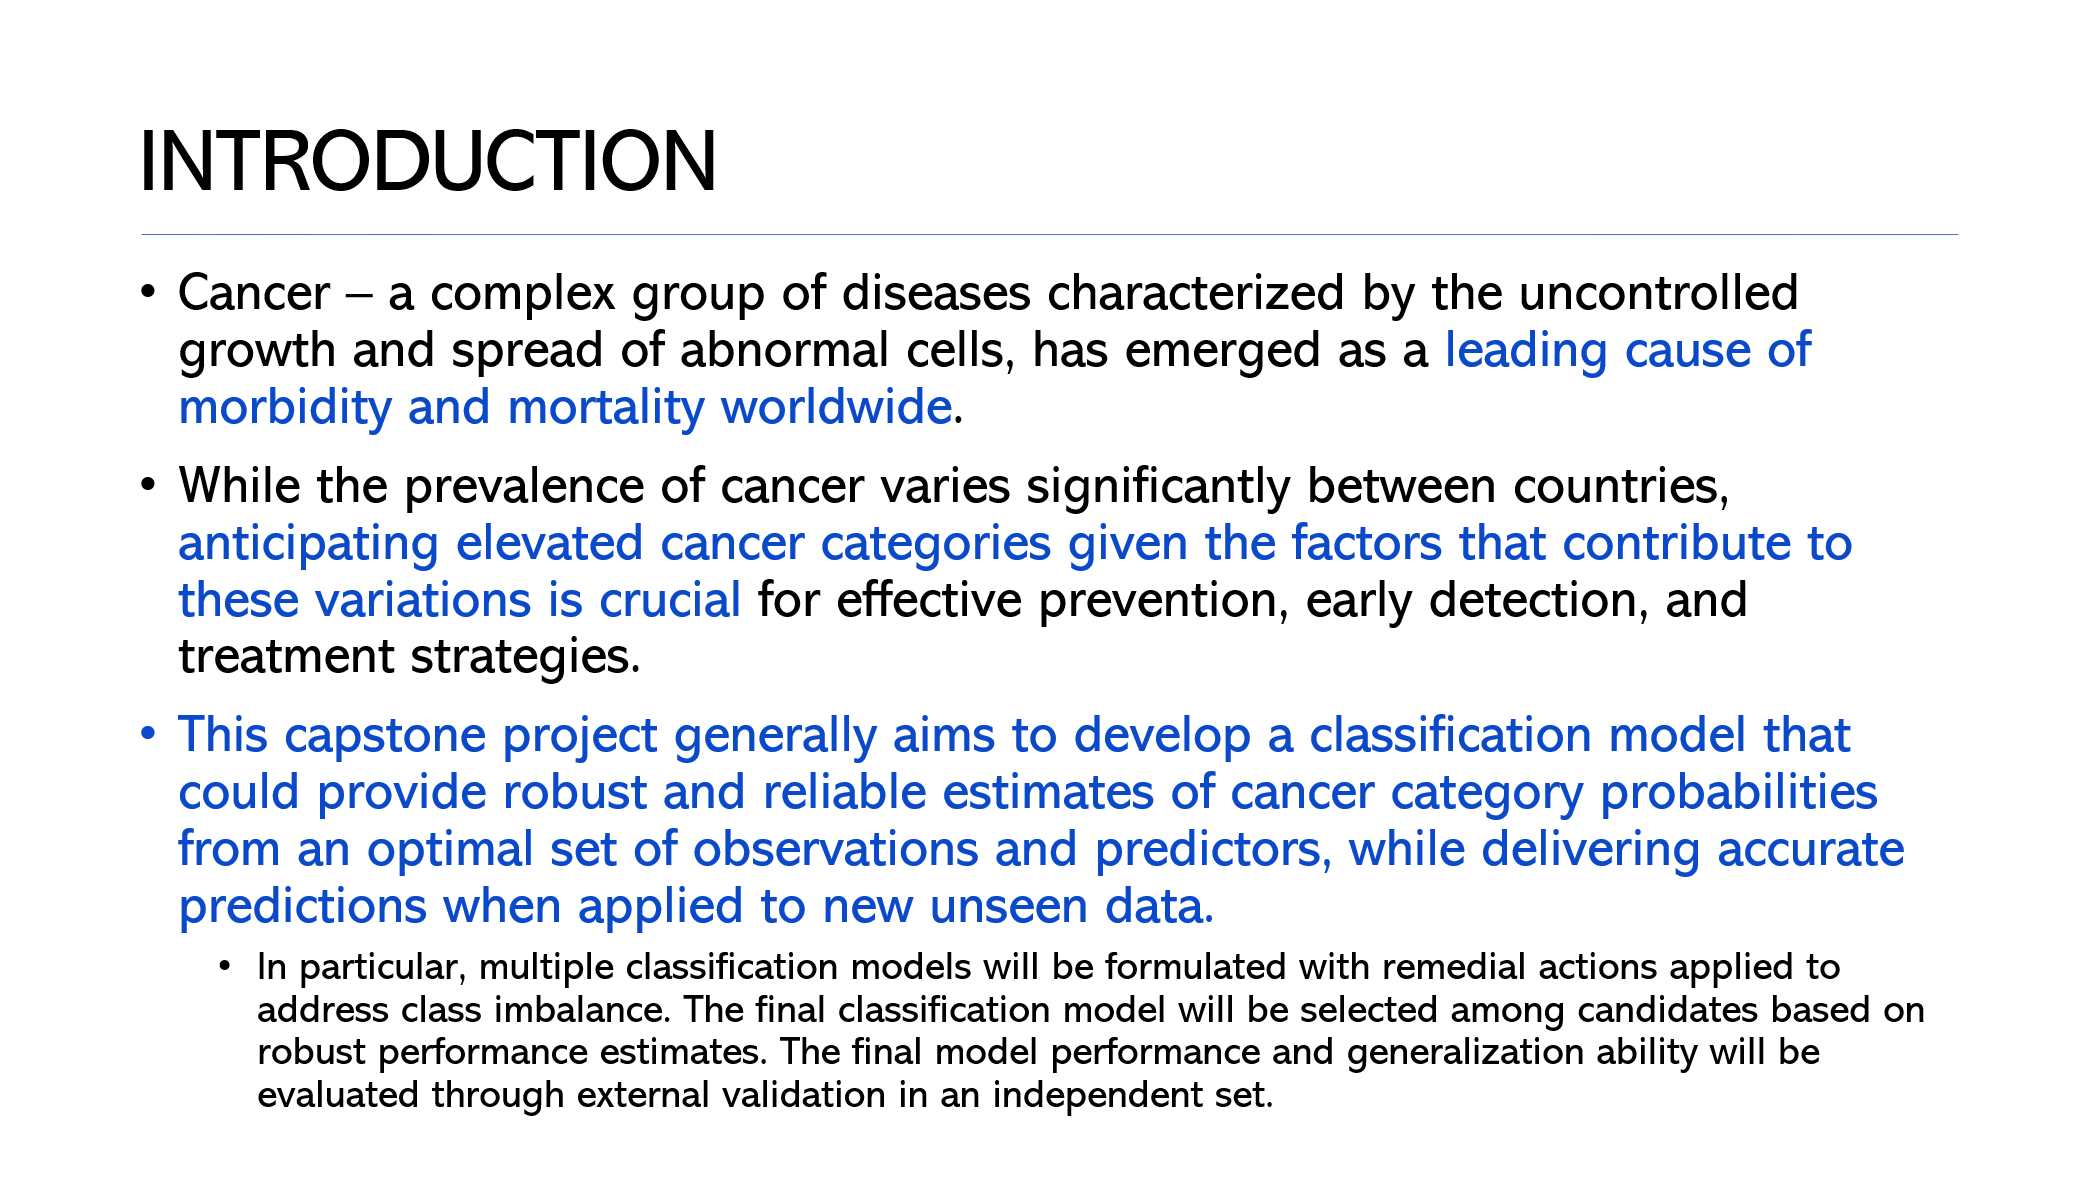

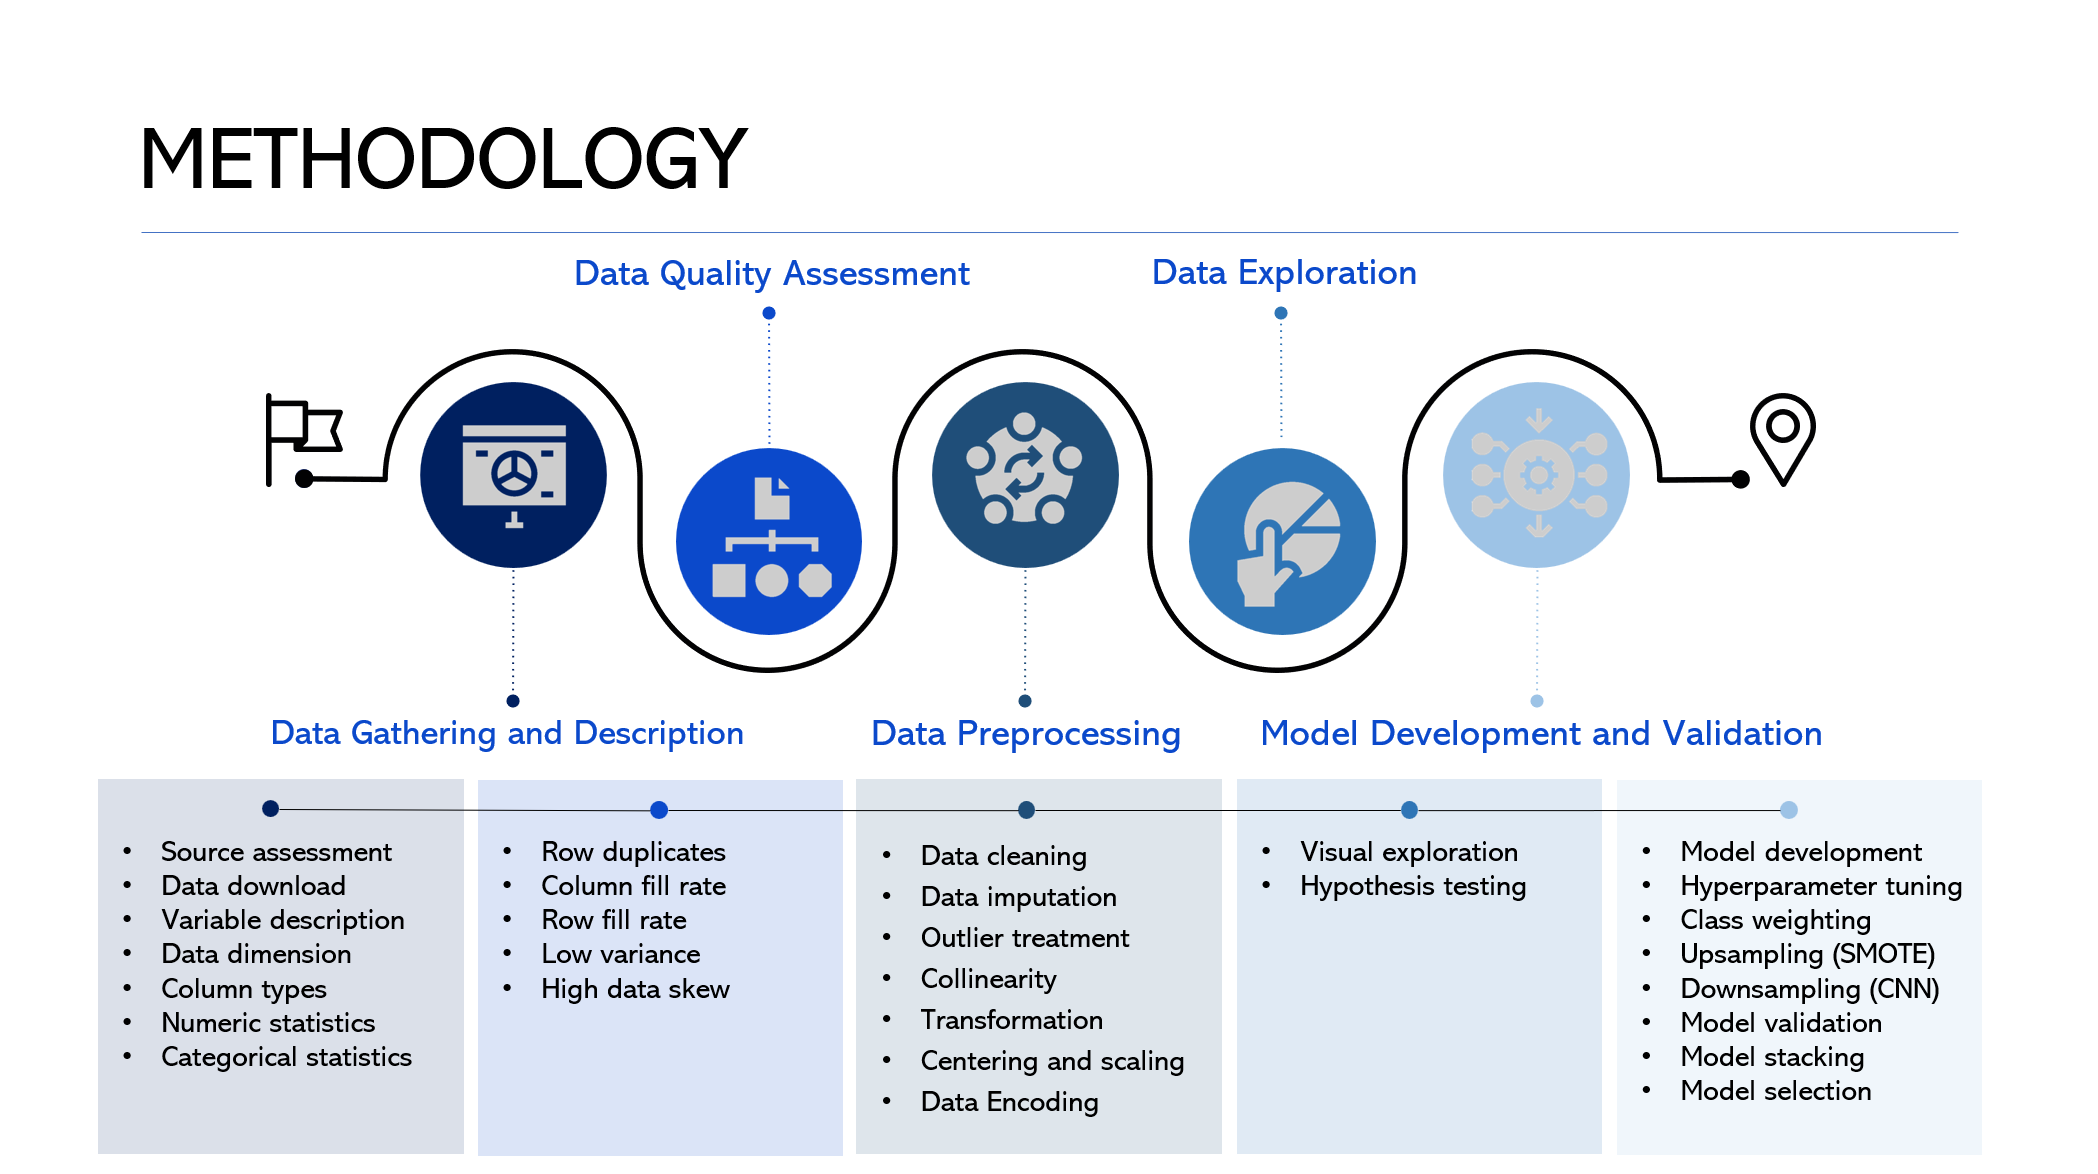

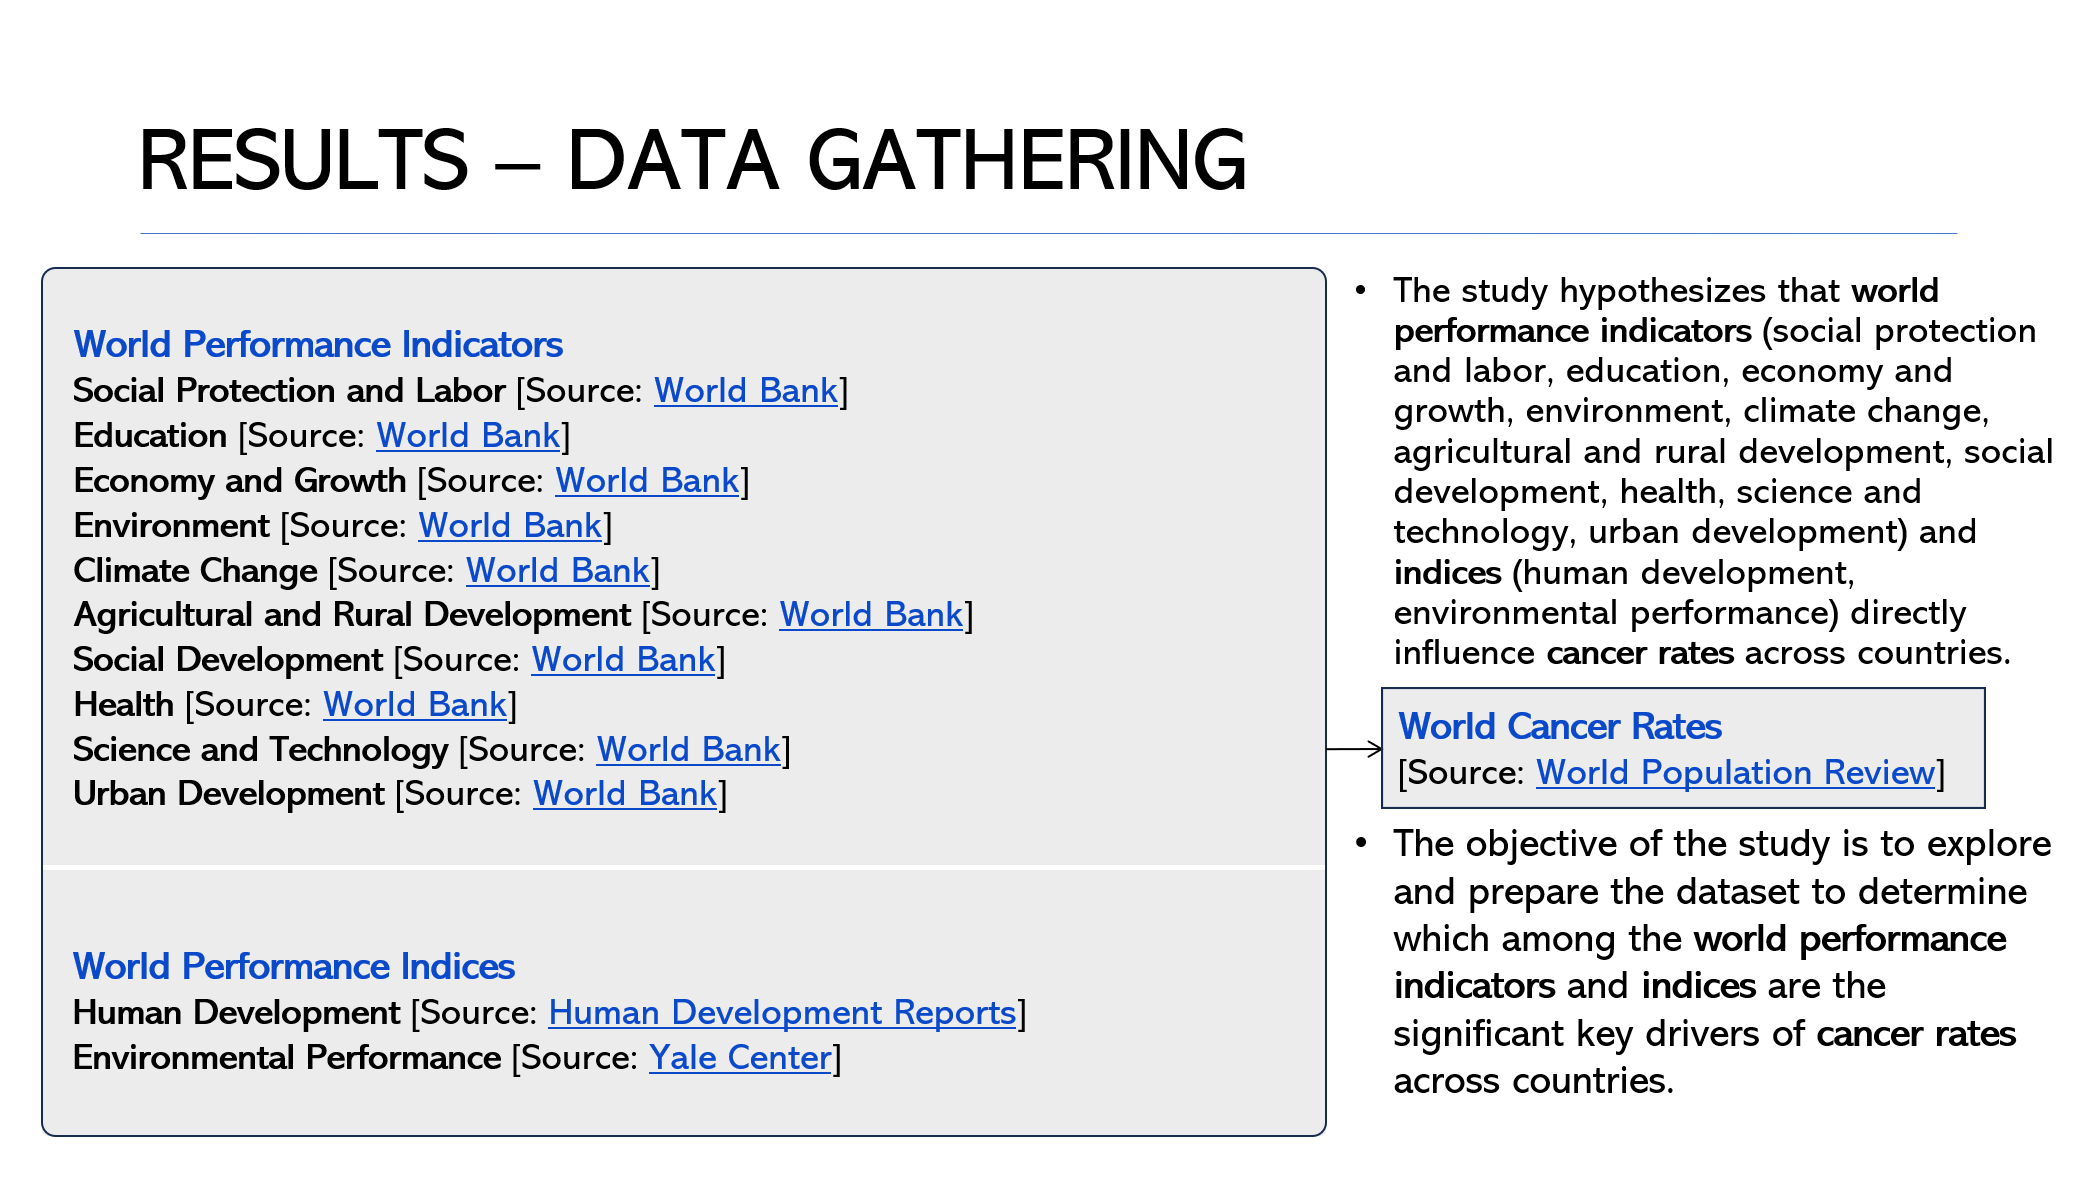

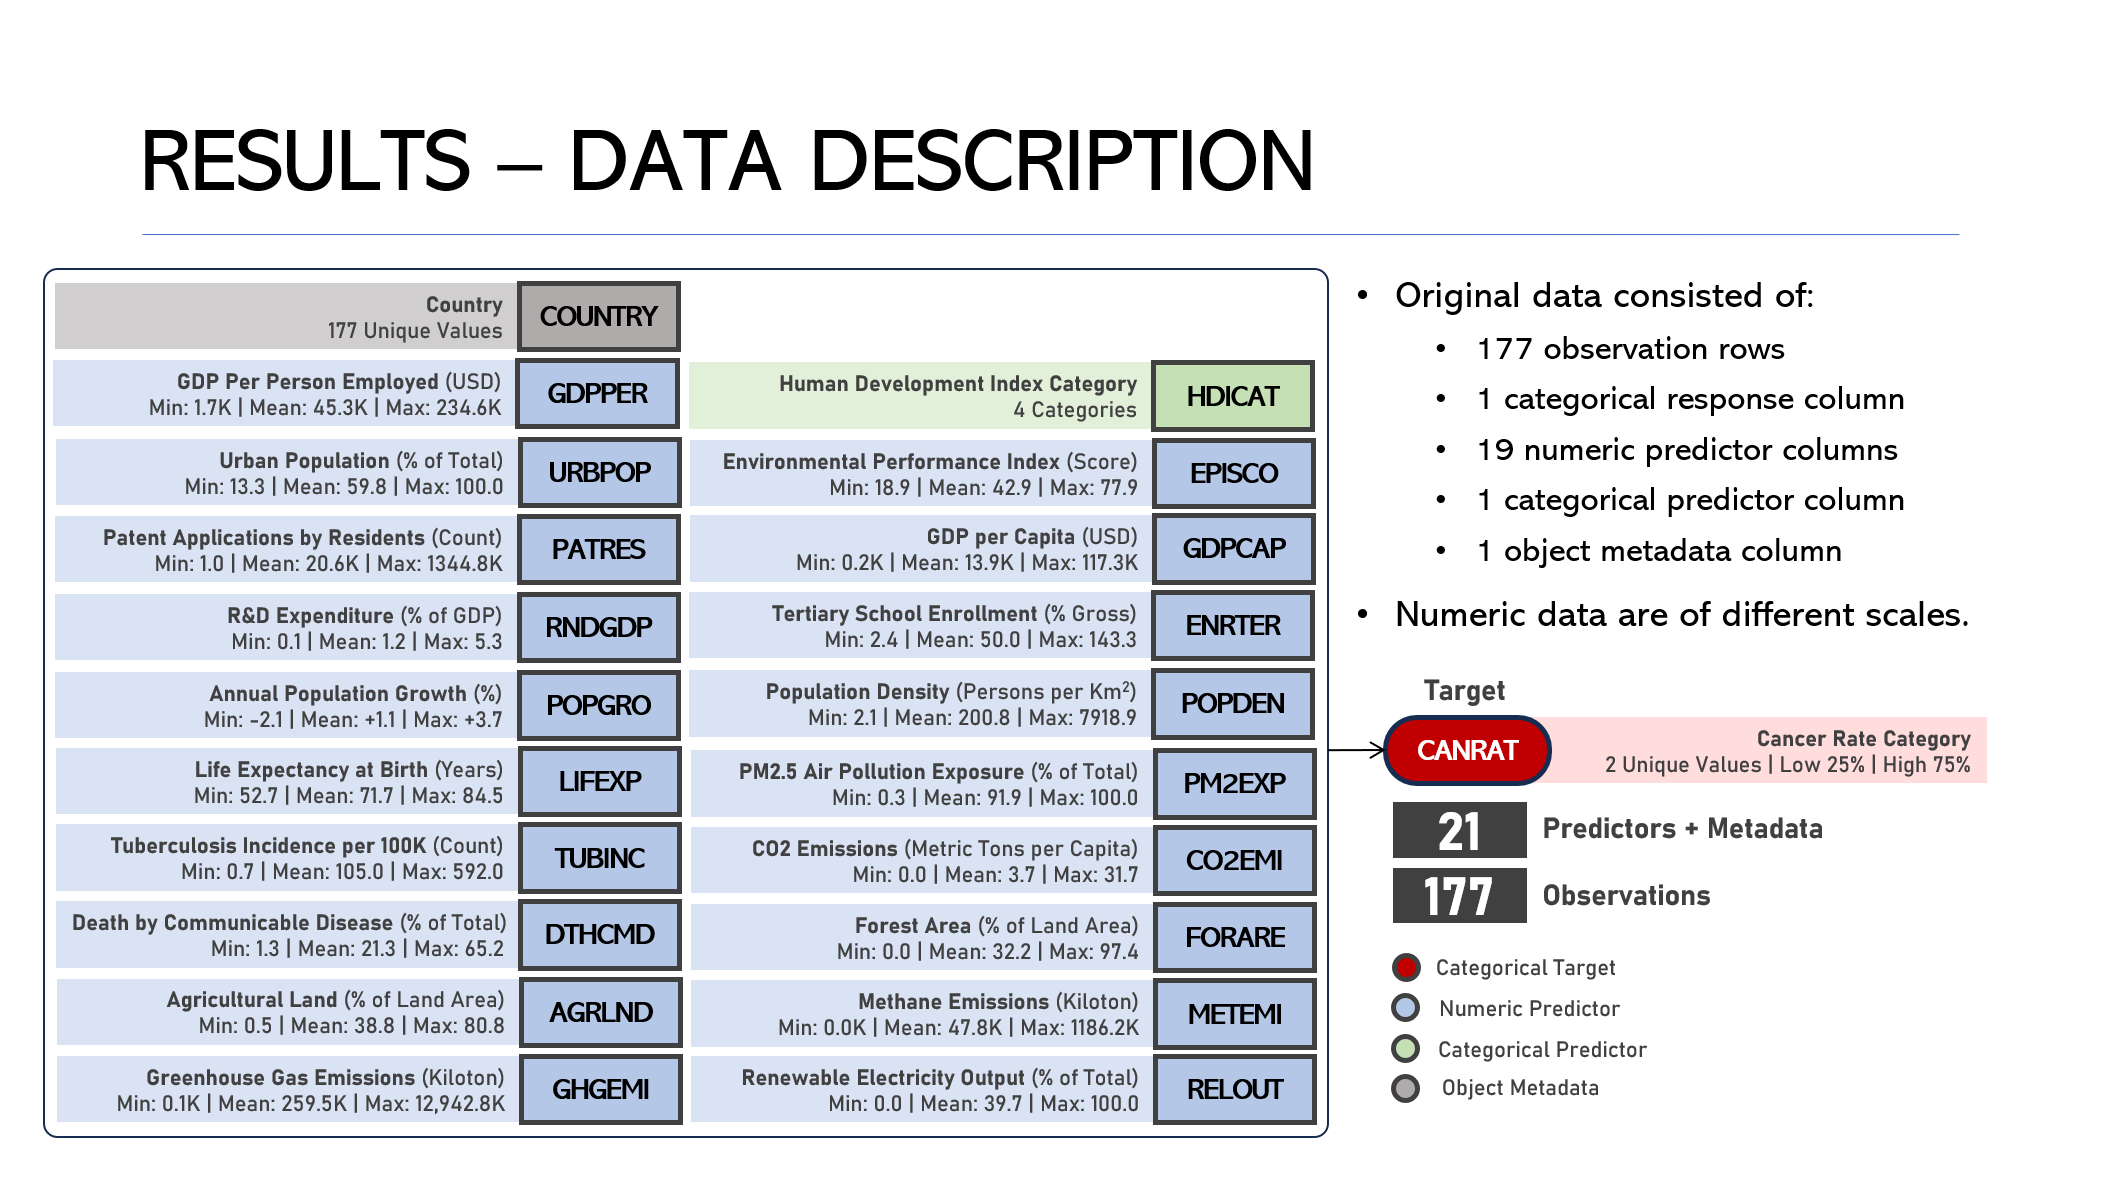

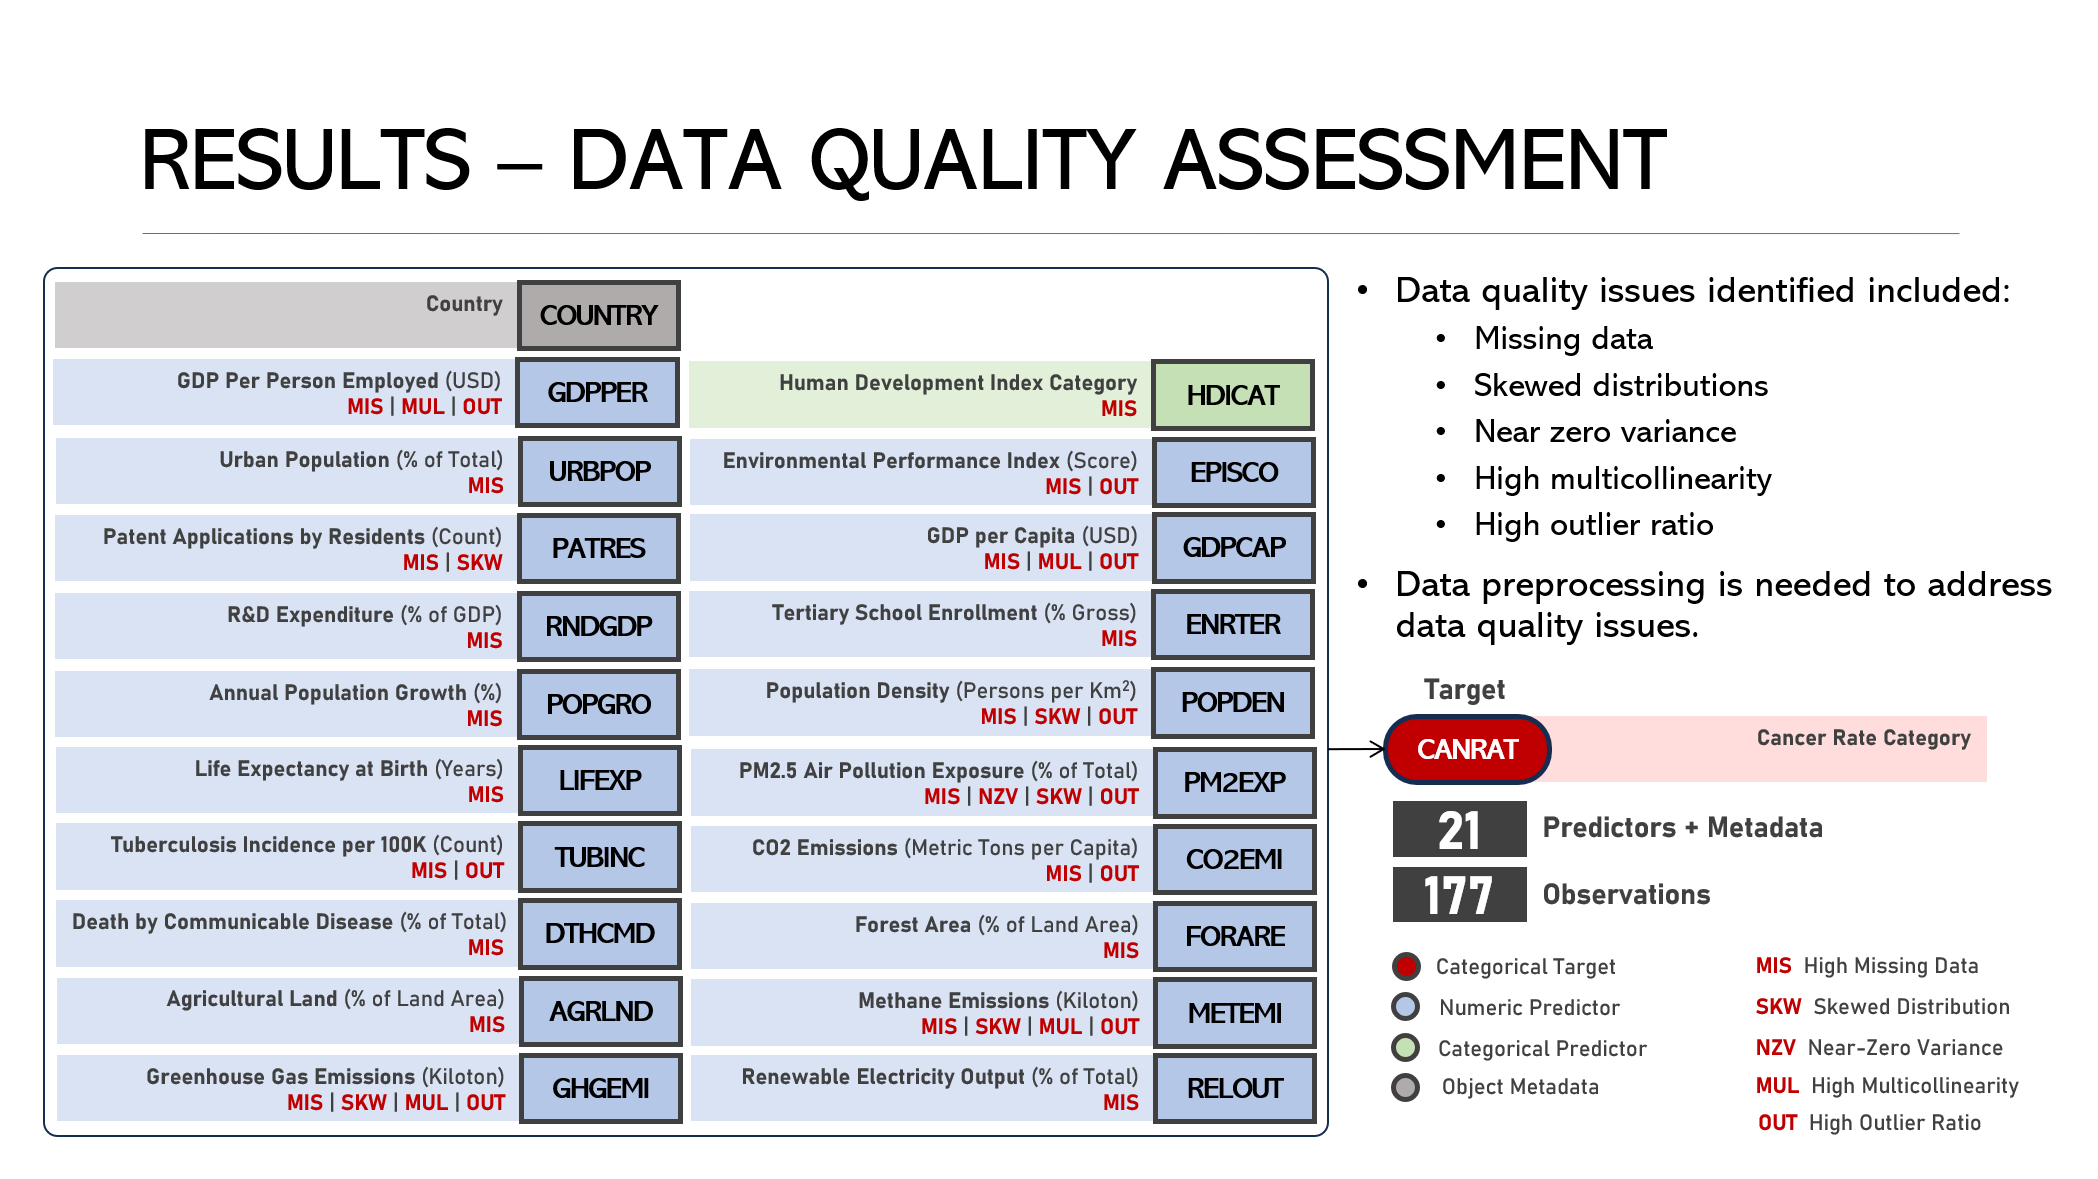

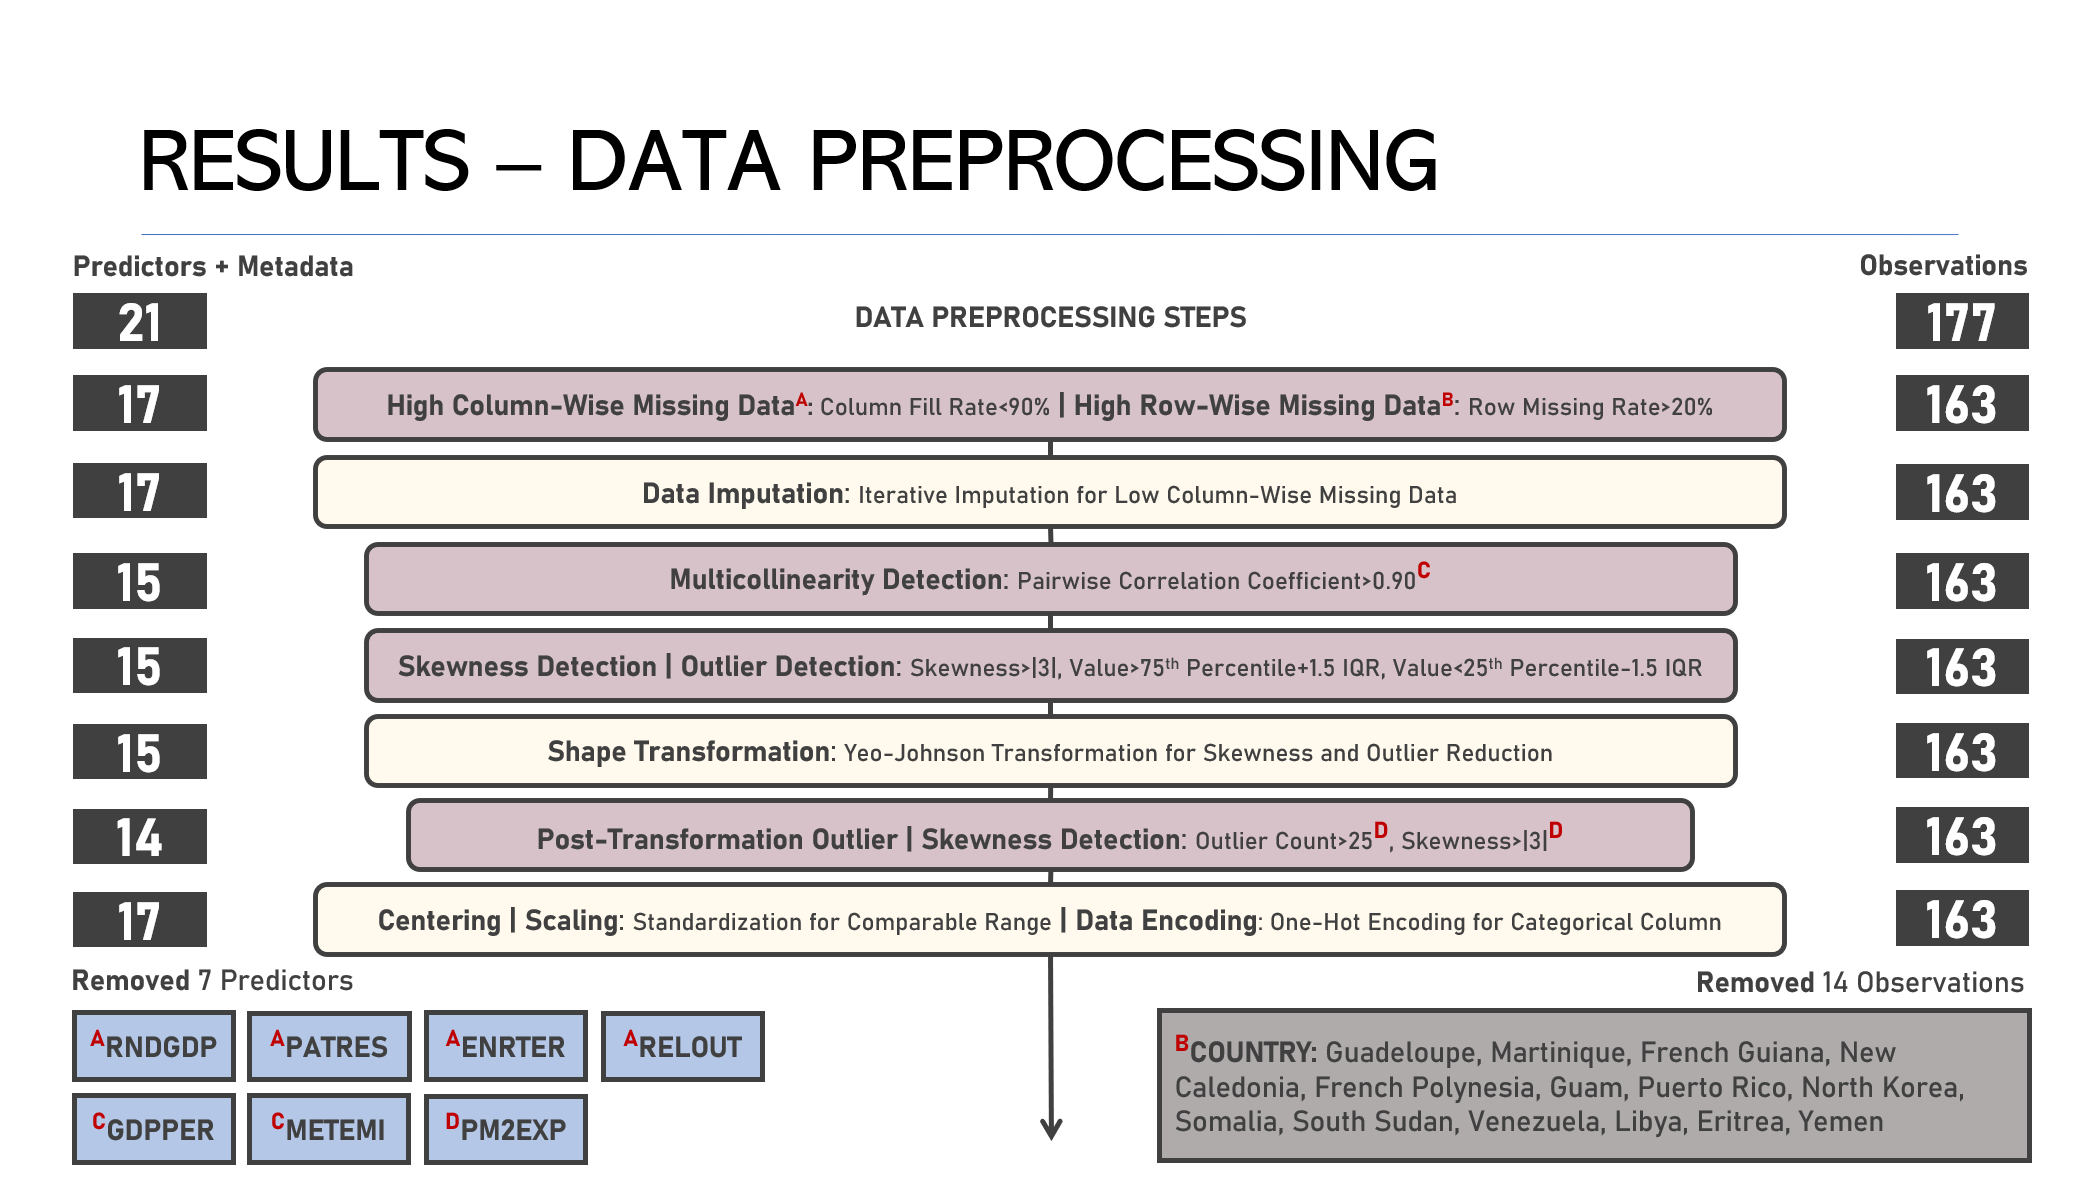

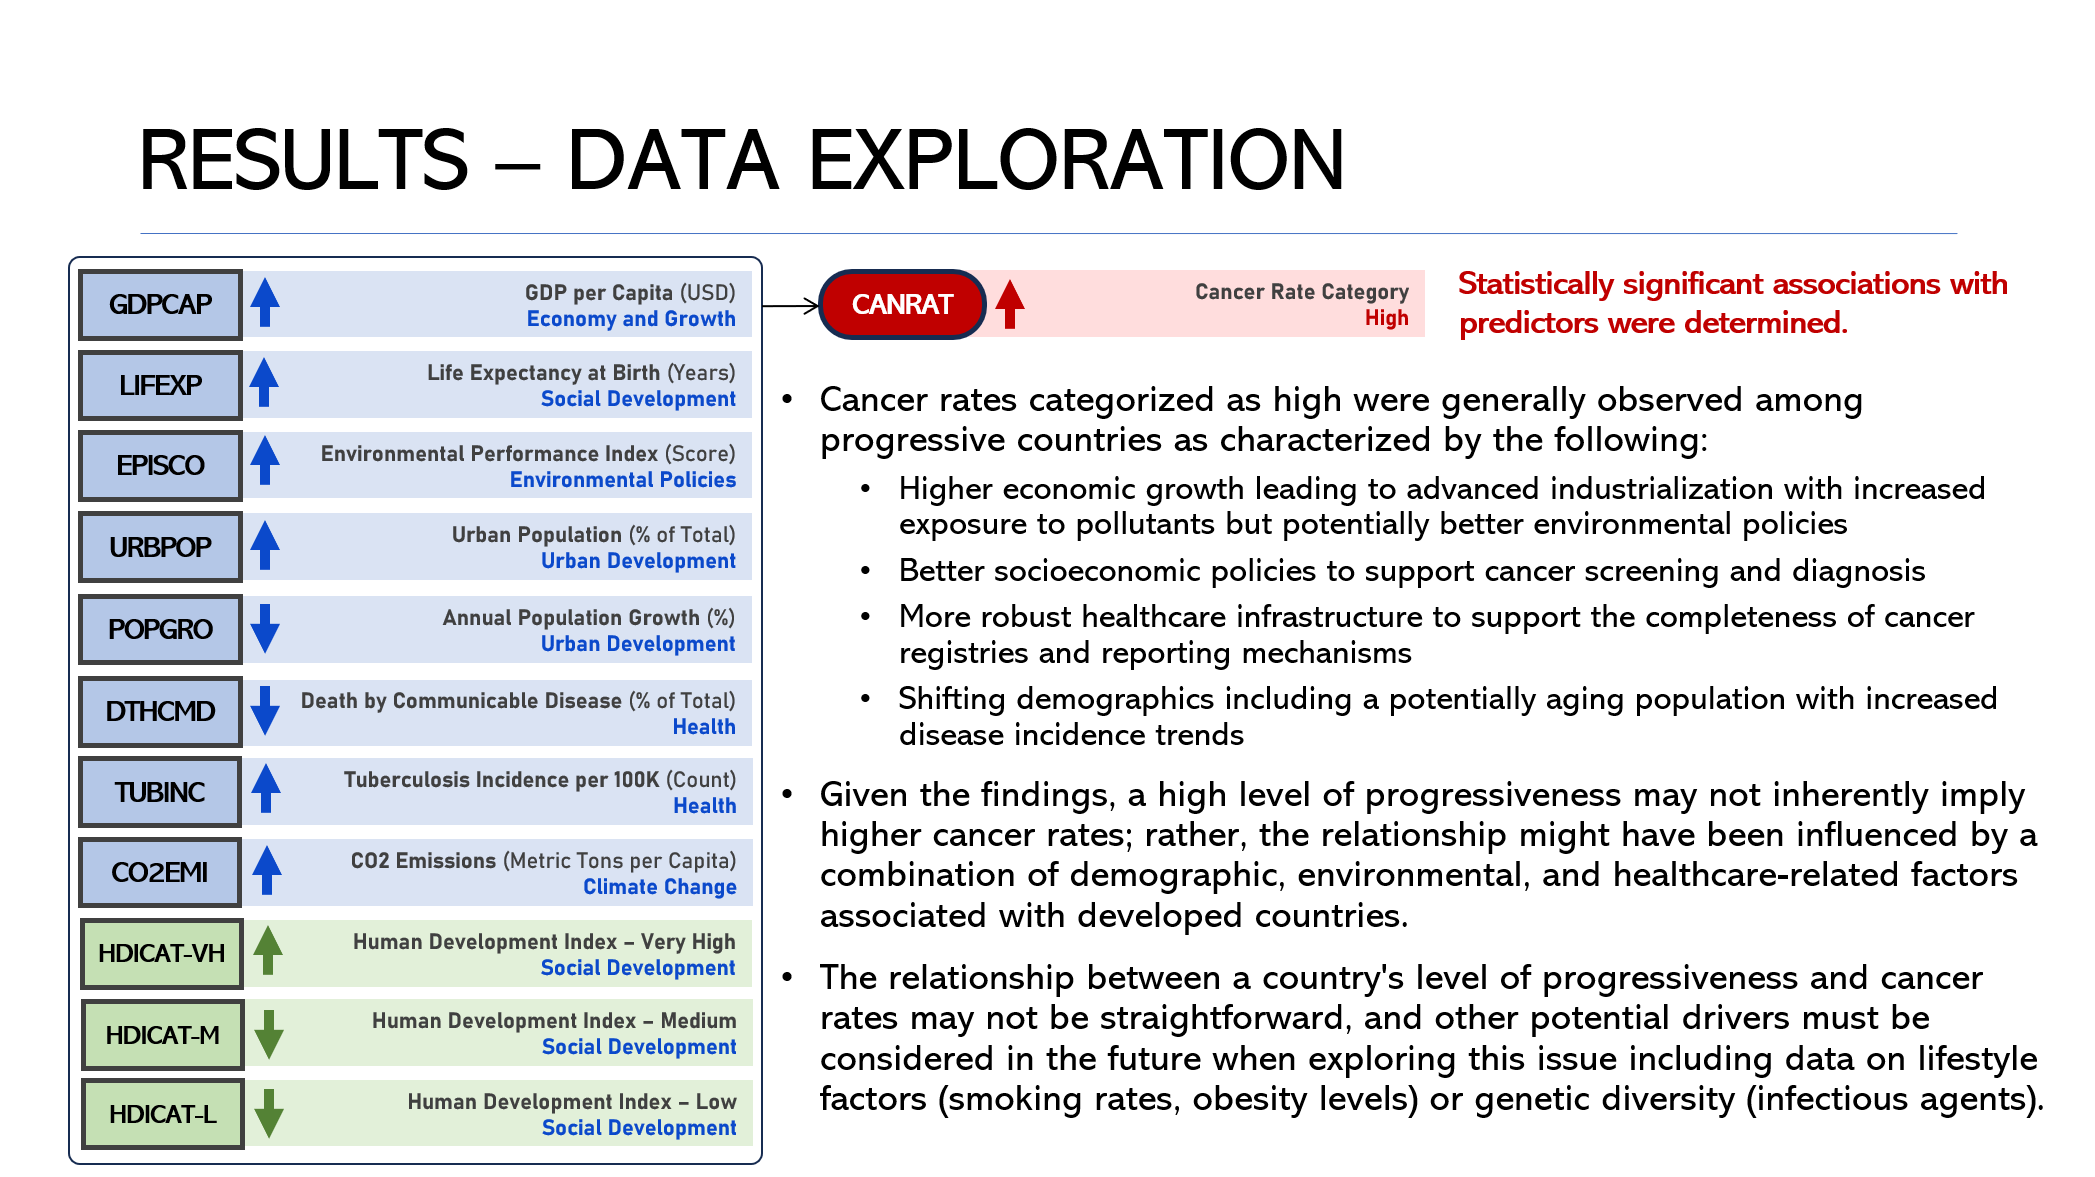

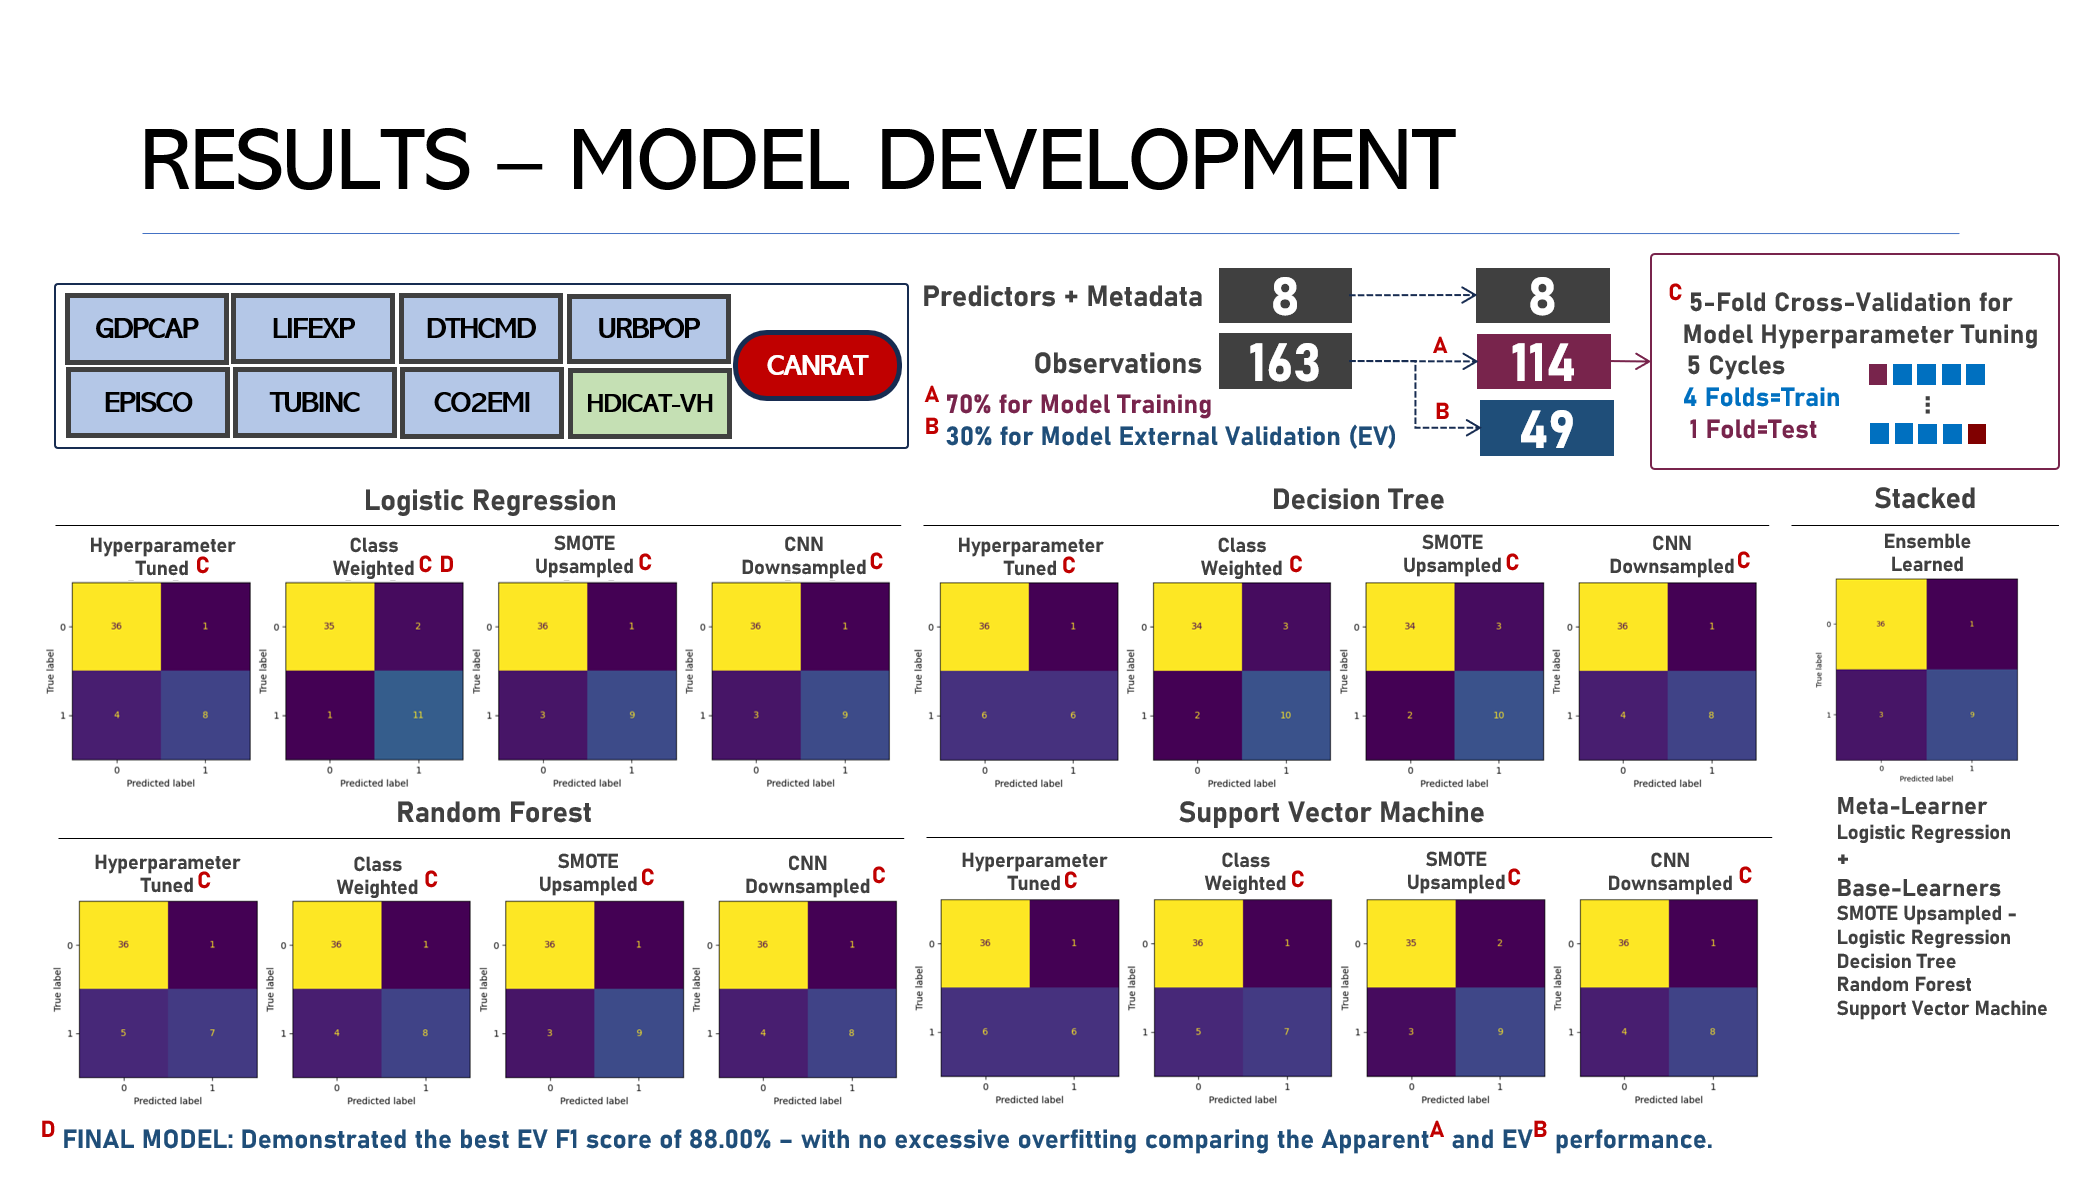

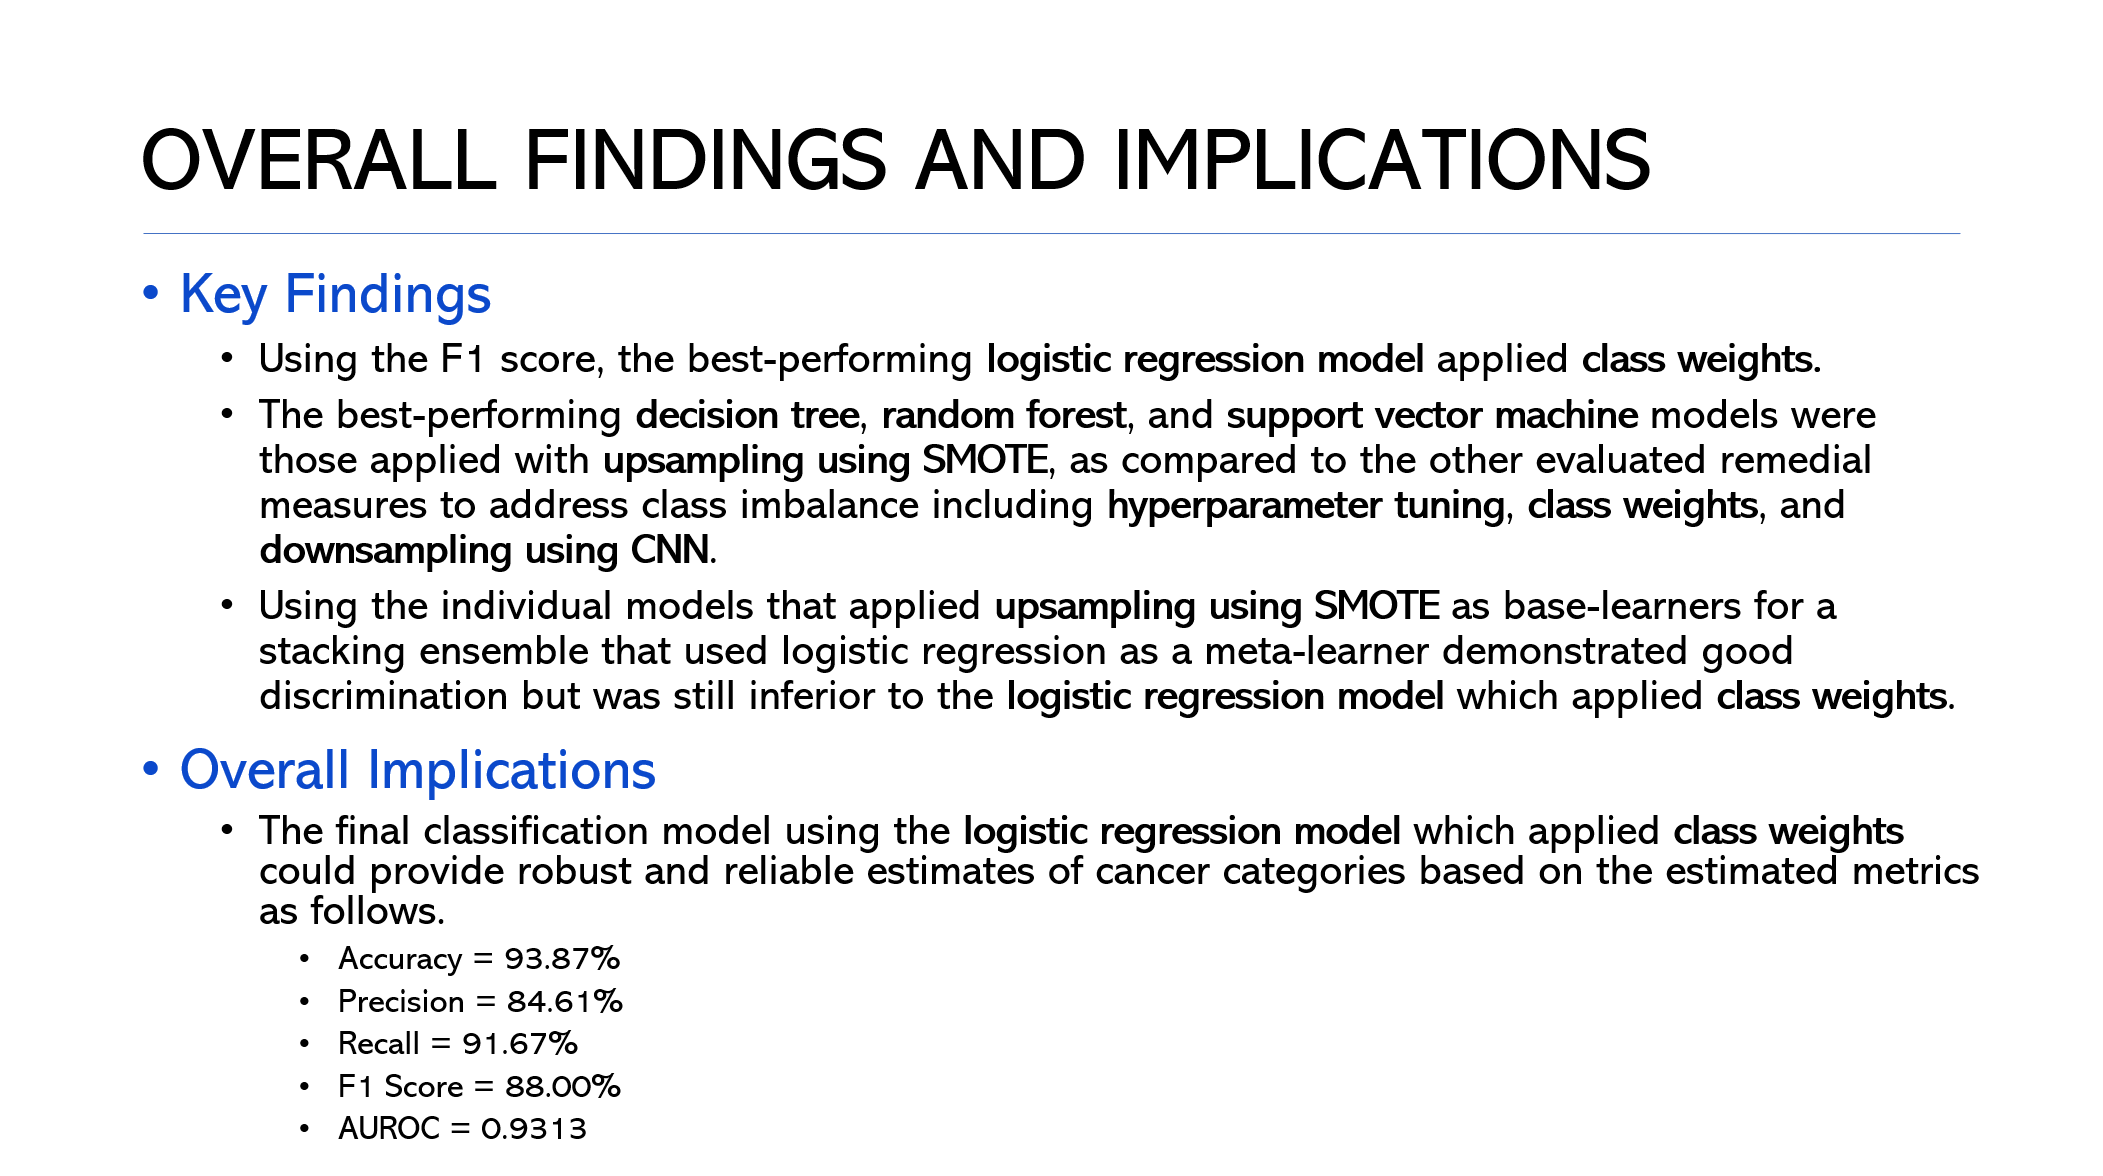

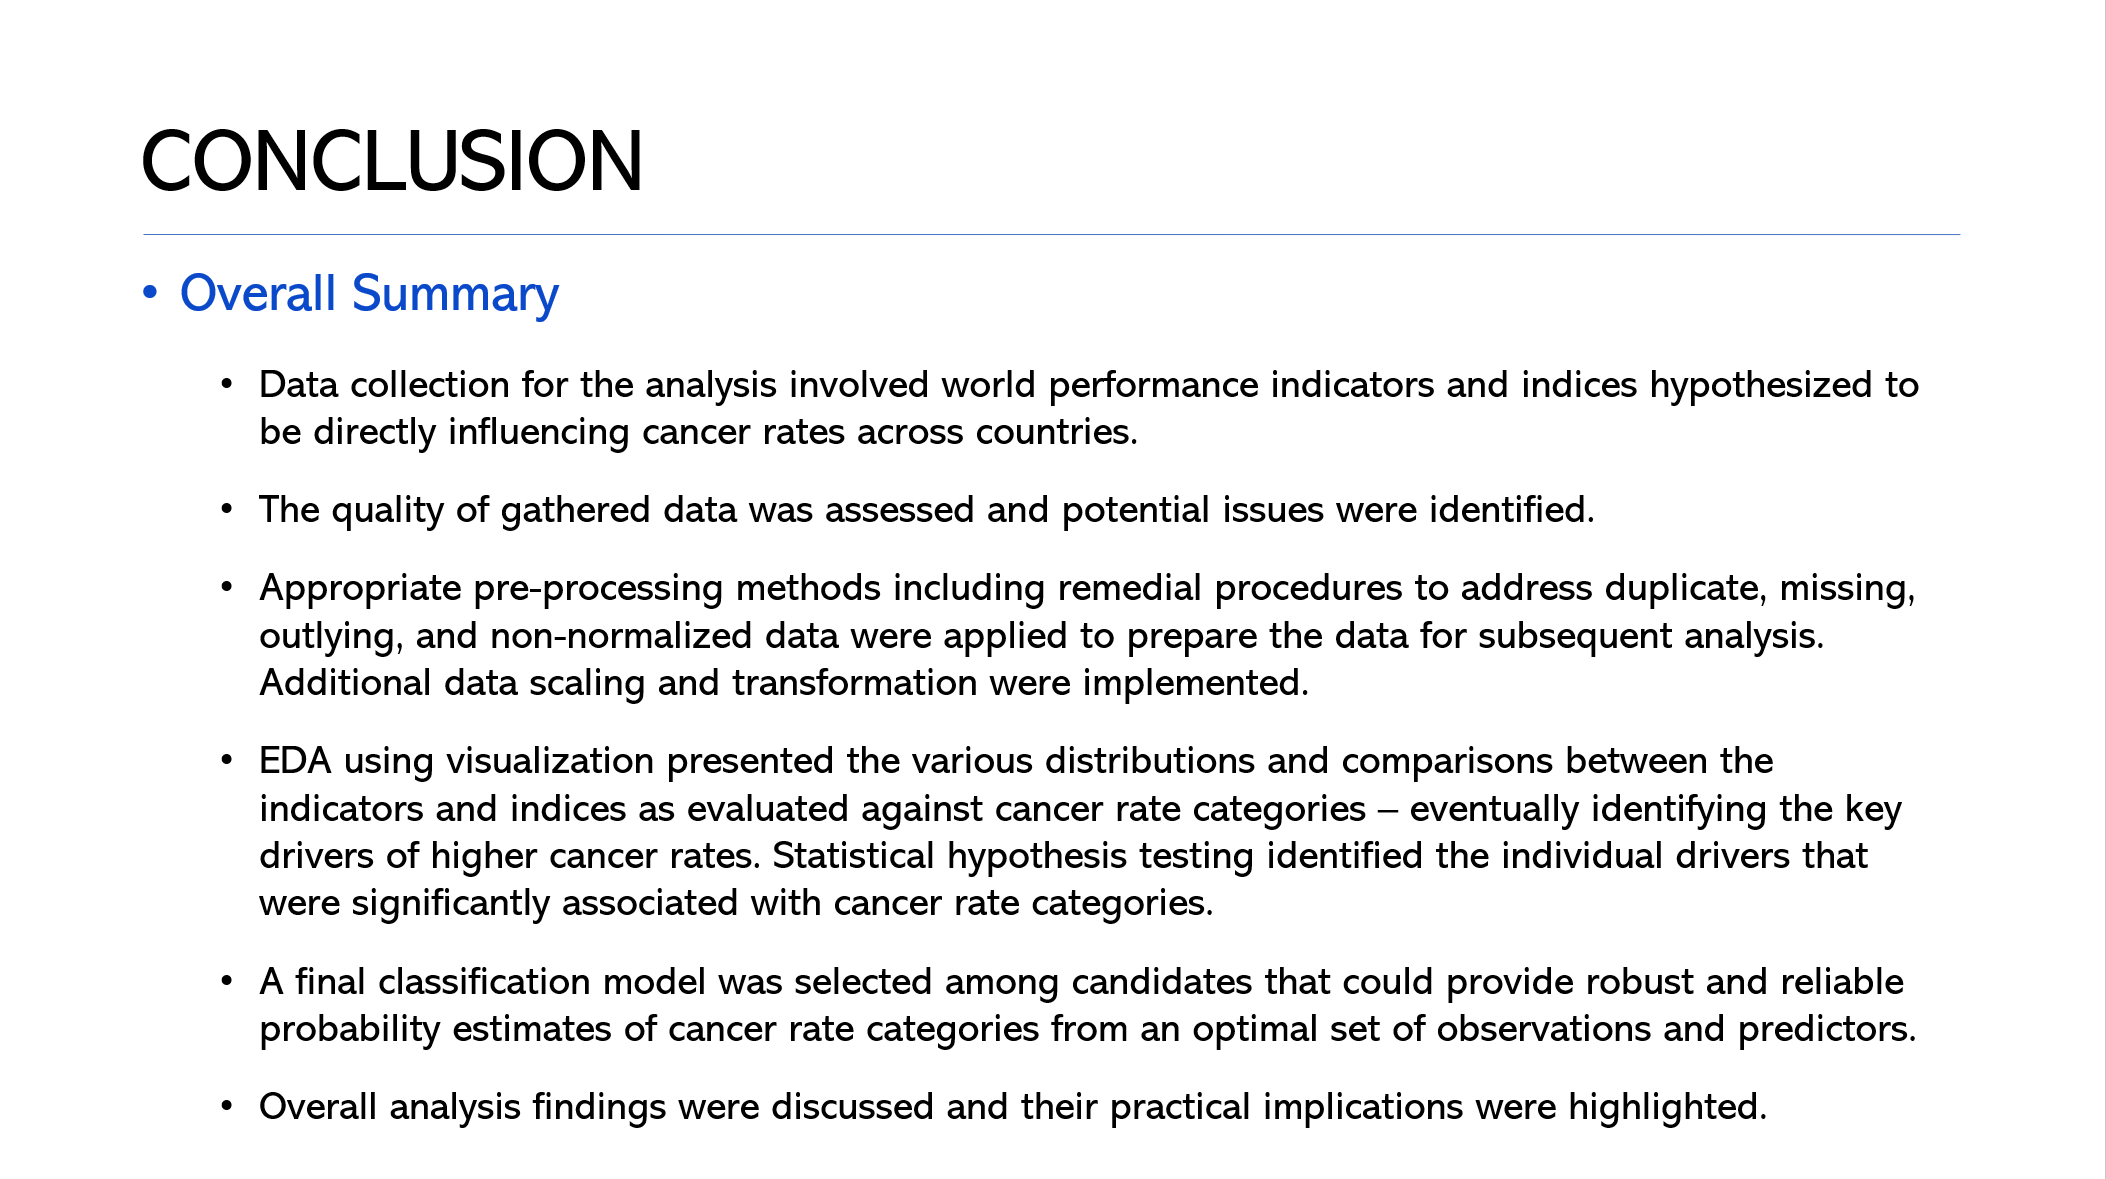

# 3. References <a class="anchor" id="References"></a>

* **[Book]** [Data Preparation for Machine Learning: Data Cleaning, Feature Selection, and Data Transforms in Python](https://machinelearningmastery.com/data-preparation-for-machine-learning/) by Jason Brownlee
* **[Book]** [Feature Engineering and Selection: A Practical Approach for Predictive Models](http://www.feat.engineering/) by Max Kuhn and Kjell Johnson
* **[Book]** [Feature Engineering for Machine Learning](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/) by Alice Zheng and Amanda Casari
* **[Book]** [Applied Predictive Modeling](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) by Max Kuhn and Kjell Johnson
* **[Book]** [Data Mining: Practical Machine Learning Tools and Techniques](https://www.sciencedirect.com/book/9780123748560/data-mining-practical-machine-learning-tools-and-techniques?via=ihub=) by Ian Witten, Eibe Frank, Mark Hall and Christopher Pal 
* **[Book]** [Data Cleaning](https://dl.acm.org/doi/book/10.1145/3310205) by Ihab Ilyas and Xu Chu
* **[Book]** [Data Wrangling with Python](https://www.oreilly.com/library/view/data-wrangling-with/9781491948804/) by Jacqueline Kazil and Katharine Jarmul
* **[Book]** [Regression Modeling Strategies](https://link.springer.com/book/10.1007/978-1-4757-3462-1) by Frank Harrell
* **[Book]** [Ensemble Methods for Machine Learning](https://www.manning.com/books/ensemble-methods-for-machine-learning) by Gautam Kunapuli
* **[Python Library API]** [NumPy](https://numpy.org/doc/) by NumPy Team
* **[Python Library API]** [pandas](https://pandas.pydata.org/docs/) by Pandas Team
* **[Python Library API]** [seaborn](https://seaborn.pydata.org/) by Seaborn Team
* **[Python Library API]** [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) by MatPlotLib Team
* **[Python Library API]** [itertools](https://docs.python.org/3/library/itertools.html) by Python Team
* **[Python Library API]** [operator](https://docs.python.org/3/library/operator.html) by Python Team
* **[Python Library API]** [sklearn.experimental](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.experimental) by Scikit-Learn Team
* **[Python Library API]** [sklearn.impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute) by Scikit-Learn Team
* **[Python Library API]** [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) by Scikit-Learn Team
* **[Python Library API]** [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) by Scikit-Learn Team
* **[Python Library API]** [scipy](https://docs.scipy.org/doc/scipy/) by SciPy Team
* **[Python Library API]** [sklearn.tree](https://scikit-learn.org/stable/modules/tree.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.ensemble](https://scikit-learn.org/stable/modules/ensemble.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.svm](https://scikit-learn.org/stable/modules/svm.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html) by Scikit-Learn Team
* **[Python Library API]** [imblearn.over_sampling](https://imbalanced-learn.org/stable/over_sampling.html) by Imbalanced-Learn Team
* **[Python Library API]** [imblearn.under_sampling](https://imbalanced-learn.org/stable/under_sampling.html) by Imbalanced-Learn Team
* **[Article]** [Step-by-Step Exploratory Data Analysis (EDA) using Python](https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/#:~:text=Exploratory%20Data%20Analysis%20(EDA)%20with,distributions%20using%20Python%20programming%20language.) by Malamahadevan Mahadevan (Analytics Vidhya)
* **[Article]** [Exploratory Data Analysis in Python — A Step-by-Step Process](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee) by Andrea D'Agostino (Towards Data Science)
* **[Article]** [Exploratory Data Analysis with Python](https://medium.com/@douglas.rochedo/exploratory-data-analysis-with-python-78b6c1d479cc) by Douglas Rocha (Medium)
* **[Article]** [4 Ways to Automate Exploratory Data Analysis (EDA) in Python](https://builtin.com/data-science/EDA-python) by Abdishakur Hassan (BuiltIn)
* **[Article]** [10 Things To Do When Conducting Your Exploratory Data Analysis (EDA)](https://www.analyticsvidhya.com) by Alifia Harmadi (Medium)
* **[Article]** [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Statistical Imputation for Missing Values in Machine Learning](https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Imputing Missing Data with Simple and Advanced Techniques](https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87) by Idil Ismiguzel (Towards Data Science)
* **[Article]** [Missing Data Imputation Approaches | How to handle missing values in Python](https://www.machinelearningplus.com/machine-learning/missing-data-imputation-how-to-handle-missing-values-in-python/) by Selva Prabhakaran (Machine Learning +)
* **[Article]** [Master The Skills Of Missing Data Imputation Techniques In Python(2022) And Be Successful](https://medium.com/analytics-vidhya/a-quick-guide-on-missing-data-imputation-techniques-in-python-2020-5410f3df1c1e) by Mrinal Walia (Analytics Vidhya)
* **[Article]** [How to Preprocess Data in Python](https://builtin.com/machine-learning/how-to-preprocess-data-python) by Afroz Chakure (BuiltIn)
* **[Article]** [Easy Guide To Data Preprocessing In Python](https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html) by Ahmad Anis (KDNuggets)
* **[Article]** [Data Preprocessing in Python](https://towardsdatascience.com/data-preprocessing-in-python-b52b652e37d5) by Tarun Gupta (Towards Data Science)
* **[Article]** [Data Preprocessing using Python](https://medium.com/@suneet.bhopal/data-preprocessing-using-python-1bfee9268fb3) by Suneet Jain (Medium)
* **[Article]** [Data Preprocessing in Python](https://medium.com/@abonia/data-preprocessing-in-python-1f90d95d44f4) by Abonia Sojasingarayar (Medium)
* **[Article]** [Data Preprocessing in Python](https://medium.datadriveninvestor.com/data-preprocessing-3cd01eefd438) by Afroz Chakure (Medium)
* **[Article]** [Detecting and Treating Outliers | Treating the Odd One Out!](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/) by Harika Bonthu (Analytics Vidhya)
* **[Article]** [Outlier Treatment with Python](https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02) by Sangita Yemulwar (Analytics Vidhya)
* **[Article]** [A Guide to Outlier Detection in Python](https://builtin.com/data-science/outlier-detection-python) by Sadrach Pierre (BuiltIn)
* **[Article]** [How To Find Outliers in Data Using Python (and How To Handle Them)](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/) by Eric Kleppen (Career Foundry)
* **[Article]** [Statistics in Python — Collinearity and Multicollinearity](https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f) by Wei-Meng Lee (Towards Data Science)
* **[Article]** [Understanding Multicollinearity and How to Detect it in Python](https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc) by Terence Shin (Towards Data Science)
* **[Article]** [A Python Library to Remove Collinearity](https://www.yourdatateacher.com/2021/06/28/a-python-library-to-remove-collinearity/) by Gianluca Malato (Your Data Teacher)
* **[Article]** [8 Best Data Transformation in Pandas](https://ai.plainenglish.io/data-transformation-in-pandas-29b2b3c61b34) by Tirendaz AI (Medium)
* **[Article]** [Data Transformation Techniques with Python: Elevate Your Data Game!](https://medium.com/@siddharthverma.er.cse/data-transformation-techniques-with-python-elevate-your-data-game-21fcc7442cc2) by Siddharth Verma (Medium)
* **[Article]** [Data Scaling with Python](https://www.kdnuggets.com/2023/07/data-scaling-python.html) by Benjamin Obi Tayo (KDNuggets)
* **[Article]** [How to Use StandardScaler and MinMaxScaler Transforms in Python](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Feature Engineering: Scaling, Normalization, and Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/) by Aniruddha Bhandari  (Analytics Vidhya)
* **[Article]** [How to Normalize Data Using scikit-learn in Python](https://www.digitalocean.com/community/tutorials/normalize-data-in-python) by Jayant Verma (Digital Ocean)
* **[Article]** [What are Categorical Data Encoding Methods | Binary Encoding](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/) by Shipra Saxena  (Analytics Vidhya)
* **[Article]** [Guide to Encoding Categorical Values in Python](https://pbpython.com/categorical-encoding.html) by Chris Moffitt (Practical Business Python)
* **[Article]** [Categorical Data Encoding Techniques in Python: A Complete Guide](https://soumenatta.medium.com/categorical-data-encoding-techniques-in-python-a-complete-guide-a913aae19a22) by Soumen Atta (Medium)
* **[Article]** [Categorical Feature Encoding Techniques](https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24) by Tara Boyle (Medium)
* **[Article]** [Ordinal and One-Hot Encodings for Categorical Data](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Hypothesis Testing with Python: Step by Step Hands-On Tutorial with Practical Examples](https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e) by Ece Işık Polat (Towards Data Science)
* **[Article]** [17 Statistical Hypothesis Tests in Python (Cheat Sheet)](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [A Step-by-Step Guide to Hypothesis Testing in Python using Scipy](https://medium.com/@gabriel_renno/a-step-by-step-guide-to-hypothesis-testing-in-python-using-scipy-8eb5b696ab07) by Gabriel Rennó (Medium)
* **[Publication]** [Data Quality for Machine Learning Tasks](https://journals.sagepub.com/doi/10.1177/0962280206074463) by Nitin Gupta, Shashank Mujumdar, Hima Patel, Satoshi Masuda, Naveen Panwar, Sambaran Bandyopadhyay, Sameep Mehta, Shanmukha Guttula, Shazia Afzal, Ruhi Sharma Mittal and Vitobha Munigala (KDD ’21: Proceedings of the 27th ACM SIGKDD Conference on Knowledge Discovery & Data Mining)
* **[Publication]** [Overview and Importance of Data Quality for Machine Learning Tasks](https://dl.acm.org/doi/10.1145/3394486.3406477) by Abhinav Jain, Hima Patel, Lokesh Nagalapatti, Nitin Gupta, Sameep Mehta, Shanmukha Guttula, Shashank Mujumdar, Shazia Afzal, Ruhi Sharma Mittal and Vitobha Munigala (KDD ’20: Proceedings of the 26th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining)
* **[Publication]** [Multiple Imputation of Discrete and Continuous Data by Fully Conditional Specification](https://journals.sagepub.com/doi/10.1177/0962280206074463) by Stef van Buuren (Statistical Methods in Medical Research)
* **[Publication]** [Mathematical Contributions to the Theory of Evolution: Regression, Heredity and Panmixia](https://royalsocietypublishing.org/doi/10.1098/rsta.1896.0007) by Karl Pearson (Royal Society)
* **[Publication]** [A New Family of Power Transformations to Improve Normality or Symmetry](https://academic.oup.com/biomet/article-abstract/87/4/954/232908?redirectedFrom=fulltext&login=false) by In-Kwon Yeo and Richard Johnson (Biometrika)
* **[Publication]** [The Origins of Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) by JS Cramer (Econometrics eJournal)
* **[Publication]** [Classification and Regression Trees](https://www.semanticscholar.org/paper/Classification-and-Regression-Trees-Breiman-Friedman/8017699564136f93af21575810d557dba1ee6fc6) by Leo Breiman, Jerome Friedman, Richard Olshen and Charles Stone (Computer Science)
* **[Publication]** [Random Forest](https://link.springer.com/article/10.1023/A:1010933404324) by Leo Breiman (Machine Learning)
* **[Publication]** [A Training Algorithm for Optimal Margin Classifiers](https://dl.acm.org/doi/10.1145/130385.130401) by Bernhard Boser, Isabelle Guyon and Vladimir Vapnik (Proceedings of the Fifth Annual Workshop on Computational Learning Theory)
* **[Publication]** [SMOTE: Synthetic Minority Over-Sampling Technique](https://dl.acm.org/doi/10.5555/1622407.1622416) by Nitesh Chawla, Kevin Bowyer, Lawrence Hall and Philip Kegelmeyer (Journal of Artificial Intelligence Research)
* **[Publication]** [The Condensed Nearest Neighbor Rule](https://ieeexplore.ieee.org/document/1054155) by Peter Hart (IEEE Transactions on Information Theory)

***

In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 15px; font-family: 'Trebuchet MS'; }</style>"))